In [1]:
%pylab inline
import sys
sys.path.append('../code')
from mwlmc_bfe import smooth_coeff
from mwlmc_bfe import coeff_energy
from coefficients_smoothing import read_coeff_matrix
import biff

Populating the interactive namespace from numpy and matplotlib


In [101]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [2]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
def coeff_hist(S):
    vmin = np.ma.masked_invalid(np.log10(np.abs(S[:,:,0].flatten()))).min()
    vmax = np.max(np.log10(np.abs(S)))

    fig, ax = subplots(1, 3, figsize=(14, 4))

    fig.suptitle('LMC coefficients amplitudes', y=1.06)

    for i in range(3):
        im = ax[i].imshow(np.log10(np.abs(((S[:,:,i])))), origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
        ax[i].set_xlim(-0.5, 10)
        ax[i].set_ylim(-0.5, 10)
        ax[i].set_xlabel('$n$')
        ax[i].set_title('$m=${}'.format(i))
        if i ==0:
            ax[i].set_ylabel('$l$')
    #ax[3].set_colorbar()
    fig.subplots_adjust(right=0.8)
    levels = np.arange(int(vmin-1),int(vmax+1),1)
    cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks=levels)
    cbar.set_label(r'$\rm{Log_{10}\ S_{nlm}}$')


In [4]:
def coeff_power(S, T, fig_title, fig_name, max_m=0, max_n=0, max_l=0):
    
    vmin = np.ma.masked_invalid(np.log10((S**2 + T**2)**0.5)).min()
    vmax = np.max(np.log10((S**2 + T**2)**0.5))

    index_m = np.where(np.abs(S[:,:,:3])>0)
    if max_m==0:
        max_m = np.max(index_m[2])
    if max_n==0:
        max_n = np.max(index_m[0])
    if max_l==0:
        max_l = np.max(index_m[1])

    print(max_n, max_l)
    if max_m < 4:
        fig, ax = subplots(max_m+1, 1, figsize=(6, 9), sharex=True)
    elif ((max_m < 8) & (max_m>3)):
        fig, ax = subplots(2, 4, figsize=(14, 9), sharex=True, sharey=True)
    elif (max_m>7):
        fig, ax = subplots(3, 4, figsize=(14, 14), sharex=True, sharey=True)
    print(max_m)

    fig.suptitle(fig_title, y=1.02)

    if max_m < 5:
        for i in range(max_m+1):
            im = ax[i].imshow(np.log10((S[:,:,i]**2 + T[:,:,i]**2)**0.5).T, origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
            ax[i].set_xlim(-1, max_n+1)
            ax[i].set_ylim(-1, max_l+1)
            ax[i].set_ylabel('$l$')
            ax[i].set_title('$m=${}'.format(i))
            ax[i].set_xticks(np.arange(0, max_n+1, 2))
            ax[i].set_yticks(np.arange(0, max_l+1, 2))
            ax[i].set_yticklabels(np.arange(0, max_l+1, 2))

            if i ==2:
                ax[i].set_xlabel('$n$')
    elif (max_m>3):
        j = 0 
        k=0
        for i in range(max_m+1):
            print(j, i)
            im = ax[j][k].imshow(np.log10((S[:,:,i]**2 + T[:,:,i]**2)**0.5).T, origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
            ax[j][k].set_xlim(-1, max_n+1)
            ax[j][k].set_ylim(-1, max_l+1)
            ax[j][k].set_ylabel('$l$')
            ax[j][k].set_title('$m=${}'.format(i))
            k+=1
            if i == 2:
                ax[j][i].set_xlabel('$n$')
            elif i%3 == 0:
                j+=1 
                k=0
                
    fig.subplots_adjust(right=0.8)
    levels = np.arange(int(vmin-1),int(vmax+1),1)
    cbar_ax = fig.add_axes([0.15, -0.05, 0.8, 0.04])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks=levels, orientation='horizontal')
    cbar.set_label(r'$\rm{Log_{10}\ \left( S_{nlm}^2 + T_{nlm}^2 \right)}$')
    fig.tight_layout()
    fig.savefig(fig_name, bbox_inches='tight')

In [5]:
mass = 1/507925.9301774541
#mass = 1
covmat_s1 = '../data/triaxial_halos/bfe_s1_rs12.7_covmat_sample_'
coeff_s1 = '../data/triaxial_halos/bfe_s1_rs12.7_coeff_sample_'
#mass = 1

covmat_q1 = '../data/triaxial_halos/bfe_q1_halo.txt_covmat_sample_'
coeff_q1 = '../data/triaxial_halos/bfe_q1_halo.txt_coeff_sample_'
#mass = 1

covmat_t1 = '../data/triaxial_halos/bfe_t1_halo.txt_covmat_sample_'
coeff_t1 = '../data/triaxial_halos/bfe_t1_halo.txt_coeff_sample_'

covmat_sph = '../data/triaxial_halos/bfe_spherical_rs12.7_covmat_sample_'
coeff_sph = '../data/triaxial_halos/bfe_spherical_rs12.7_coeff_sample_'
#mass = 1

sn_cut = 5

S_s1, T_s1, N_s1, sn_s1 = smooth_coeff(coeff_s1, covmat_s1, 0, 10, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

S_q1, T_q1, N_q1, sn_q1 = smooth_coeff(coeff_q1, covmat_q1, 0, 1, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

S_t1, T_t1, N_t1, sn_t1 = smooth_coeff(coeff_t1, covmat_t1, 0, 1, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)


S_sph1, T_sph1, N_sph1, sn_sph1 = smooth_coeff(coeff_sph, covmat_sph, 0, 11, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

../code/coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [6]:
sn_cut = 0

S_s, T_s, N_s1, sn_s1 = smooth_coeff(coeff_s1, covmat_s1, 0, 10, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

S_q, T_q, N_q, sn_q1 = smooth_coeff(coeff_q1, covmat_q1, 0, 1, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

S_t, T_t, N_t, sn_t1 = smooth_coeff(coeff_t1, covmat_t1, 0, 1, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)


S_sph, T_sph, N_sph, sn_sph1 = smooth_coeff(coeff_sph, covmat_sph, 0, 11, 20, 20, 20, sn_cut, 
                                mass, snap=0, sn_out=1)

../code/coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [6]:
print(N_sph1)
print(N_s1)
print(N_t1)
print(N_q1)

18
97
354
184


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/

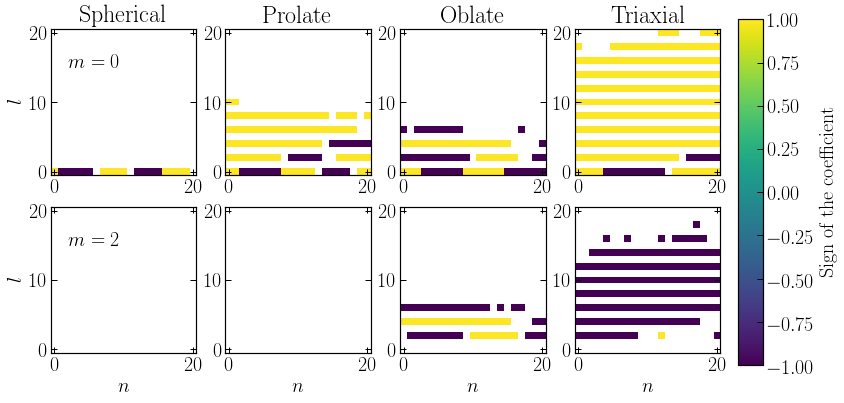

In [8]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax[0][0].set_title('Spherical')
ax[0][1].set_title('Prolate')
ax[0][2].set_title('Oblate')
ax[0][3].set_title('Triaxial')

im = ax[0][0].imshow((S_sph1[:,:,0]/np.abs(S_sph1[:,:,0])).T, origin='lower')
ax[0][1].imshow((S_s1[:,:,0]/np.abs(S_s1[:,:,0])).T, origin='lower')
ax[0][2].imshow((S_q1[:,:,0]/np.abs(S_q1[:,:,0])).T, origin='lower')
ax[0][3].imshow((S_t1[:,:,0]/np.abs(S_t1[:,:,0])).T, origin='lower')

ax[1][0].imshow((S_sph1[:,:,2]/np.abs(S_sph1[:,:,2])).T, origin='lower')
ax[1][1].imshow((S_s1[:,:,2]/np.abs(S_s1[:,:,2])).T, origin='lower')
ax[1][2].imshow((S_q1[:,:,2]/np.abs(S_q1[:,:,2])).T, origin='lower')
ax[1][3].imshow((S_t1[:,:,2]/np.abs(S_t1[:,:,2])).T, origin='lower')

ax[1][0].set_xlabel('$n$')
ax[1][1].set_xlabel('$n$')
ax[1][2].set_xlabel('$n$')
ax[1][3].set_xlabel('$n$')

#ax[3][0].set_ylabel('$l$')
ax[0][0].set_ylabel('$l$')
ax[1][0].set_ylabel('$l$')
ax[0][0].text(2, 15, '$m=0$')
ax[1][0].text(2, 15, '$m=2$')

fig_ax = fig.add_axes([0.92, 0.1, 0.03, 0.8])
cbar = fig.colorbar(im, cax=fig_ax)
cbar.set_label('Sign of the coefficient')
#savefig('soc_all_halos.pdf', bbox_inches='tight')
#ax[1][0].colorbar()

In [9]:
U_s1 = coeff_energy(S_s1, T_s1, 0, 21, 21)
U_q1 = coeff_energy(S_q1, T_q1, 0, 21, 21)
U_t1 = coeff_energy(S_t1, T_t1, 0, 21, 21)
U_sph = coeff_energy(S_sph1, T_sph1, 0, 21, 21)


U_s1_2 = coeff_energy(S_s1, T_s1, 6, 21, 21)
U_q1_2 = coeff_energy(S_q1, T_q1, 6, 21, 21)
U_t1_2 = coeff_energy(S_t1, T_t1, 6, 21, 21)

In [10]:
A_sph = np.sqrt(S_sph1**2 + T_sph1**2)
A_s1 = np.sqrt(S_s1**2 + T_s1**2)
A_q1 = np.sqrt(S_q1**2 + T_q1**2)
A_t1 = np.sqrt(S_t1**2 + T_t1**2)

In [11]:
U_sph_all = np.zeros((21, 21, 21))
U_s1_all = np.zeros((21, 21, 21))
U_q1_all = np.zeros((21, 21, 21))
U_t1_all = np.zeros((21, 21, 21))

for i in range(21):
    U_sph_all[:,:,i] = coeff_energy(S_sph1, T_sph1, i, 21, 21)
    U_s1_all[:,:,i] = coeff_energy(S_s1, T_s1, i, 21, 21)
    U_q1_all[:,:,i] = coeff_energy(S_q1, T_q1, i, 21, 21)
    U_t1_all[:,:,i] = coeff_energy(S_t1, T_t1, i, 21, 21)

In [12]:
ls = np.arange(0, 20, 1)
len(ls)

20

In [13]:
U_ls_s1 = np.zeros(len(ls))
for i in range(0, 20):
    U_ls_s1[i] = np.sum(U_s1_all[:,i,:])/np.sum(U_s1_all)

In [14]:
U_ls_q1 = np.zeros(len(ls))
for i in range(0, 20):
    U_ls_q1[i] = np.sum(U_q1_all[:,i,:])/np.sum(U_q1_all)

In [15]:
U_ls_t1 = np.zeros(len(ls))
for i in range(0, 20):
    U_ls_t1[i] = np.sum(U_t1_all[:,i,:])/np.sum(U_t1_all)

In [16]:
U_ls_sph = np.zeros(len(ls))
for i in range(0, 20):
    U_ls_sph[i] = np.sum(U_sph_all[:,i,:])/np.sum(U_sph_all)

In [17]:
print(argsort(U_ls_s1)[::-1])
print(argsort(U_ls_q1)[::-1])
print(argsort(U_ls_t1)[::-1])

[ 4  2  6  0  8 10  1  3  5  7 19 18 11 12 13 14 15 16 17  9]
[ 4  2  6  0  8 18  1  3  5  7 19 10 11 12 13 14 15 16 17  9]
[ 4  6  8  2 10  0 12 14 16 18  1  3  5 19  7 11 13 15 17  9]


In [18]:
print(U_ls_s1[argsort(U_ls_s1)[::-1]][:3])
print(U_ls_q1[argsort(U_ls_q1)[::-1]][:3])
print(U_ls_t1[argsort(U_ls_t1)[::-1]][:3])

[0.45426897 0.31598059 0.10301682]
[0.38365387 0.32290113 0.239808  ]
[0.40441974 0.34823955 0.11549404]


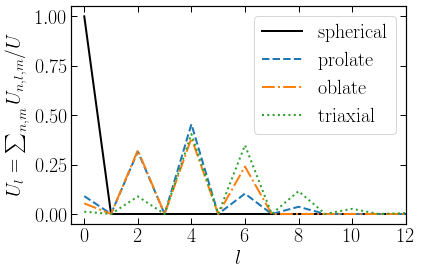

In [19]:
plot(ls, U_ls_sph, c='k', lw=2, label='spherical')
plot(ls, U_ls_s1, ls='--', lw=2, label='prolate')
plot(ls, U_ls_q1, ls='-.', lw=2, label='oblate')
plot(ls, U_ls_t1, ls=':', lw=2, label='triaxial')
legend()
xlabel('$l$')
ylabel('$U_l = \sum_{n,m} U_{n,l,m}/U$')
xlim(-0.5, 12)
xticks([0, 2, 4, 6, 8, 10, 12])
savefig('U_l_ideal_halos.pdf', bbox_inches='tight')

In [52]:
ns = np.arange(0, 21, 1)
U_ns_s1 = np.zeros((21, 21))
U_ns_q1 = np.zeros((21, 21))
U_ns_t1 = np.zeros((21, 21))

for l in range(0, 20):
    for m in range(20):
        U_ns_s1[l][m] = np.sum(U_s1_all[:,l,m])
        U_ns_q1[l][m] = np.sum(U_q1_all[:,l,m])
        U_ns_t1[l][m] = np.sum(U_t1_all[:,l,m])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


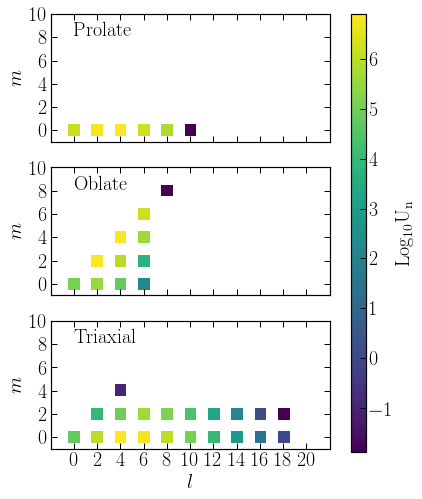

In [95]:
fig, ax = subplots(3, 1, figsize=(5, 8), sharey=True, sharex=True)
im = ax[0].imshow(np.log10(np.abs(U_ns_s1.T)), origin='lower')
ax[1].imshow(np.log10(np.abs(U_ns_q1.T)), origin='lower')
ax[2].imshow(np.log10(np.abs(U_ns_t1.T)), origin='lower')


ax[2].set_xlabel('$l$')
ax[0].set_ylabel('$m$')
ax[1].set_ylabel('$m$')
ax[2].set_ylabel('$m$')

ax[0].set_ylim(-1, 10)
#ax[0].set_xlim(-1, 20)
#ax[1].set_xlim(-1, 20)
#ax[2].set_xlim(-1, 20)

ax[0].set_xticks(np.arange(0, 22, 2))
ax[1].set_xticks(np.arange(0, 22, 2))
ax[2].set_xticks(np.arange(0, 22, 2))
ax[0].set_yticks(np.arange(0, 12, 2))

ax[0].text(0, 8, 'Prolate')
ax[1].text(0, 8, 'Oblate')
ax[2].text(0, 8, 'Triaxial')

fig_cax = fig.add_axes([0.96, 0.12, 0.04, 0.76])

cbar = fig.colorbar(im, cax=fig_cax)

cbar.set_label(r'$\rm{Log_{10}} U_{n}$')
savefig('ideal_halos_l_m.pdf', bbox_inches='tight')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/usr/local

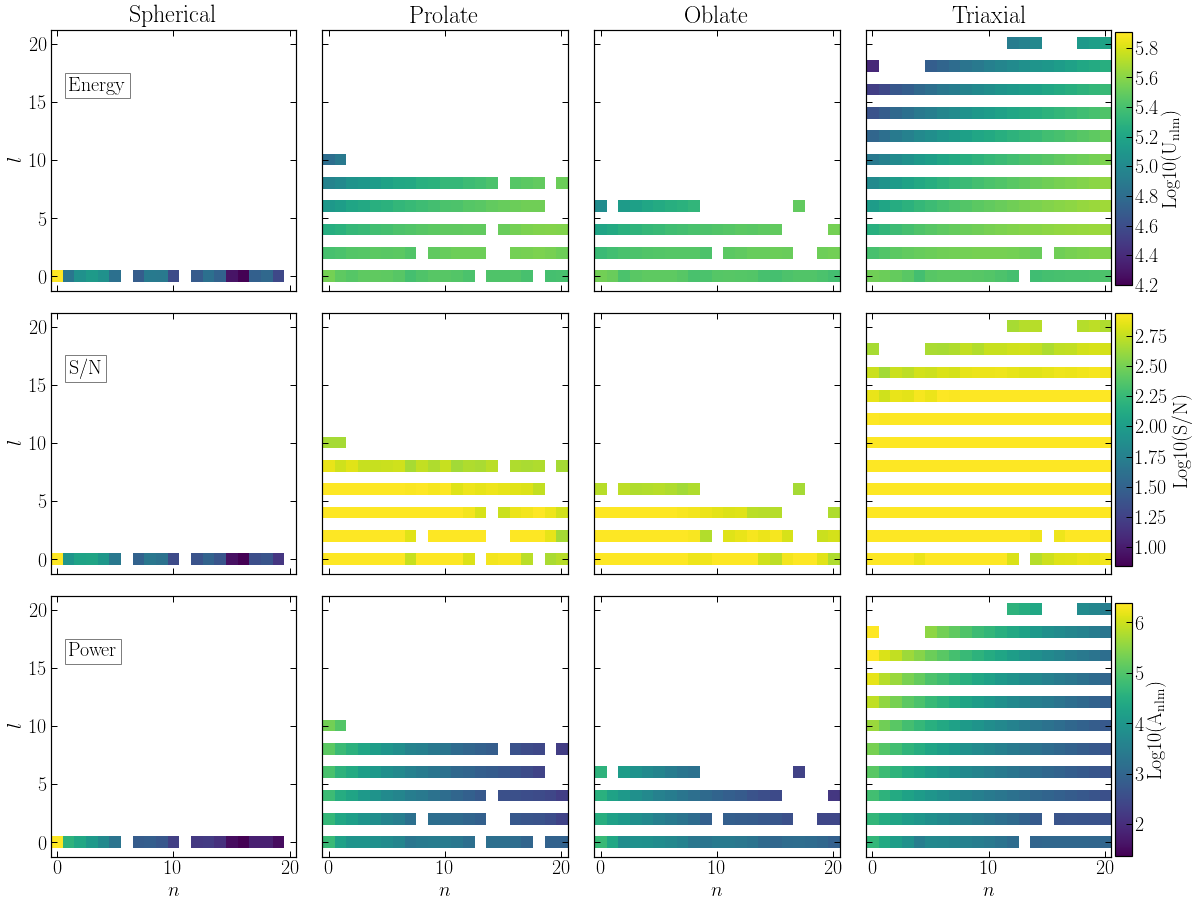

In [45]:
fig, ax = subplots(3, 4, figsize=(16, 13), sharex=True, sharey=True)
m=0
im1 = ax[0][0].imshow(np.log10(np.abs(U_sph.T)), origin='lower')
ax[0][0].set_title('Spherical')
ax[0][1].imshow(np.log10(np.abs(U_s1.T)), origin='lower', vmin=-10, vmax=10)
ax[0][1].set_title('Prolate')
ax[0][2].imshow(np.log10(np.abs(U_q1.T)), origin='lower', vmin=-10, vmax=10)
ax[0][2].set_title('Oblate')
ax[0][3].imshow(np.log10(np.abs(U_t1.T)), origin='lower', vmin=-10, vmax=10)
ax[0][3].set_title('Triaxial')

im2 = ax[1][0].imshow(np.log10(np.abs(sn_sph1[:,:,m].T)), origin='lower')
ax[1][1].imshow(np.log10(np.abs(sn_s1[:,:,m].T)), origin='lower', vmin=-3, vmax=1.3)
ax[1][2].imshow(np.log10(np.abs(sn_q1[:,:,m].T)), origin='lower', vmin=-3, vmax=1.3)
ax[1][3].imshow(np.log10(np.abs(sn_t1[:,:,m].T)), origin='lower', vmin=-3, vmax=1.3)

im3 = ax[2][0].imshow(np.log10(np.abs(A_sph[:,:,m].T)), origin='lower',)
ax[2][1].imshow(np.log10(np.abs(A_s1[:,:,m].T)), origin='lower', vmin=-3.5, vmax=11)
ax[2][2].imshow(np.log10(np.abs(A_q1[:,:,m].T)), origin='lower', vmin=-3.5, vmax=11)
ax[2][3].imshow(np.log10(np.abs(A_t1[:,:,m].T)), origin='lower', vmin=-3.5, vmax=11)
"""
ax[3][0].imshow(np.log10(np.abs(U_sph*sn_sph1[:,:,0]/np.max(sn_sph1[:,:,0])).T), 
                origin='lower', vmin=-10, vmax=7)
ax[3][1].imshow(np.log10(np.abs(U_s1*sn_s1[:,:,0]/np.max(sn_s1[:,:,0])).T), 
                origin='lower', vmin=-10, vmax=7)
ax[3][2].imshow(np.log10(np.abs(U_q1*sn_q1[:,:,0]/np.max(sn_q1[:,:,0])).T), 
                origin='lower', vmin=-10, vmax=7)
ax[3][3].imshow(np.log10(np.abs(U_t1*sn_t1[:,:,0]/np.max(sn_t1[:,:,0])).T), 
                origin='lower', vmin=-10, vmax=7)
"""
ax[2][0].set_xlabel('$n$')
ax[2][1].set_xlabel('$n$')
ax[2][2].set_xlabel('$n$')
ax[2][3].set_xlabel('$n$')

#ax[3][0].set_ylabel('$l$')
ax[2][0].set_ylabel('$l$')
ax[0][0].set_ylabel('$l$')
ax[1][0].set_ylabel('$l$')

ax[0][0].text(1, 16, 'Energy', color='k', 
              bbox=dict(facecolor='w', alpha=0.5))
ax[1][0].text(1, 16, 'S/N', color='k', 
              bbox=dict(facecolor='w', alpha=0.5))
ax[2][0].text(1, 16, 'Power', color='k', 
              bbox=dict(facecolor='w', alpha=0.5))
#ax[3][0].text(1, 16, r'Energy $\times \hat{S/N}$', color='k', 
#              bbox=dict(facecolor='w', alpha=0.5))
fig_ax1 = fig.add_axes([0.98, 0.68, 0.015, 0.27])
cbar1 = fig.colorbar(im1, cax=fig_ax1)
cbar1.set_label(r'$\rm{Log10(U_{nlm})}$')

fig_ax2 = fig.add_axes([0.98, 0.38, 0.015, 0.27])
cbar2 = fig.colorbar(im2, cax=fig_ax2)
cbar2.set_label(r'$\rm{Log10(S/N)}$')
fig_ax3 = fig.add_axes([0.98, 0.07, 0.015, 0.27])
cbar3 = fig.colorbar(im3, cax=fig_ax3)
cbar3.set_label(r'$\rm{Log10(A_{nlm})}$')

fig.tight_layout()

savefig('trixial_halo_energy.pdf', bbox_inches='tight')

In [46]:
def cumulative(x):
    #x_clean = x.flatten()[np.where(x.flatten()!=0)]
    x_clean = x.flatten()
    x_sort = x_clean[np.argsort(x_clean)][::-1]
    x_cumulative = np.zeros(len(x_sort))
    for i in range(len(x_sort)):
        x_cumulative[i] = np.sum(x_sort[:i])
    return x_cumulative

def cumulative_rev(x):
    #x_clean = x.flatten()[np.where(x.flatten()!=0)]
    #x_sort = x_clean[np.argsort(x_clean)][::-1]
    x_clean = x.flatten()
    x_sort = x_clean[np.argsort(x_clean)][::-1]

    x_cumulative = np.zeros(len(x_sort))
    for i in range(len(x_sort)):
        x_cumulative[i] = np.sum(x_sort[:-(i+1)])
    return x_cumulative

In [47]:
A_sph = np.sqrt(S_sph1**2 + T_sph1**2)
A_s = np.sqrt(S_s1**2 + T_s1**2)
A_q = np.sqrt(S_q1**2 + T_q1**2)
A_t = np.sqrt(S_t1**2 + T_t1**2)

In [48]:
U_sph1_cum = cumulative(np.abs(U_sph_all))
U_s1_cum = cumulative_rev(-U_s1_all)
U_q1_cum = cumulative_rev(-U_q1_all)
U_t1_cum = cumulative_rev(-U_t1_all)

In [49]:
A_sph_cum = cumulative_rev(A_sph)
A_s_cum = cumulative_rev(A_s)
A_q_cum = cumulative_rev(A_q)
A_t_cum = cumulative_rev(A_t)

In [50]:
sn_sph_cum = cumulative_rev(sn_sph1)
sn_s_cum = cumulative_rev(sn_s1)
sn_q_cum = cumulative_rev(sn_q1)
sn_t_cum = cumulative_rev(sn_t1)

In [55]:
len(sn_sph_cum[::-1])

9261

(-10, 400)

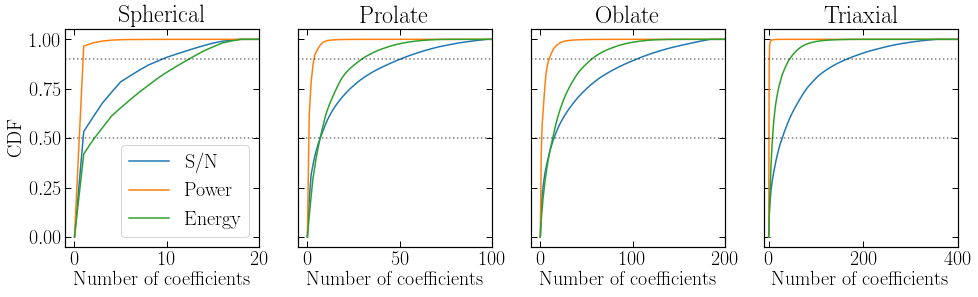

In [70]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

ax[0].set_title('Spherical')
ax[1].set_title('Prolate')
ax[2].set_title('Oblate')
ax[3].set_title('Triaxial')

ax[0].plot(sn_sph_cum[::-1]/np.abs(sn_sph_cum[0]), label='S/N')
ax[1].plot(sn_s_cum[::-1]/np.abs(sn_s_cum[0]))
ax[2].plot(sn_q_cum[::-1]/np.abs(sn_q_cum[0]))
ax[3].plot(sn_t_cum[::-1]/np.abs(sn_t_cum[0]))


ax[0].plot(A_sph_cum[::-1]/np.abs(A_sph_cum[0]), label='Power')
ax[1].plot(A_s_cum[::-1]/np.abs(A_s_cum[0]))
ax[2].plot(A_q_cum[::-1]/np.abs(A_q_cum[0]))
ax[3].plot(A_t_cum[::-1]/np.abs(A_t_cum[0]))

ax[0].plot(U_sph1_cum/np.abs(U_sph1_cum[-1]), label='Energy')
ax[1].plot(U_s1_cum[::-1]/np.abs(U_s1_cum[0]))
ax[2].plot(U_q1_cum[::-1]/np.abs(U_q1_cum[0]))
ax[3].plot(U_t1_cum[::-1]/np.abs(U_t1_cum[0]))



ax[0].legend()
for i in range(4):
    ax[i].set_xlabel('Number of coefficients')
    ax[i].axhline(0.9, c='k', alpha=0.5, ls=':')
    ax[i].axhline(0.5, c='k', alpha=0.5, ls=':')
ax[0].set_ylabel('CDF')
ax[0].set_xlim(-1, 20)
ax[1].set_xlim(-5, 100)
ax[2].set_xlim(-10, 200)
ax[3].set_xlim(-10, 400)


#savefig('CDF_all_halo.pdf', bbox_inches='tight')

In [85]:
def top_coefficients(q, p, axis):
    index = np.where(q/np.abs(q[axis])<p)[0]
    print(len(index))

In [98]:
print('Spherical')
top_coefficients(sn_sph_cum, 0.9, 0)
top_coefficients(U_sph1_cum, 0.9, -1)
top_coefficients(A_sph_cum, 0.9, 0)

print('Prolate')
top_coefficients(sn_s_cum, 0.9, 0)
top_coefficients(U_s1_cum, 0.9, 0)
top_coefficients(A_s_cum, 0.9, 0)

print('Oblate')
top_coefficients(sn_q_cum, 0.9, 0)
top_coefficients(U_q1_cum, 0.9, 0)
top_coefficients(A_q_cum, 0.9, 0)

print('Triaxial')
top_coefficients(sn_t_cum, 0.9, 0)
top_coefficients(U_t1_cum, 0.9, 0)
top_coefficients(A_t_cum, 0.9, 0)

Spherical
10
13
1
Prolate
51
30
4
Oblate
105
56
10
Triaxial
166
45
2


In [97]:
def density_slab(fig, ax, S, T, vmin, vmax, delta=0, S2=0, T2=0, plane='yz'):
    y_grid = np.arange(-200, 200, 1.5)
    z_grid = np.arange(-200, 200, 1.5)
    y_grid, z_grid = meshgrid(y_grid, z_grid)
    bins=len(np.arange(-200, 200, 1.5))

    
    if plane=='yz':       
        xyz = np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())),
                                             y_grid.flatten(),
                                             z_grid.flatten()]).T)
    elif plane=='xy':
        xyz = np.ascontiguousarray(np.array([y_grid.flatten(),
                                             z_grid.flatten(),
                                            np.zeros(len(y_grid.flatten()))]).T)
    elif plane=='xz':
        xyz = np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())),
                                             y_grid.flatten(),
                                             z_grid.flatten()]).T)

    rho_biff = biff.density(np.ascontiguousarray(xyz), S, T, M=1, r_s=40.85)


    #figsize(10,4)
    #subplot(1, 2, 1)
    bounds=np.arange(vmin, vmax, int(vmax-vmin)*0.1)
    dt = int(vmax-vmin)*0.1
    bounds = list(np.arange(vmin, vmax+dt, dt))
    
    levels=np.arange(vmin, vmax, int(vmax-vmin)*0.01)
    dt= int(vmax-vmin)*0.01
    levels = list(np.arange(vmin, vmax+dt, dt))
    
    if delta==0:
        im = ax.contourf(y_grid, z_grid, np.log10(np.abs(rho_biff)).reshape(bins, bins), 50,
                         origin='lower', cmap='Spectral_r', levels=levels, extend='both')

    #subplot(1, 2, 2)
    elif delta==1:
        if type(S2) != int:
            rho_biff_base = biff.density(np.ascontiguousarray(xyz), S2, T2, M=1, r_s=40.85)
        else:
            S_000 = np.zeros((1, 1, 1))
            T_000 = np.zeros((1, 1, 1))
            S_000[0][0][0] = S[0][0][0]
            rho_biff_base = biff.density(np.ascontiguousarray(xyz), S_000, T_000, M=1, r_s=40.85)
        im = ax.contourf(y_grid, z_grid, ((rho_biff/rho_biff_base)-1).reshape(bins, bins), 50,
                         origin='lower', cmap='Spectral_r', levels=levels, extend='both')

    ax.set_xlim(-200, 200)
    ax.set_ylim(-200, 200)
    bounds=np.arange(vmin, vmax, int(vmax-vmin)*0.1)
    dt = int(vmax-vmin)*0.1
    bounds = list(np.arange(vmin, vmax+dt, dt))
    #cbar = fig.colorbar(im, ax=ax, boundaries=bounds, ticks=bounds)
    cbar = fig.colorbar(im, ax=ax, boundaries=bounds)
    cbar.set_ticks(bounds)
    

    if delta==0:
        cbar.set_label(r'$\rm{Log_{10}\rho}$')
    if delta==1:
        cbar.set_label(r'$\rm{\Delta \rho}$')

    
def coefficients_viz(fig, ax, m, I, vmin, vmax):
    im = ax.imshow(np.log10(I[:,:,m]).T, origin='lower', vmin=vmin, vmax=vmax)
    return im
    

    
def summary_figure(S, T, N_coeff, I, vmin2, vmax2, fig_name, S2, T2):
    """
    Figure with summary of the coefficients and it's 
    density information 
    
    """

    fig = plt.figure(figsize=(12, 10))

    gs1 = GridSpec(2, 1)
    ax1 = fig.add_subplot(gs1[0])
    ax2 = fig.add_subplot(gs1[1])

    density_slab(fig, ax1, S, T, delta=0, vmin=-3, vmax=3)
    density_slab(fig, ax2, S, T, delta=1, vmin=-1.5, vmax=1.5, S2=S2, T2=T2)
    ax1.set_title('N coefficients={:02d}'.format(N_coeff))
    ax1.set_xlabel(r'$\rm{y[kpc]}$')
    ax1.set_ylabel(r'$\rm{z[kpc]}$')

    ax2.set_xlabel(r'$\rm{y[kpc]}$')
    ax2.set_ylabel(r'$\rm{z[kpc]}$')

    gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])

    gs2 = GridSpec(3, 1)
    m_order=0
    for ss in gs2:
        if m_order==3:
            continue
        else:
            ax = fig.add_subplot(ss)
            im = coefficients_viz(fig, ax, m_order*2, I, vmin2, vmax2)
            m_order+=1
            ax.set_ylim(-0.5, 16)
            ax.set_ylabel("$l$")
            ax.text(15, 14, '$m=${}'.format(2*(m_order-1)))

    ax.set_xlabel("$n$")

    cbar_ax1 = fig.add_axes([0.6, 0.01, 0.33, 0.02])
    fig.colorbar(im, ax=ax, orientation='horizontal', cax=cbar_ax1)


    gs2.tight_layout(fig, rect=[0.5, 0, 1, 1], h_pad=0.5)

    # We may try to match the top and bottom of two grids ::
    top = min(gs1.top, gs2.top)
    bottom = max(gs1.bottom, gs2.bottom)

    gs1.update(top=top, bottom=bottom)
    gs2.update(top=top, bottom=bottom)
    #plt.show()
    savefig(fig_name, bbox_inches='tight')


In [98]:
def movie(U, S, T):
    U_norm = U/np.sum(U)
    # Energy Cuts

    U_cut = np.linspace(-14, -12, 10)
    
    for i in range(0, len(U_cut)):
    #for i in range(0, 10):

        print('this is Energy slice ', U_cut[-(i+1)])
        # lowest order energy coeff
        index = np.where(np.log10(U_norm)>=U_cut[-(i+1)])
        
        index2 = np.where(np.log10(U_norm)<U_cut[-(i+1)])
        S_mw_copy = np.copy(S)
        T_mw_copy = np.copy(T)
        S_mw_copy2 = np.copy(S)
        T_mw_copy2 = np.copy(T)
        print(len(index2[0]))
        print(len(index[0]))
        #print(index)


        for j in range(len(index[0])):
            #print('here')
            #print(index[0][j], index[1][j], index[2][j])

            S_mw_copy[index[0][j], index[1][j], index[2][j]] = 0
            T_mw_copy[index[0][j], index[1][j], index[2][j]] = 0
        for j in range(len(index2[0])):
            S_mw_copy2[index2[0][j], index2[1][j], index2[2][j]] = 0
            T_mw_copy2[index2[0][j], index2[1][j], index2[2][j]] = 0

        N_coeff = np.nonzero(S_mw_copy2.flatten())
        print('monopole', S_mw_copy2[0,0,0])
        print(len(N_coeff[0]))
        U_mw_c = np.zeros((21, 21, 21))
        for k in range(20):
             #print(k)
            U_mw_c[:,:,k] = coeff_energy(S_mw_copy2, T_mw_copy2, k, 21, 21)

        fig_name = "triaxial_plot_u_{:03d}.png".format(67+i)
        summary_figure(S_mw_copy2, T_mw_copy2, len(N_coeff[0]), np.abs(U_mw_c), -6, 6, 
                       fig_name, S2=S, T2=T)


this is Energy slice  -0.8
9261
0
monopole 0.0
0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("

this is Energy slice  -0.946938775510203
9261
0
monopole 0.0
0
this is Energy slice  -1.093877551020408
9258
3
monopole 0.0
3
this is Energy slice  -1.240816326530612
9256
5
monopole 0.0
5
this is Energy slice  -1.387755102040816
9254
7
monopole 0.0
7
this is Energy slice  -1.5346938775510202
9251
10
monopole 2078047.3256673883
10
this is Energy slice  -1.6816326530612242
9247
14
monopole 2078047.3256673883
14
this is Energy slice  -1.8285714285714283
9242
19
monopole 2078047.3256673883
19
this is Energy slice  -1.9755102040816324
9240
21
monopole 2078047.3256673883
21
this is Energy slice  -2.1224489795918364
9235
26
monopole 2078047.3256673883
26
this is Energy slice  -2.2693877551020405
9229
32
monopole 2078047.3256673883
32
this is Energy slice  -2.4163265306122446
9223
38
monopole 2078047.3256673883
38
this is Energy slice  -2.5632653061224486
9215
46
monopole 2078047.3256673883
46
this is Energy slice  -2.7102040816326527
9212
49
monopole 2078047.3256673883
49
this is Energy slic

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


this is Energy slice  -3.8857142857142852
9188
73
monopole 2078047.3256673883
73
this is Energy slice  -4.032653061224489
9184
77
monopole 2078047.3256673883
77
this is Energy slice  -4.179591836734693
9184
77
monopole 2078047.3256673883
77
this is Energy slice  -4.326530612244897
9184
77
monopole 2078047.3256673883
77
this is Energy slice  -4.4734693877551015
9182
79
monopole 2078047.3256673883
79
this is Energy slice  -4.6204081632653065
9180
81
monopole 2078047.3256673883
81
this is Energy slice  -4.7673469387755105
9179
82
monopole 2078047.3256673883
82
this is Energy slice  -4.914285714285715
9178
83
monopole 2078047.3256673883
83
this is Energy slice  -5.061224489795919
9178
83
monopole 2078047.3256673883
83
this is Energy slice  -5.208163265306123
9176
85
monopole 2078047.3256673883
85
this is Energy slice  -5.355102040816327
9175
86
monopole 2078047.3256673883
86
this is Energy slice  -5.502040816326531
9174
87
monopole 2078047.3256673883
87
this is Energy slice  -5.64897959183

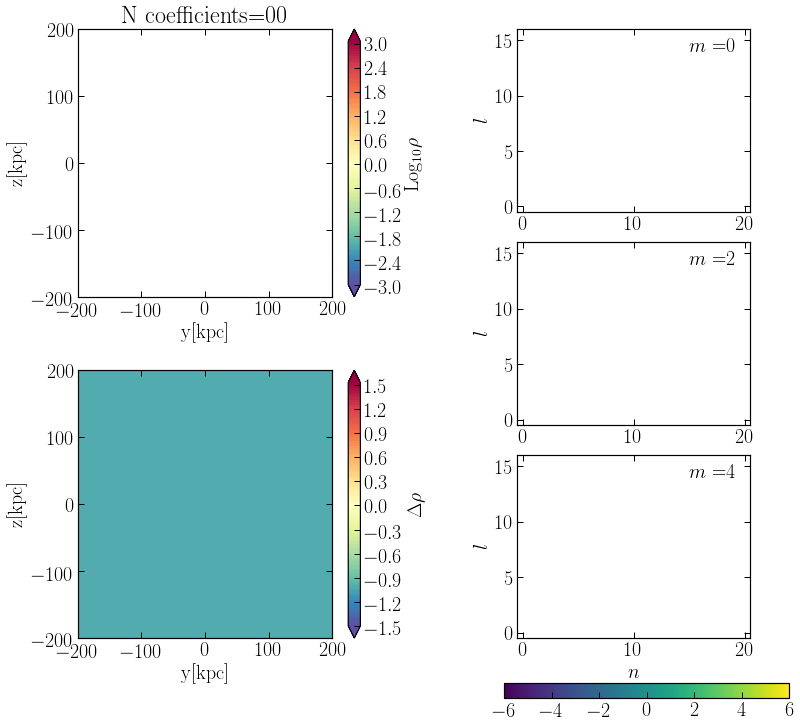

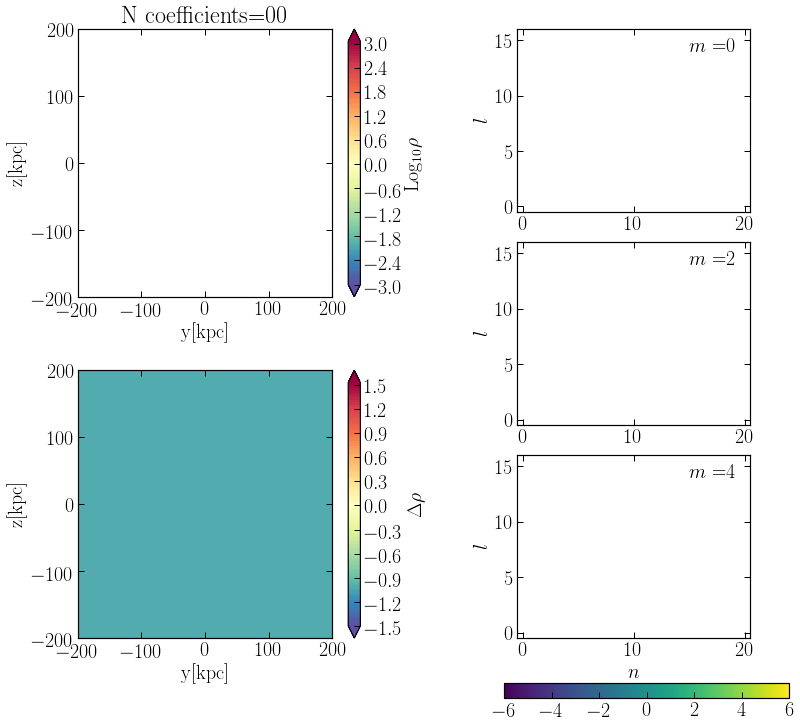

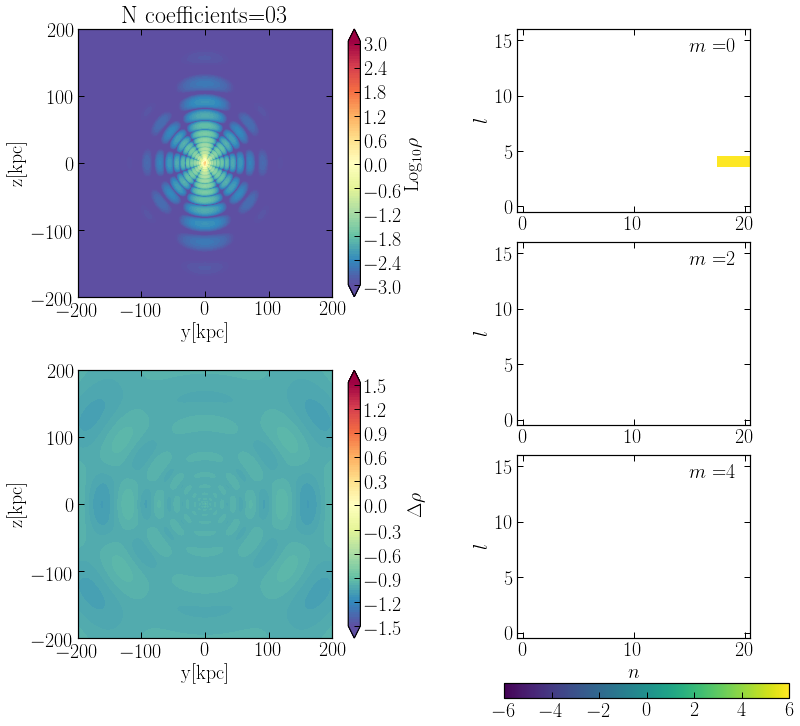

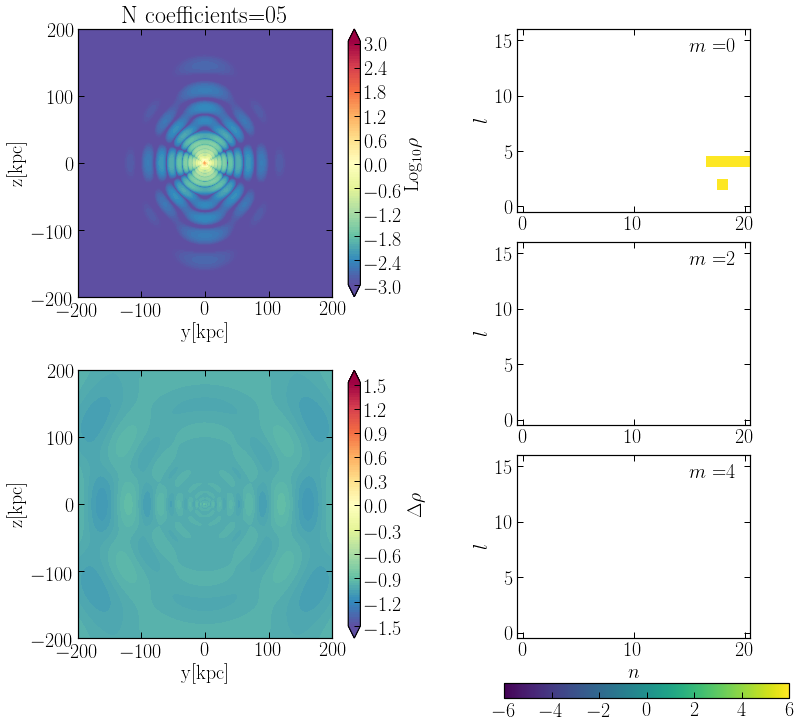

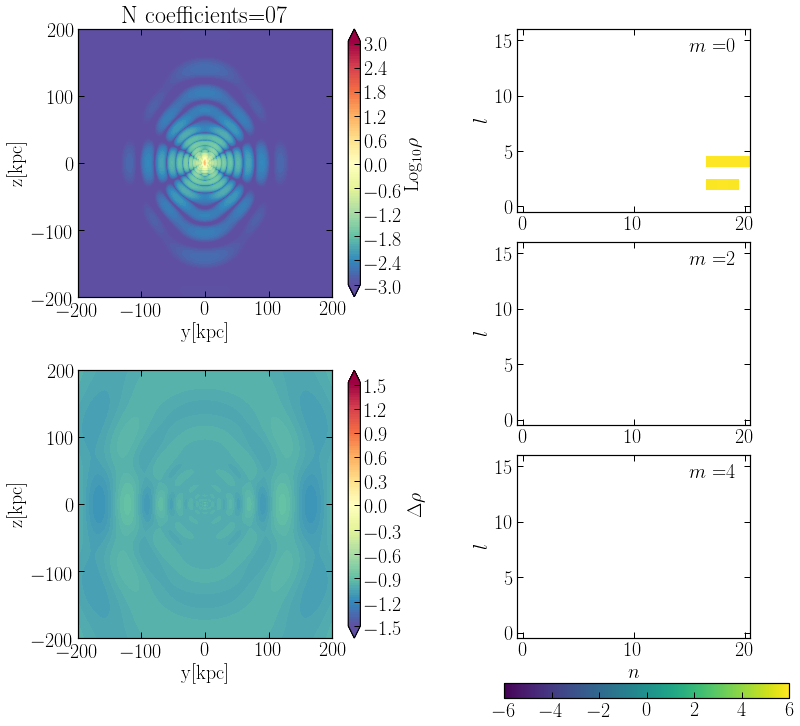

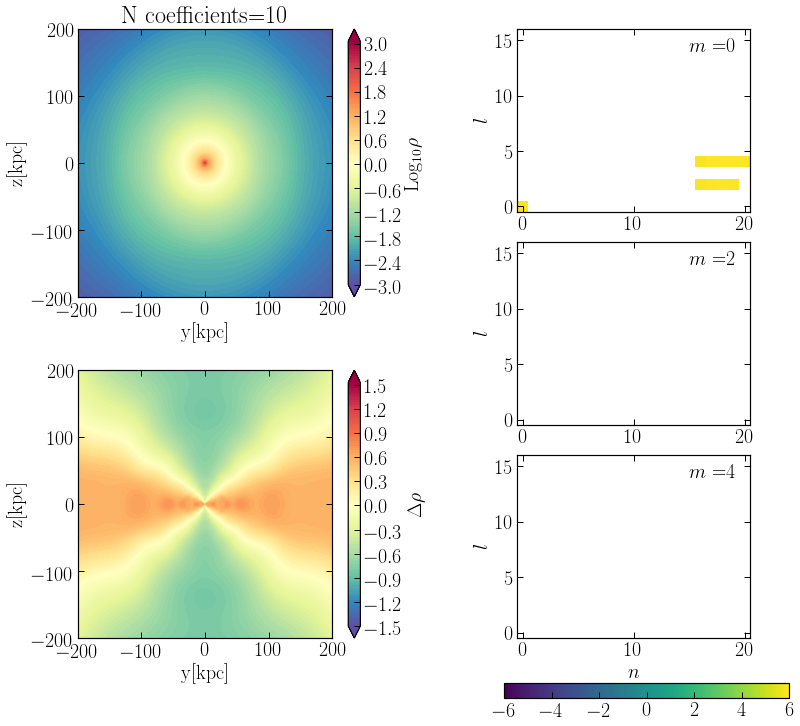

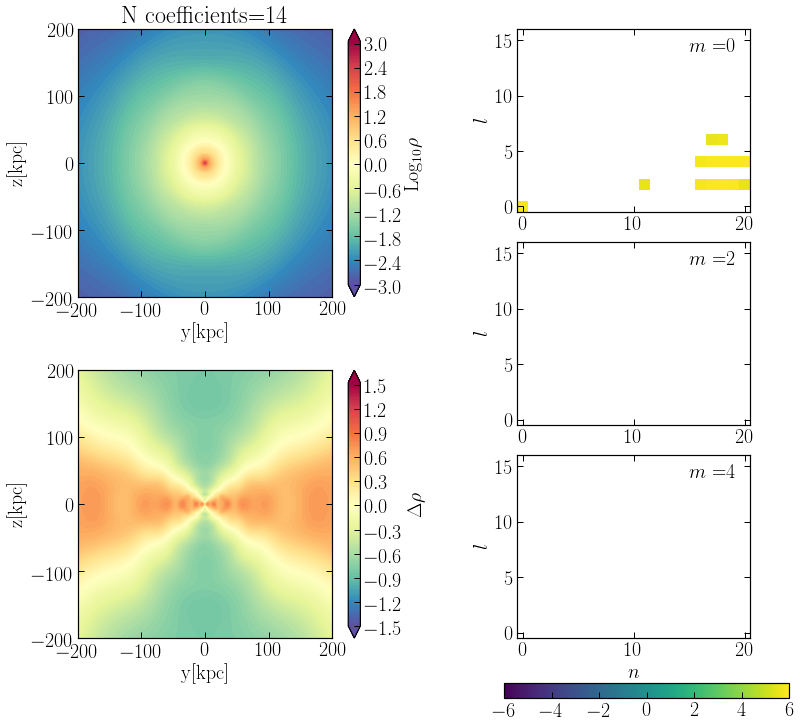

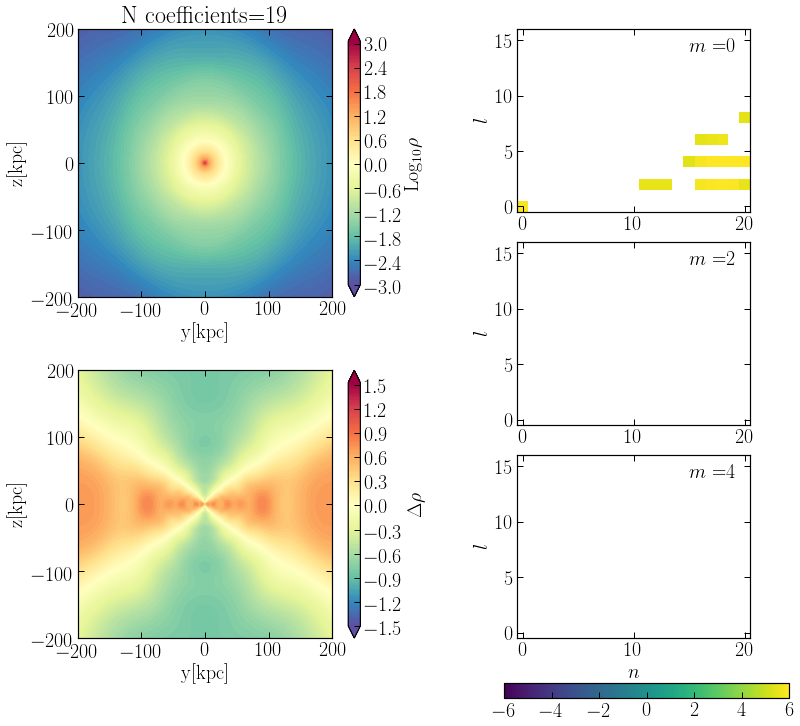

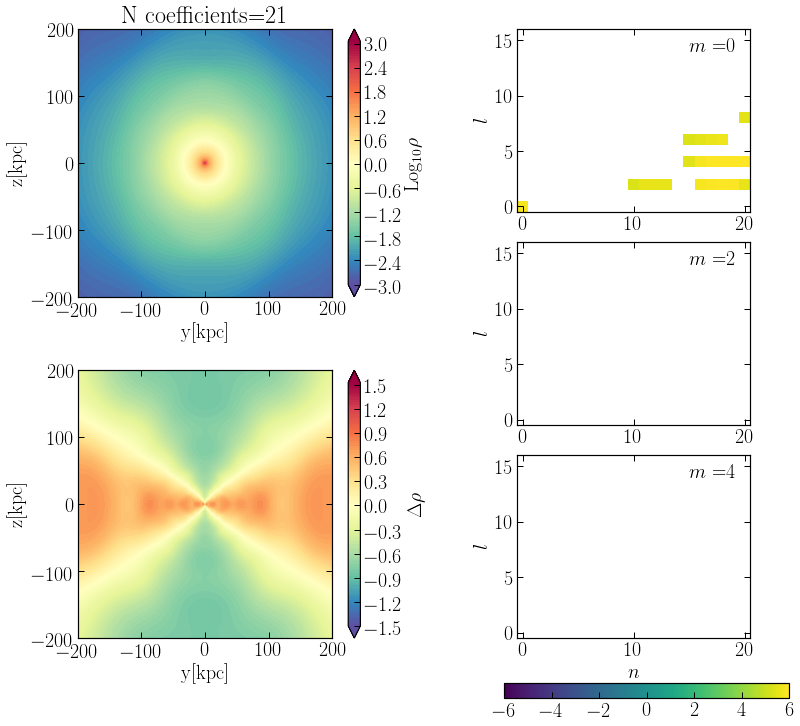

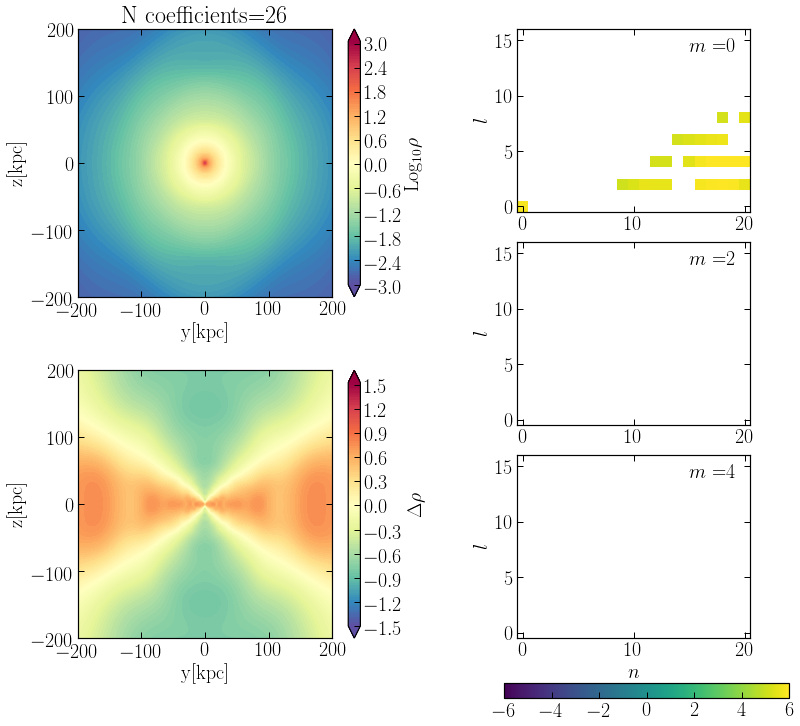

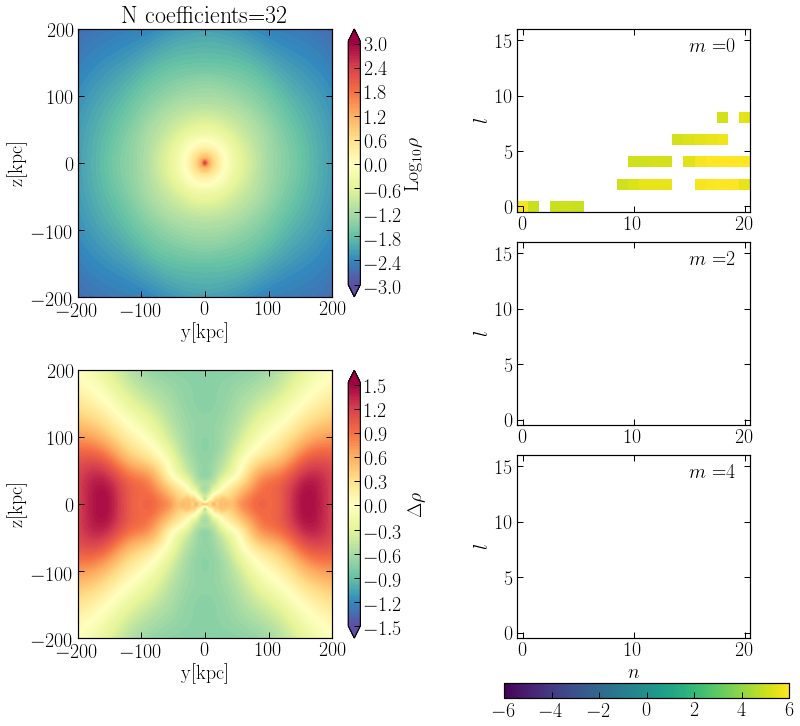

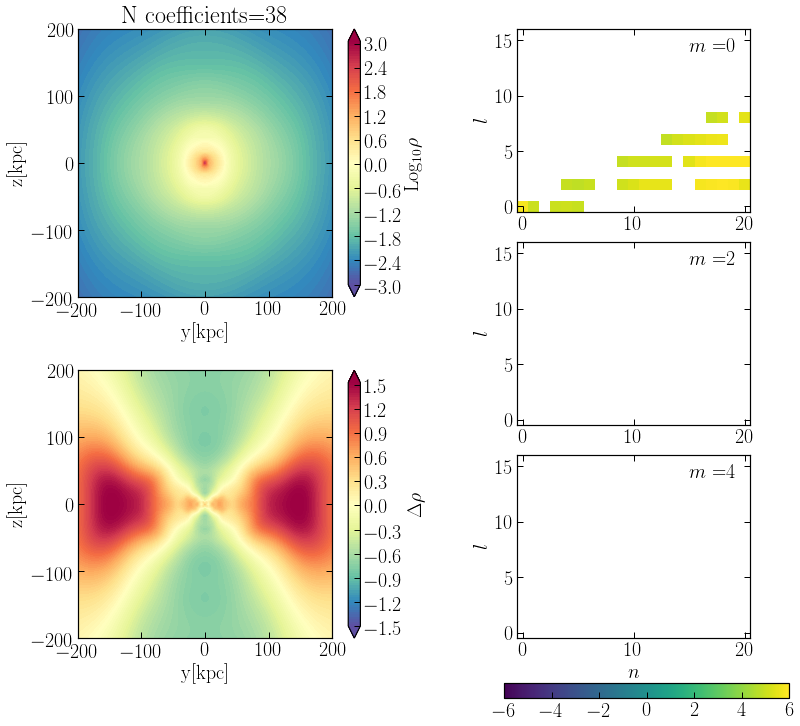

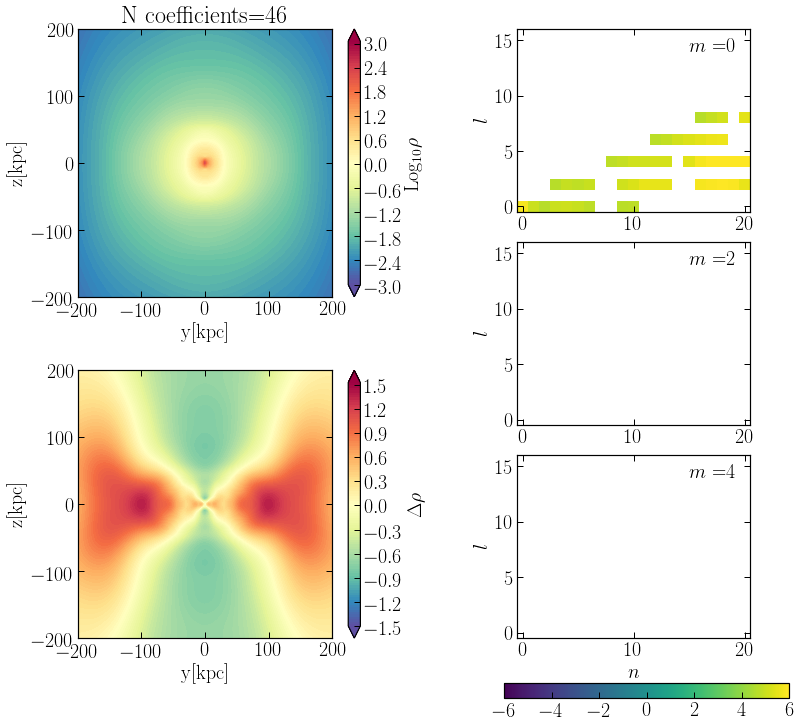

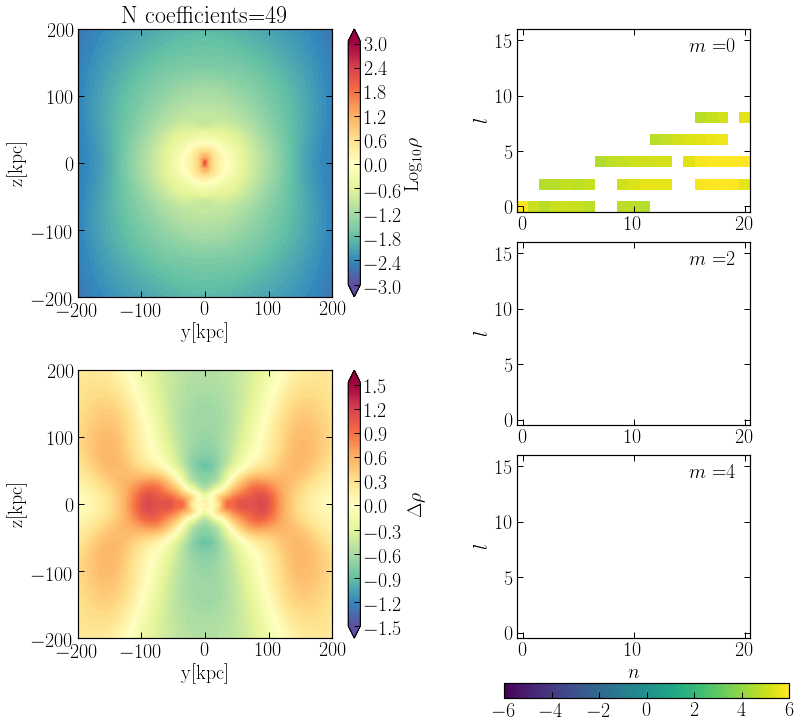

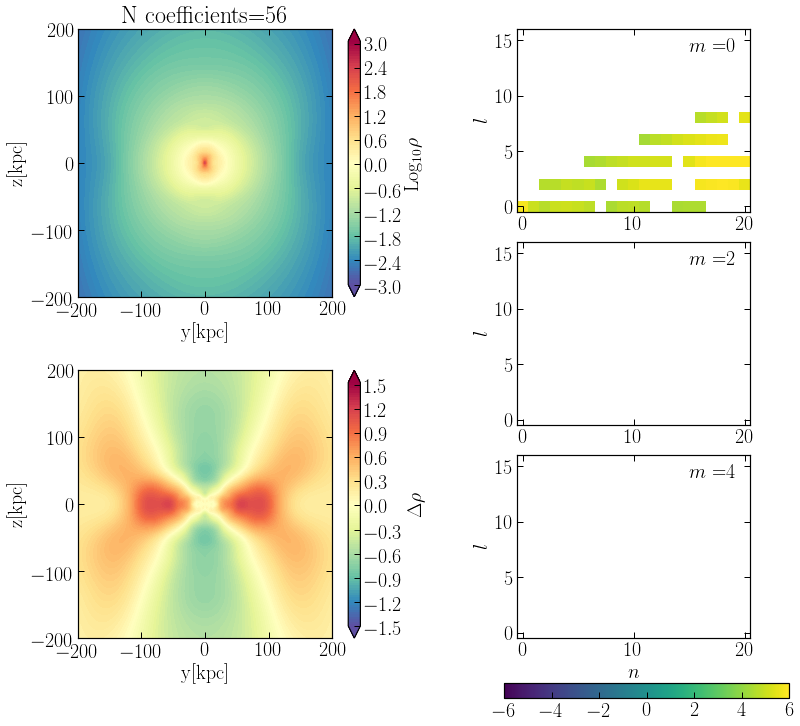

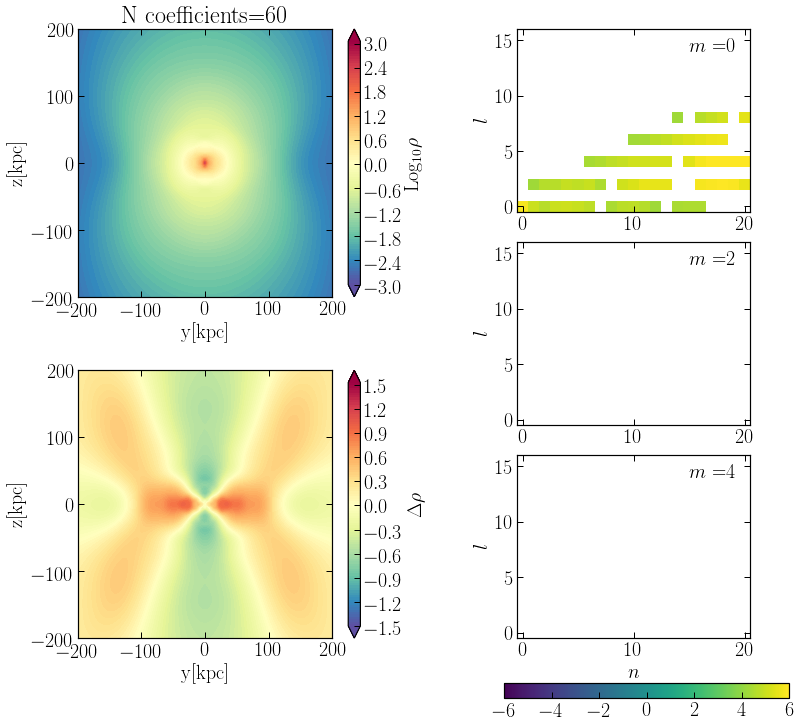

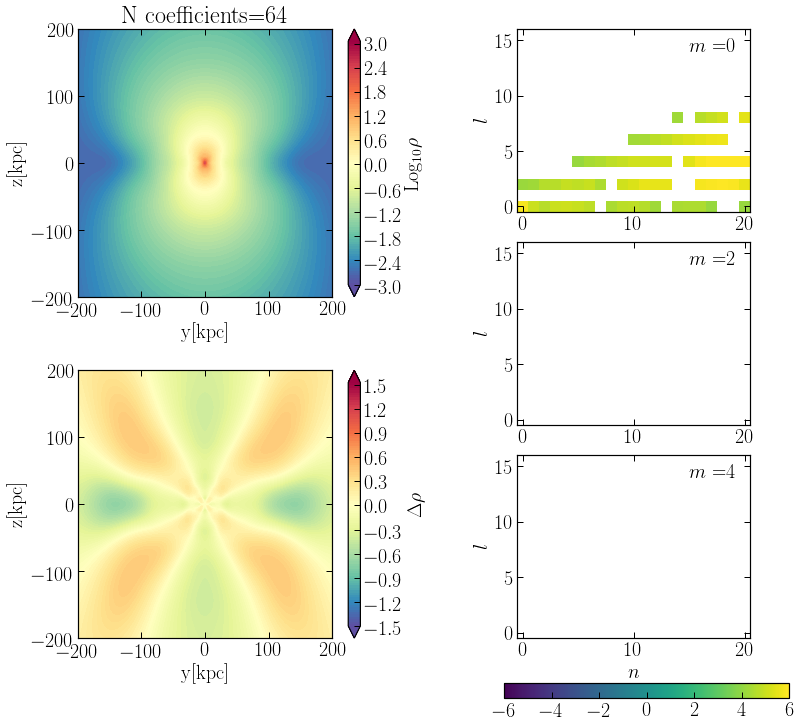

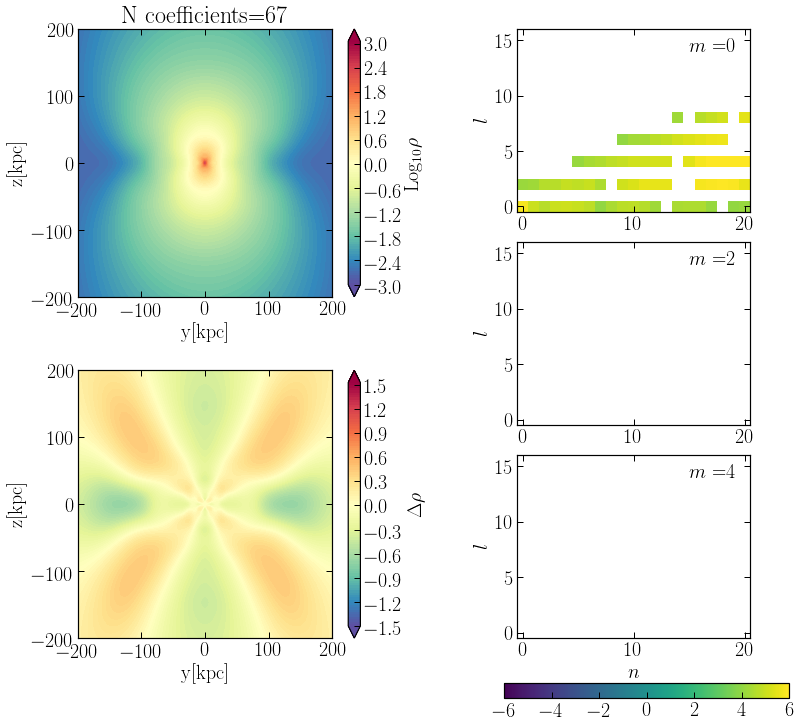

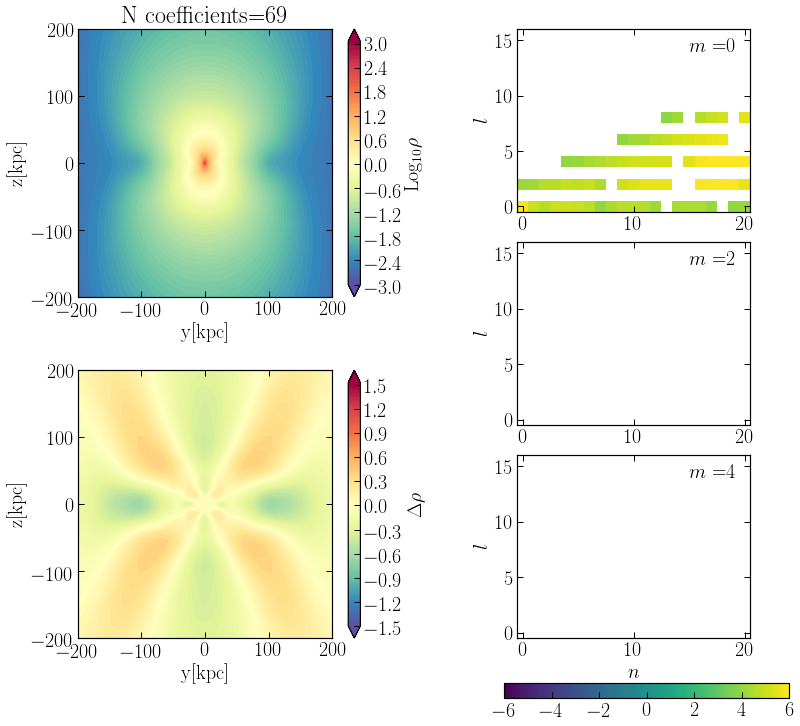

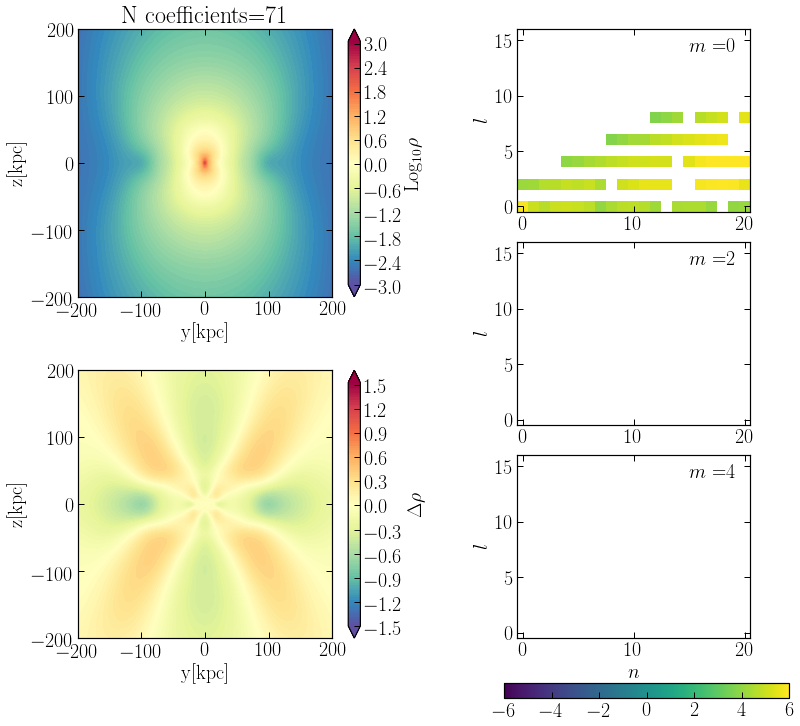

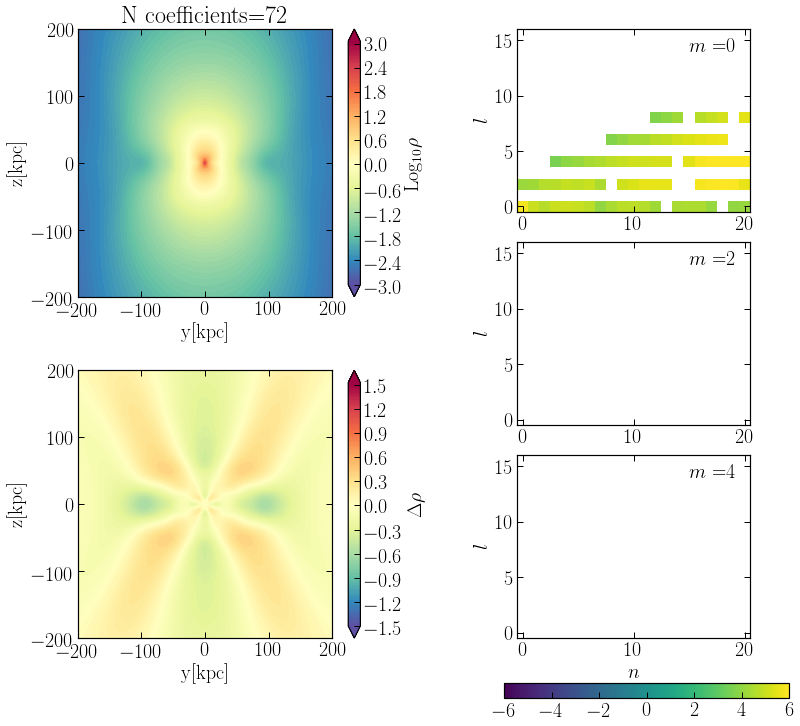

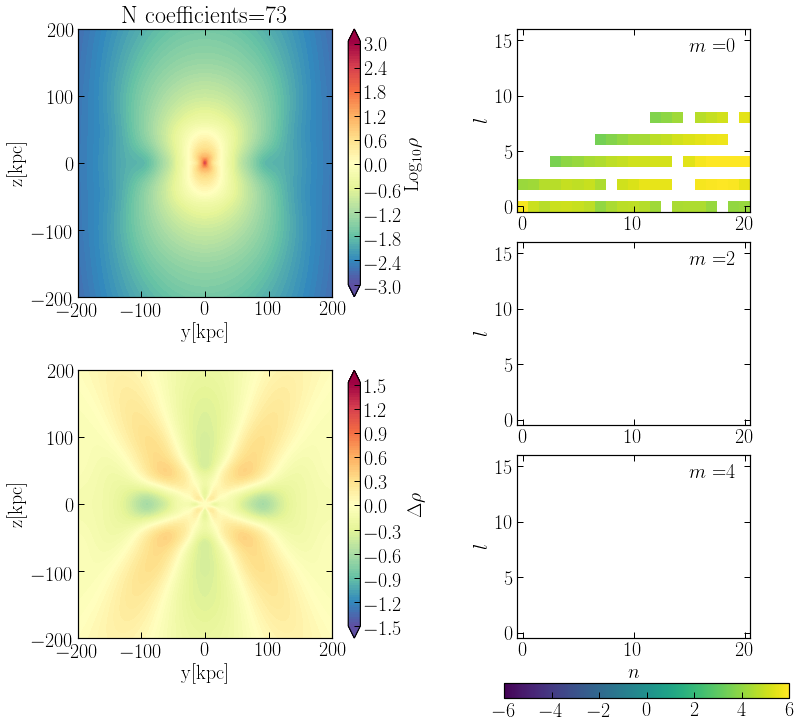

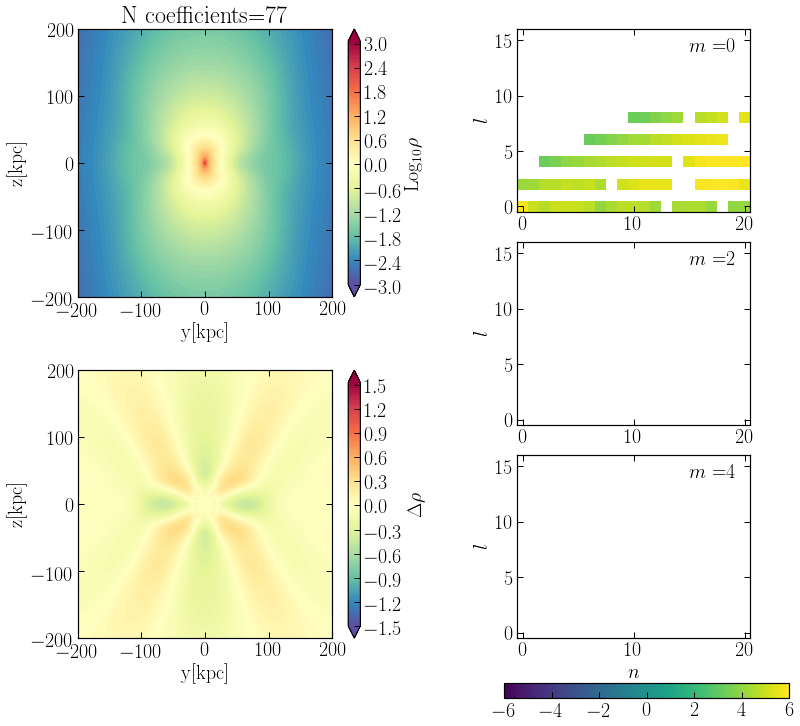

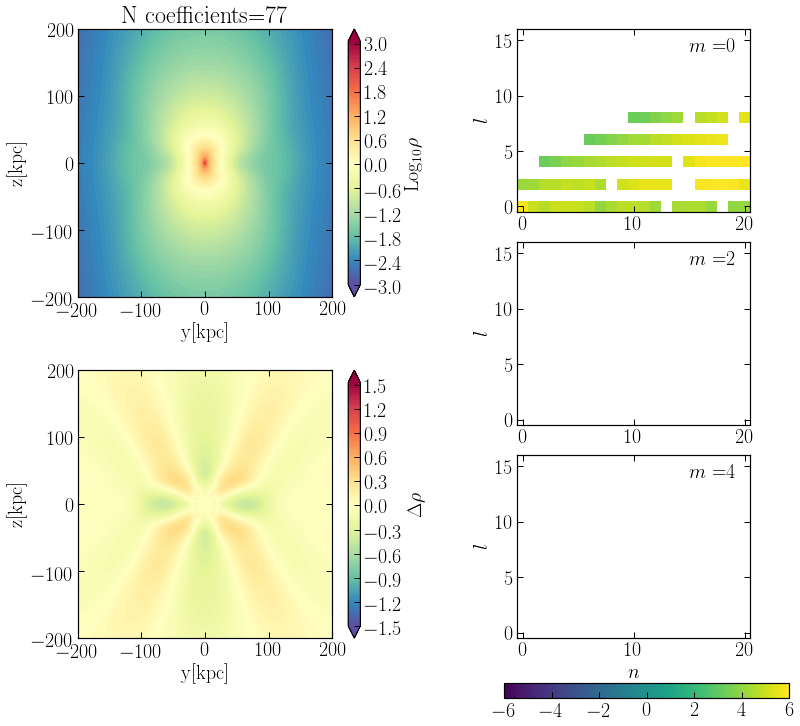

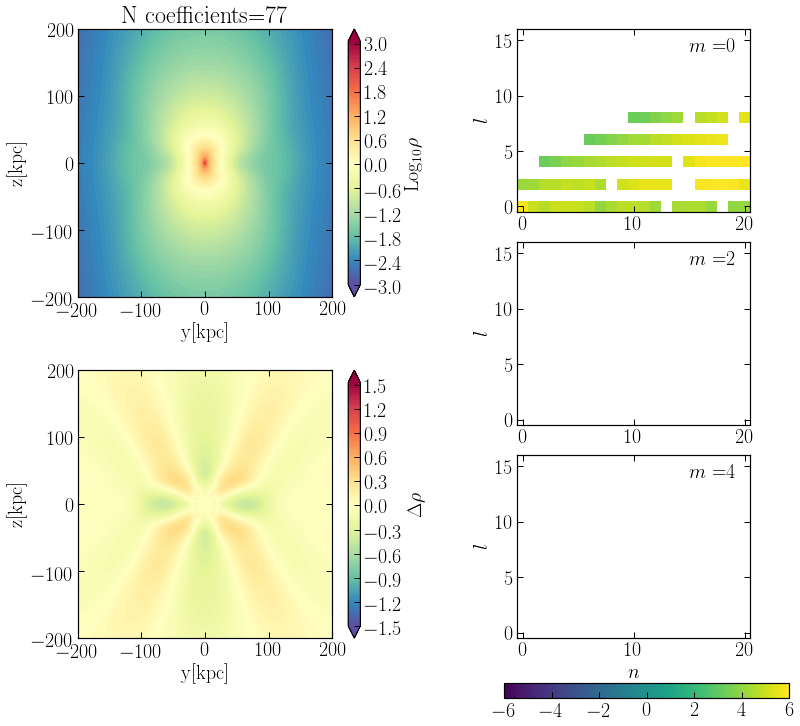

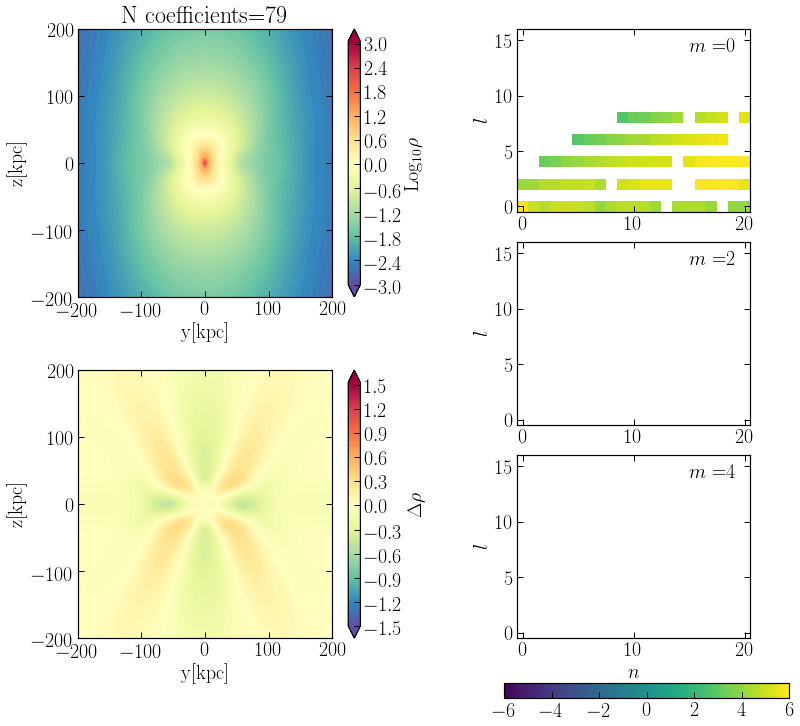

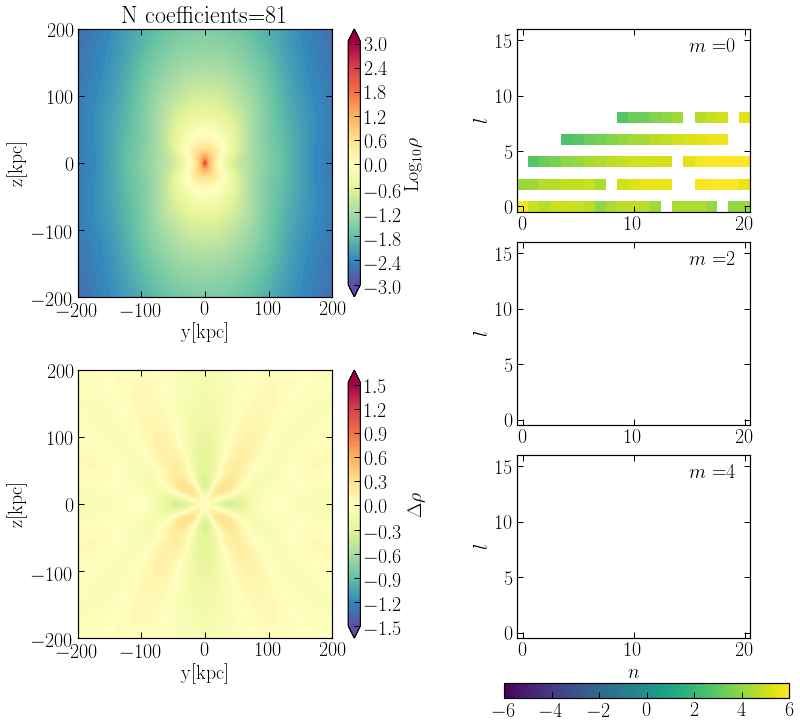

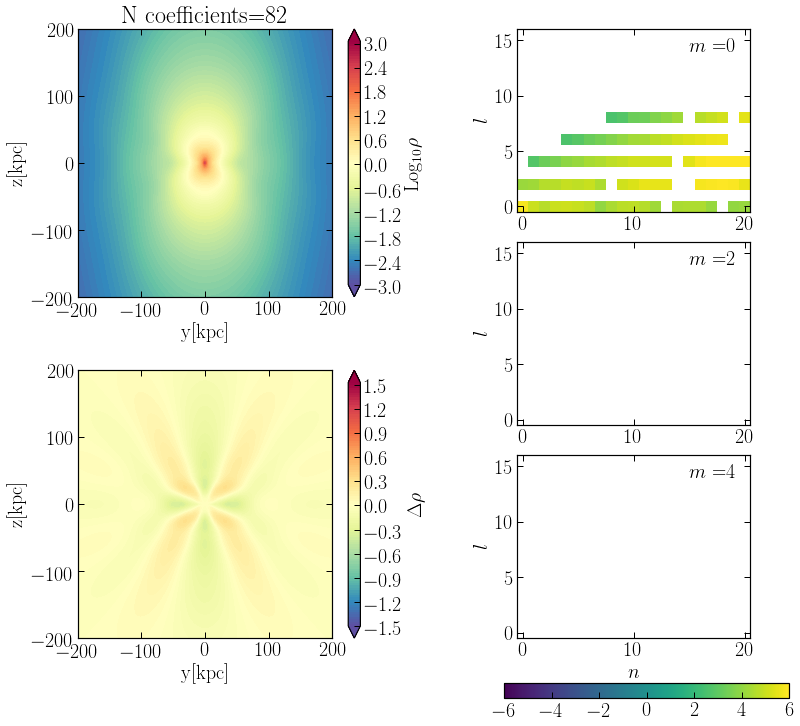

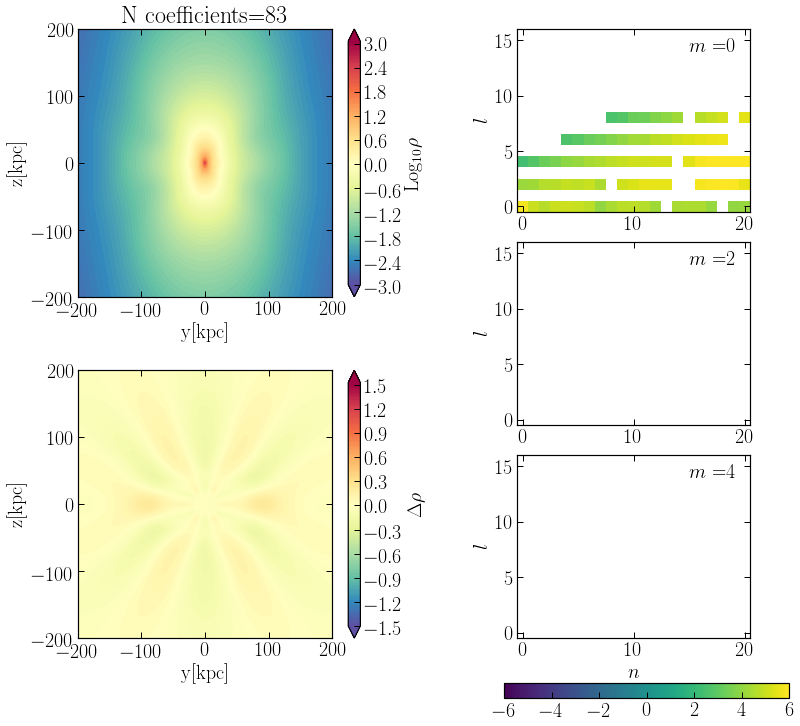

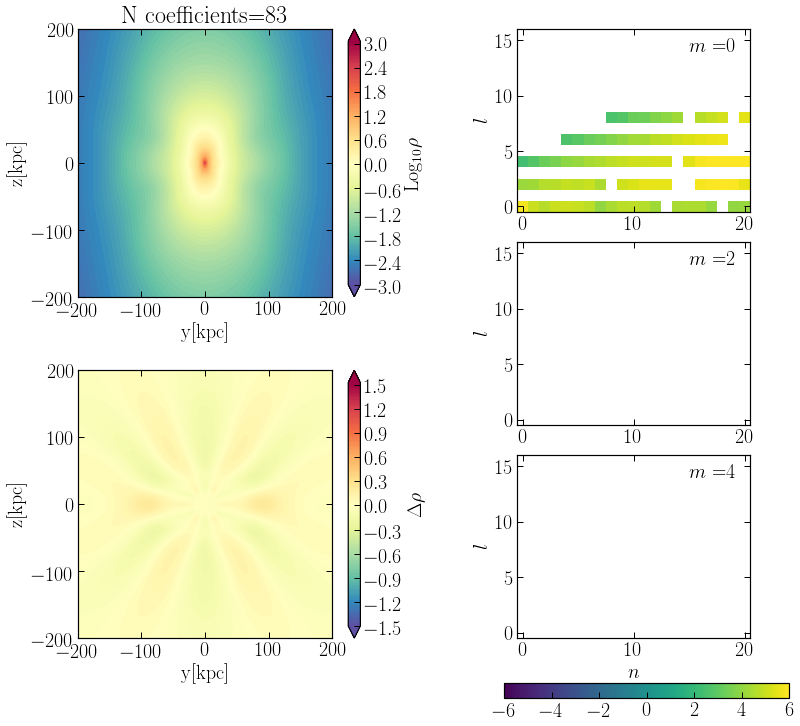

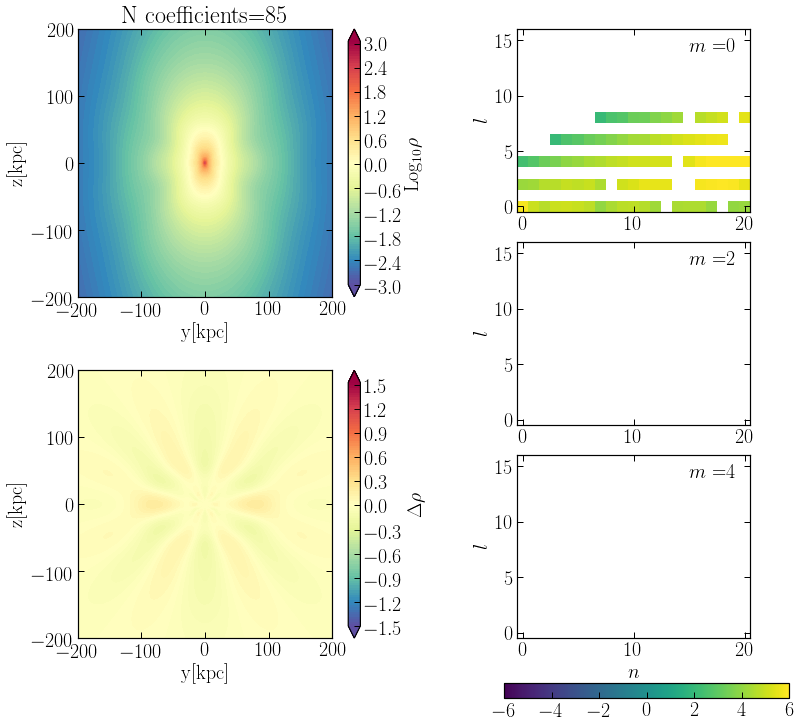

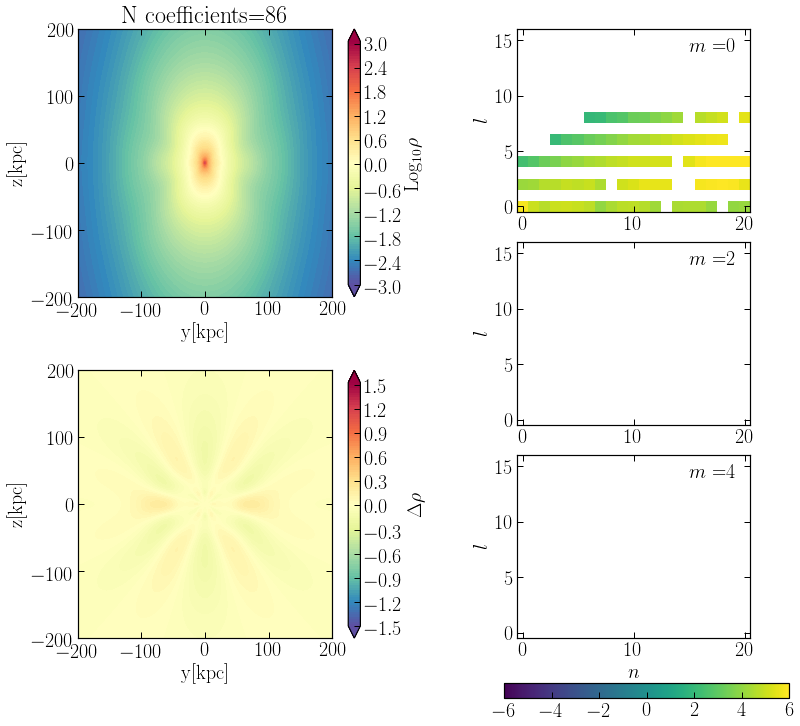

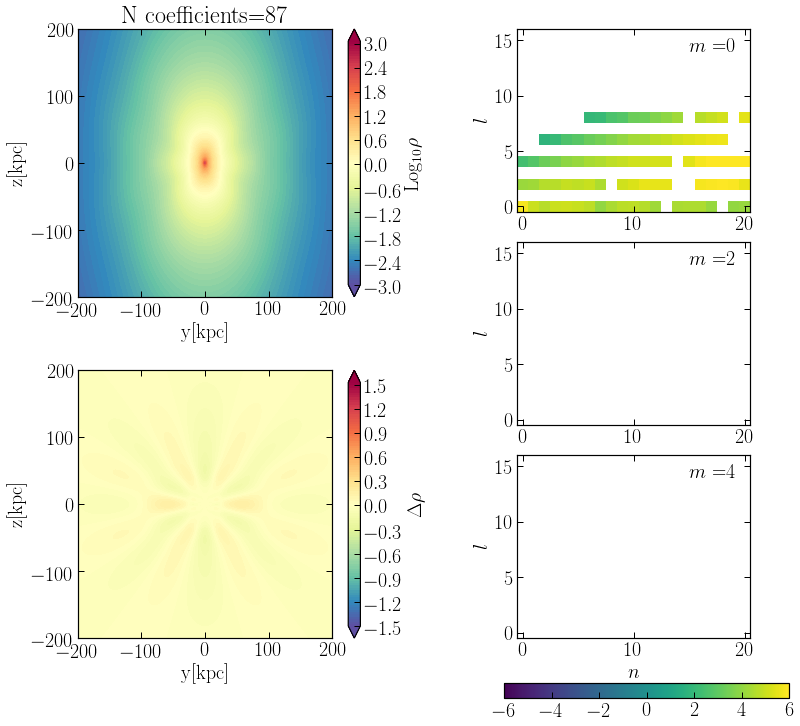

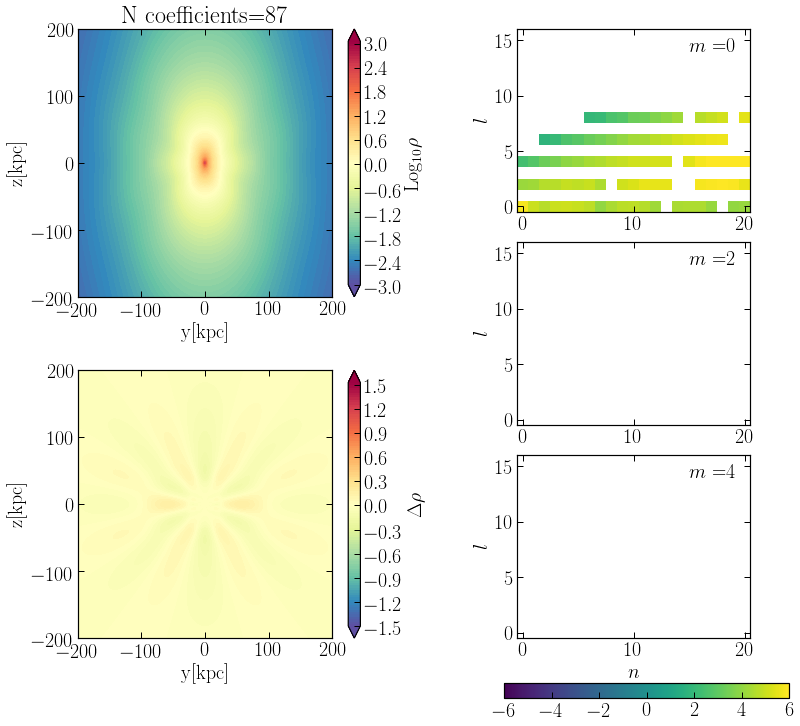

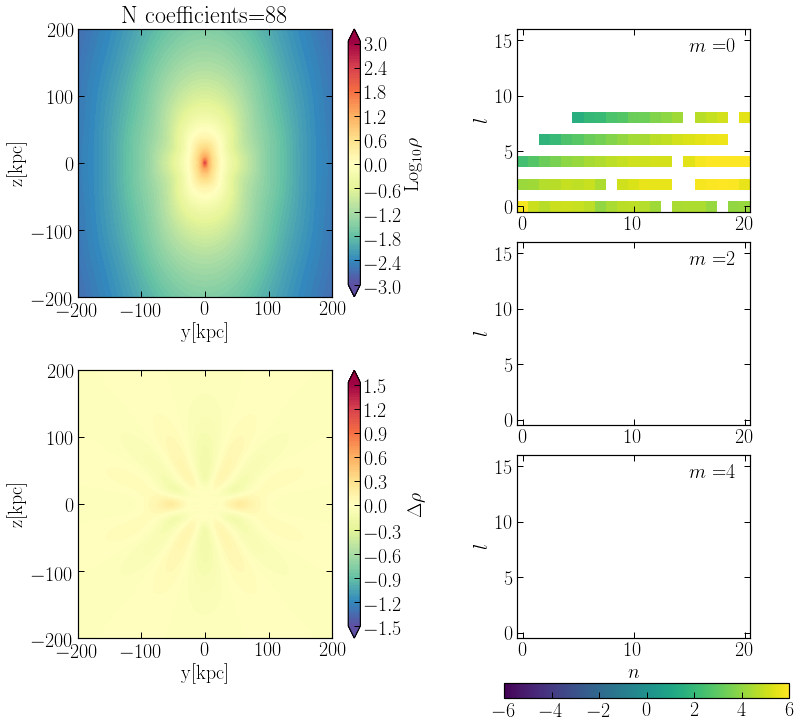

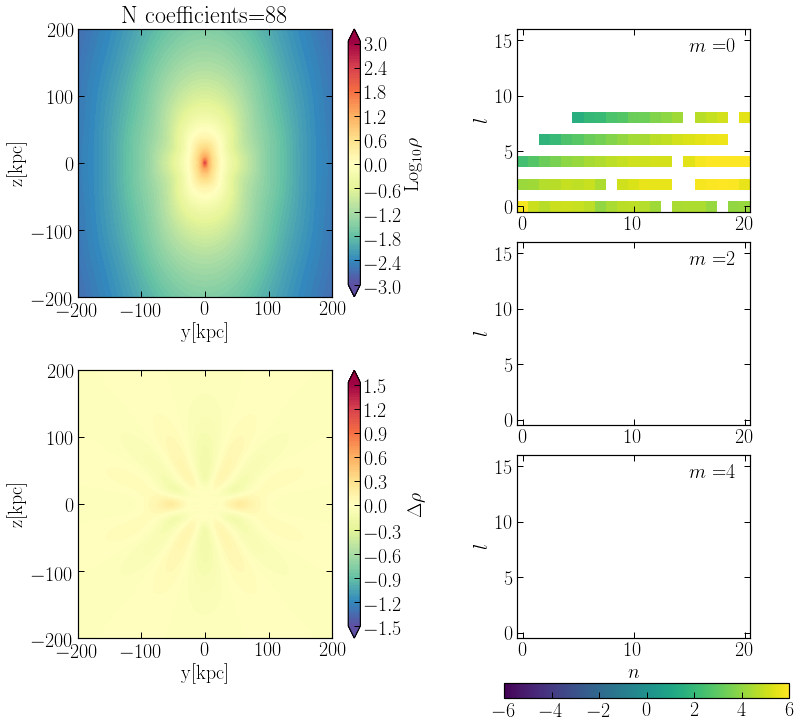

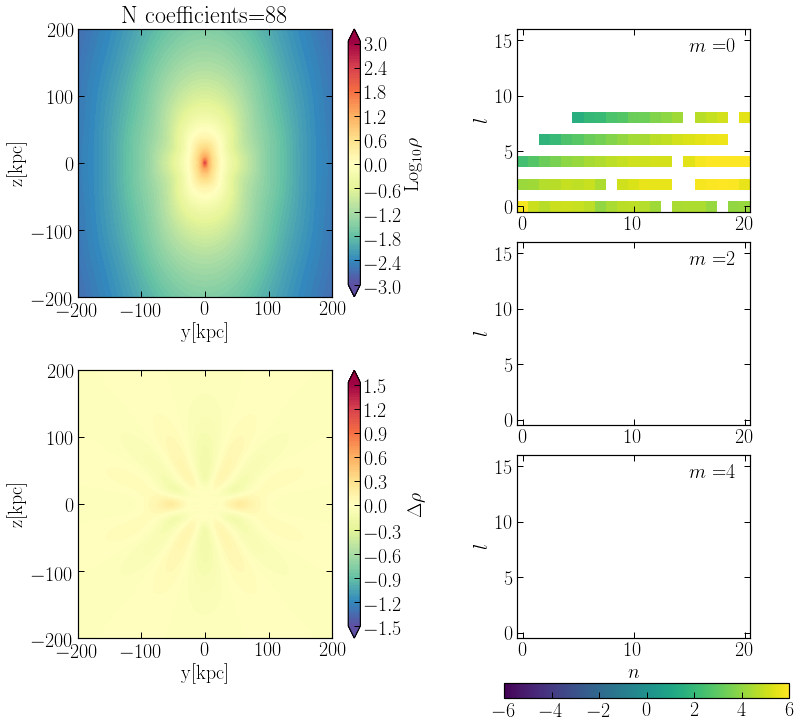

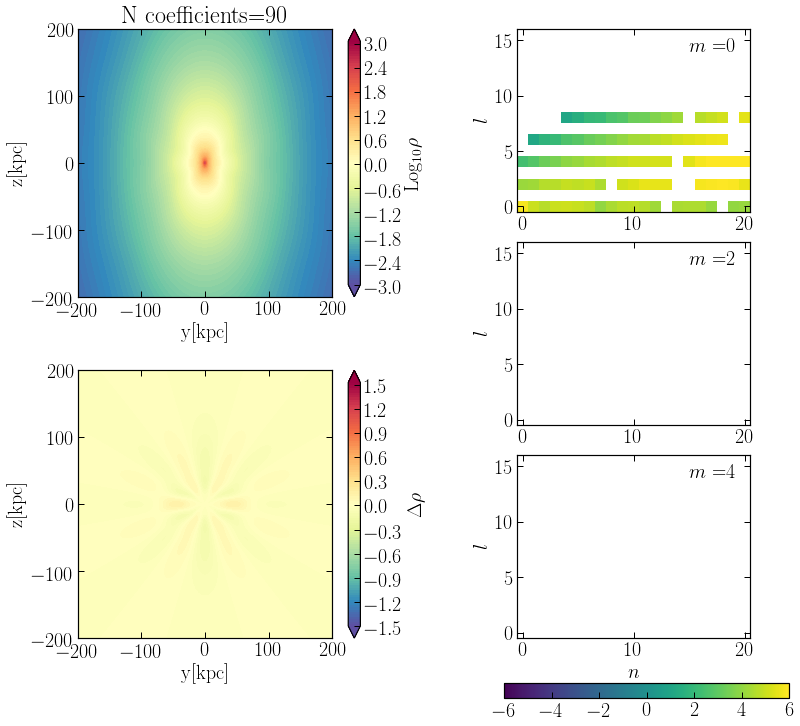

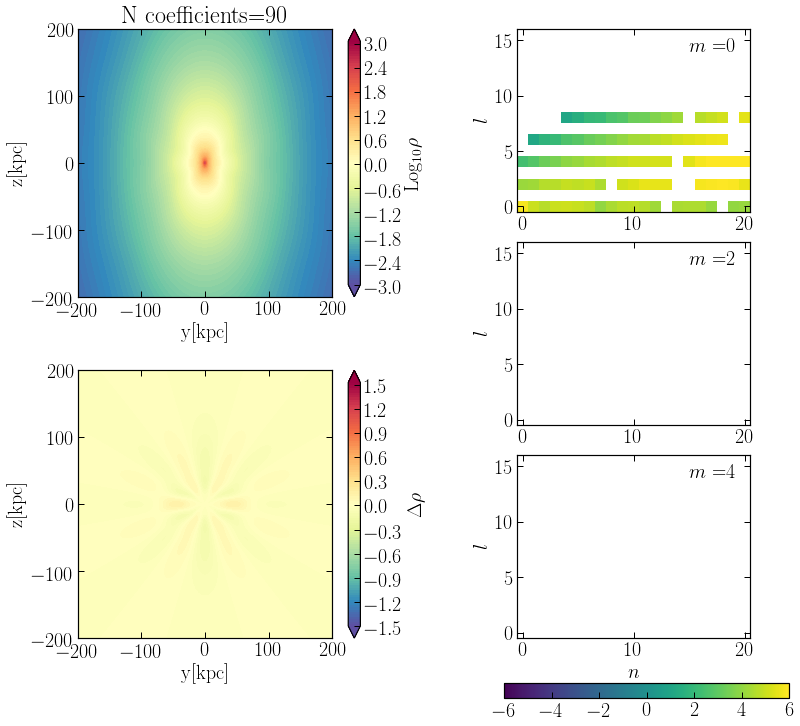

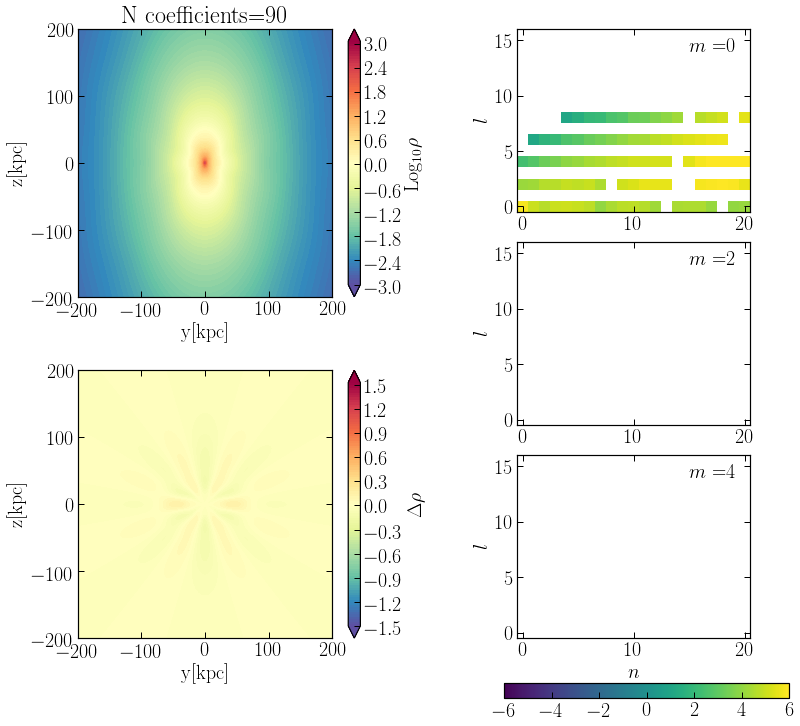

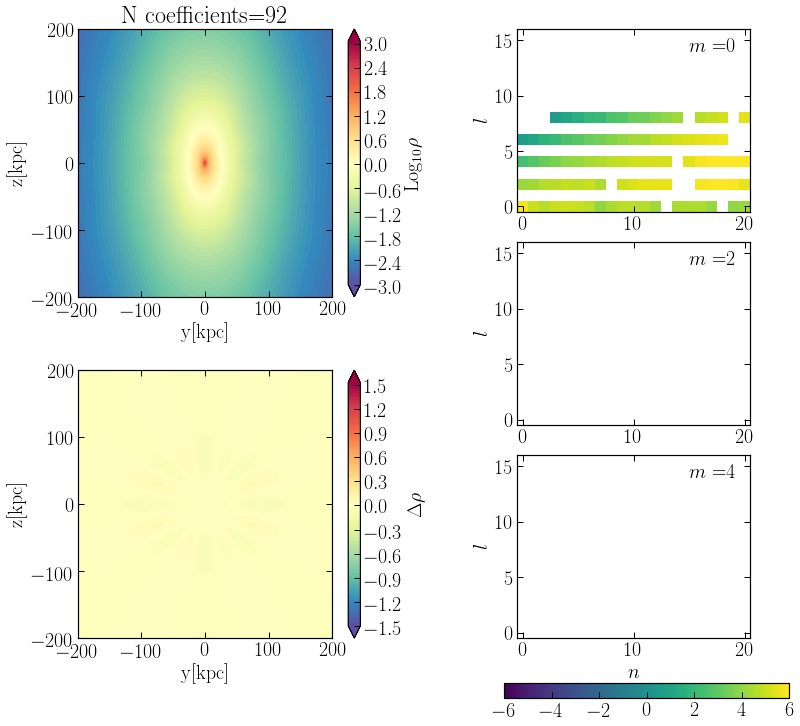

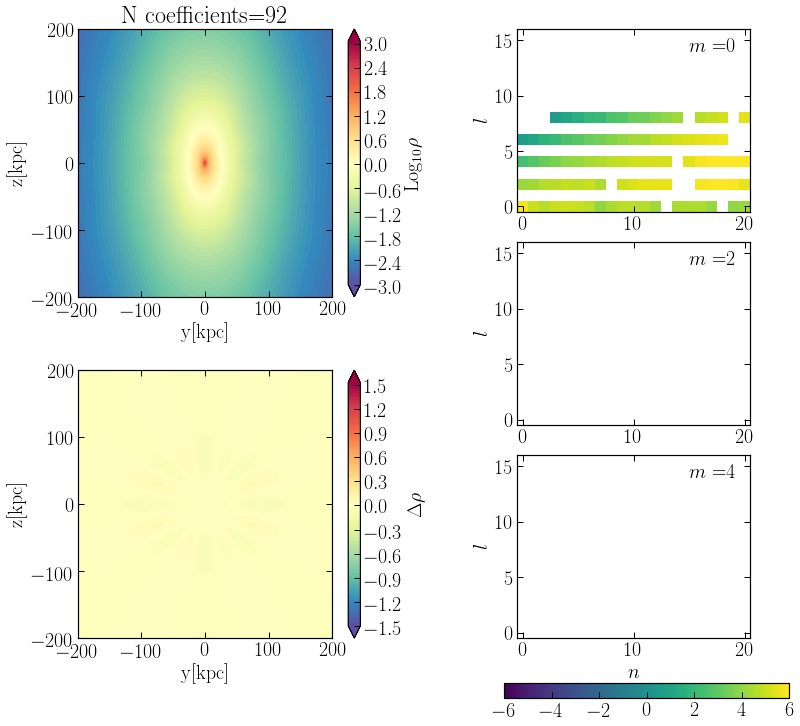

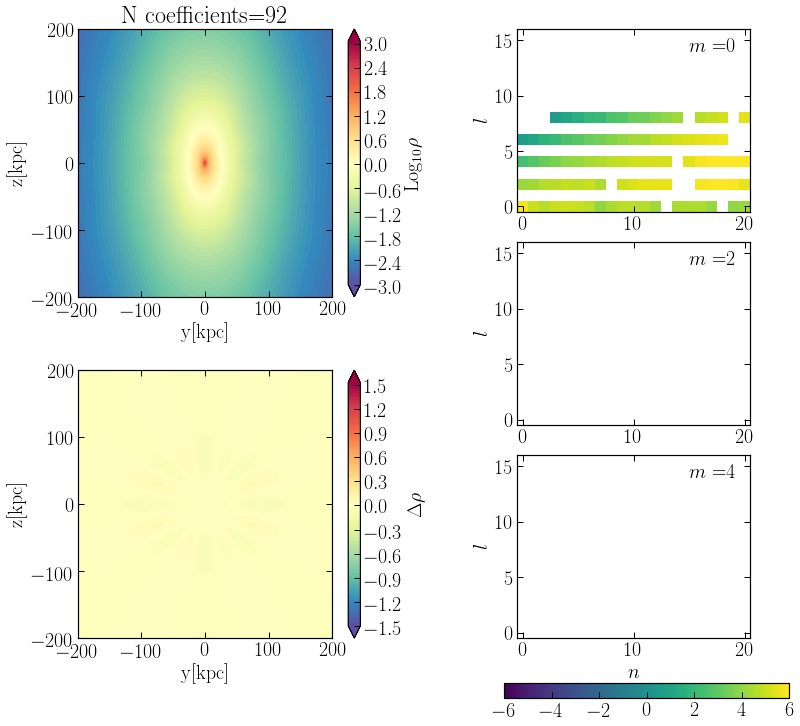

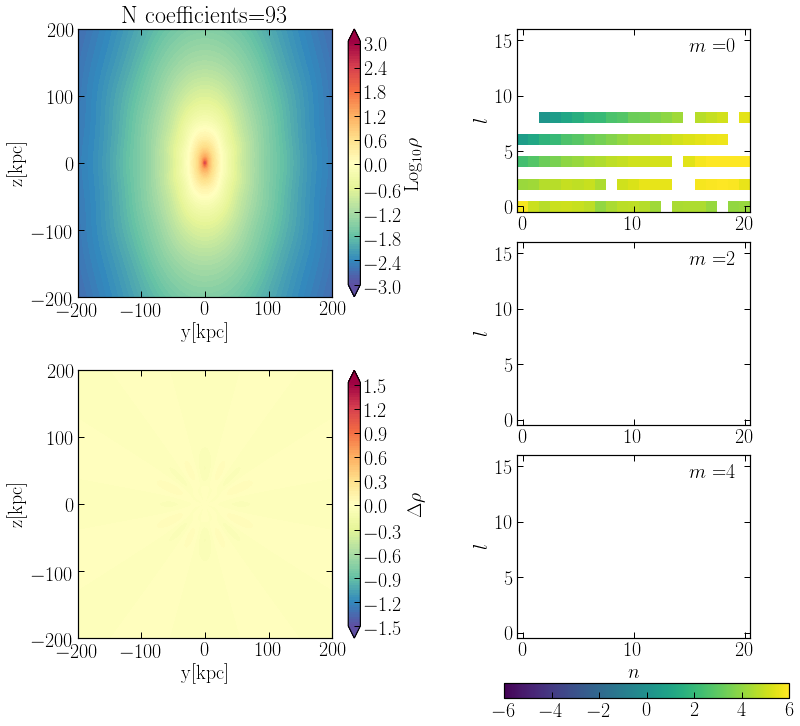

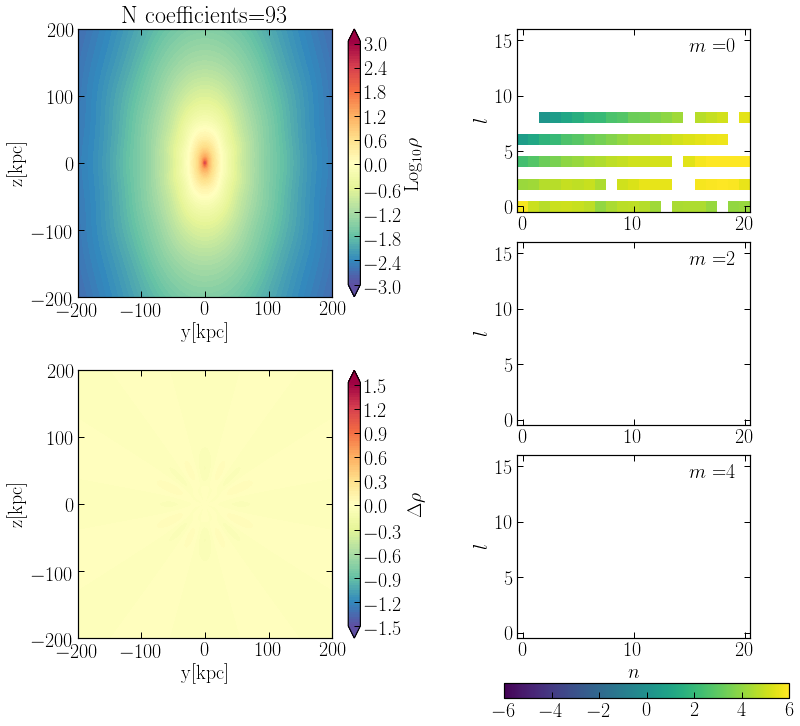

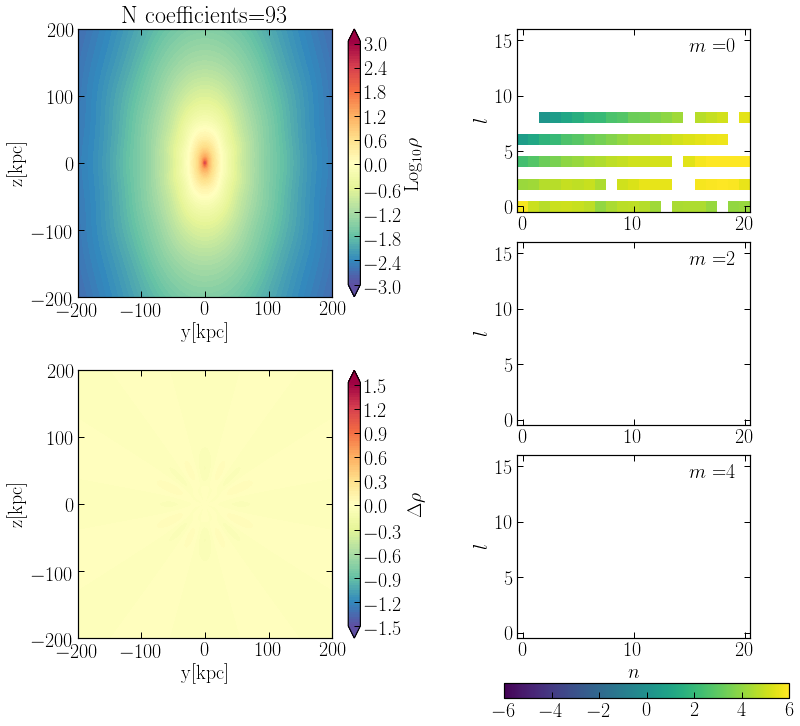

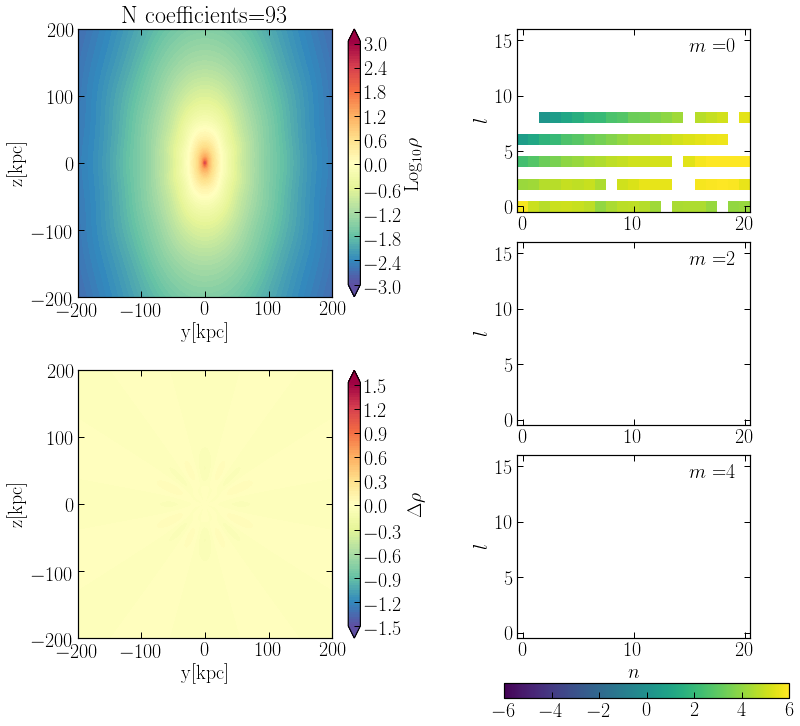

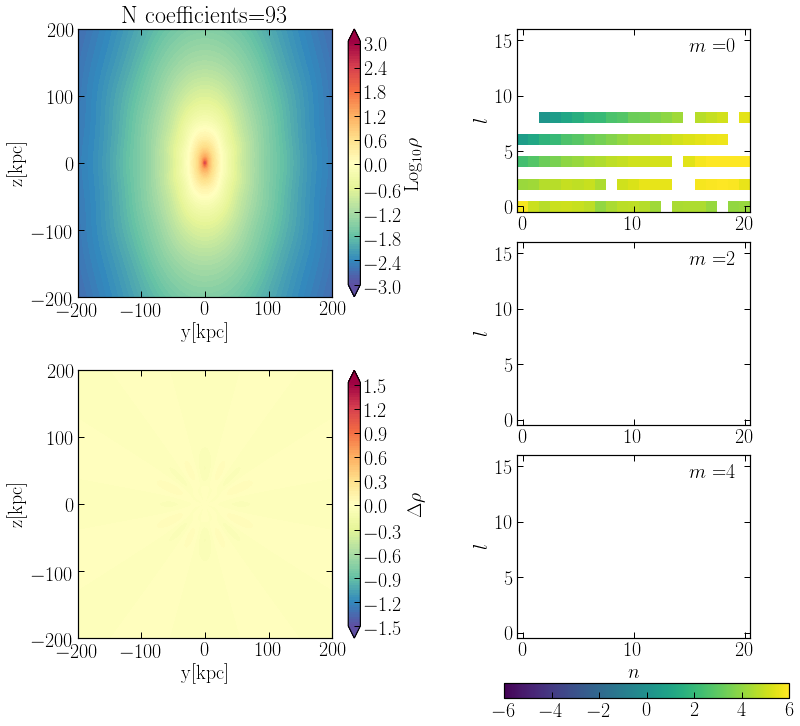

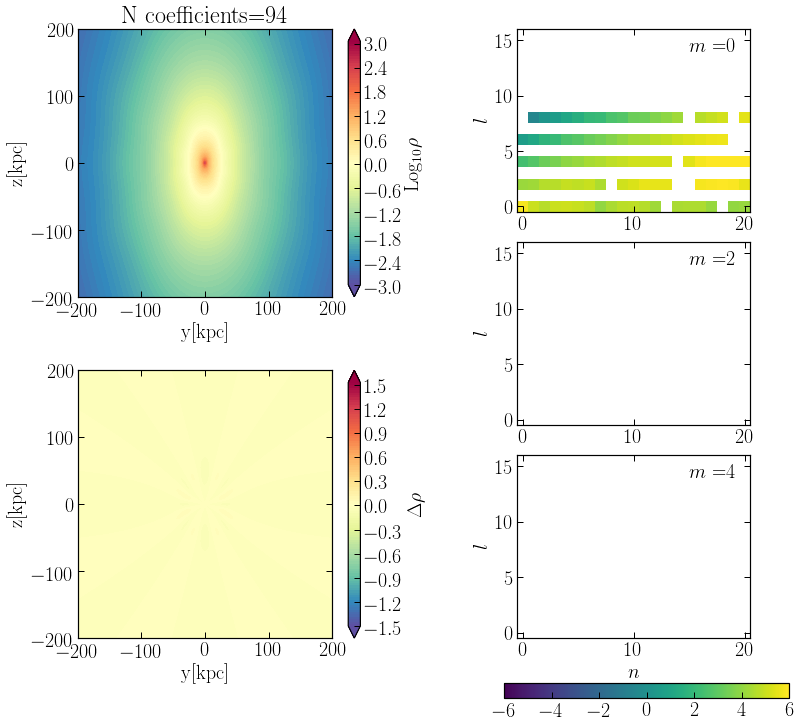

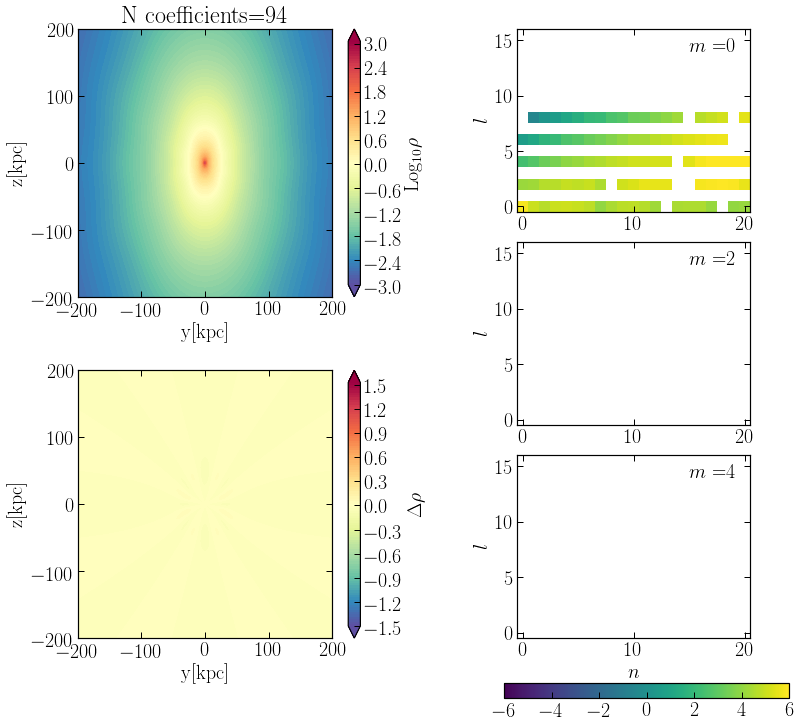

In [29]:
movie(np.abs(U_s1_all), S_s1, T_s1)



this is Energy slice  -0.8
9261
0
monopole 0.0
0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("

this is Energy slice  -0.946938775510203
9261
0
monopole 0.0
0
this is Energy slice  -1.093877551020408
9260
1
monopole 0.0
1
this is Energy slice  -1.240816326530612
9260
1
monopole 0.0
1
this is Energy slice  -1.387755102040816
9256
5
monopole 0.0
5
this is Energy slice  -1.5346938775510202
9254
7
monopole 0.0
7
this is Energy slice  -1.6816326530612242
9246
15
monopole 0.0
15
this is Energy slice  -1.8285714285714283
9241
20
monopole 1796697.7554906188
20
this is Energy slice  -1.9755102040816324
9234
27
monopole 1796697.7554906188
27
this is Energy slice  -2.1224489795918364
9223
38
monopole 1796697.7554906188
38
this is Energy slice  -2.2693877551020405
9219
42
monopole 1796697.7554906188
42
this is Energy slice  -2.4163265306122446
9206
55
monopole 1796697.7554906188
55
this is Energy slice  -2.5632653061224486
9197
64
monopole 1796697.7554906188
64
this is Energy slice  -2.7102040816326527
9189
72
monopole 1796697.7554906188
72
this is Energy slice  -2.8571428571428568
9176
85
m

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


this is Energy slice  -3.8857142857142852
9131
130
monopole 1796697.7554906188
130
this is Energy slice  -4.032653061224489
9126
135
monopole 1796697.7554906188
135
this is Energy slice  -4.179591836734693
9122
139
monopole 1796697.7554906188
139
this is Energy slice  -4.326530612244897
9118
143
monopole 1796697.7554906188
143
this is Energy slice  -4.4734693877551015
9115
146
monopole 1796697.7554906188
146
this is Energy slice  -4.6204081632653065
9113
148
monopole 1796697.7554906188
148
this is Energy slice  -4.7673469387755105
9109
152
monopole 1796697.7554906188
152
this is Energy slice  -4.914285714285715
9107
154
monopole 1796697.7554906188
154
this is Energy slice  -5.061224489795919
9103
158
monopole 1796697.7554906188
158
this is Energy slice  -5.208163265306123
9102
159
monopole 1796697.7554906188
159
this is Energy slice  -5.355102040816327
9099
162
monopole 1796697.7554906188
162
this is Energy slice  -5.502040816326531
9097
164
monopole 1796697.7554906188
164
this is Ener

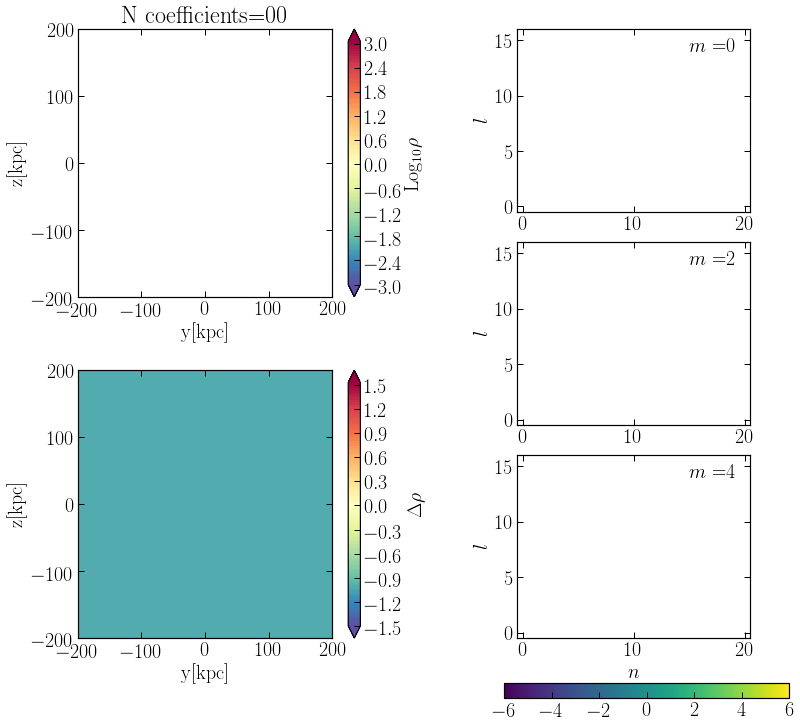

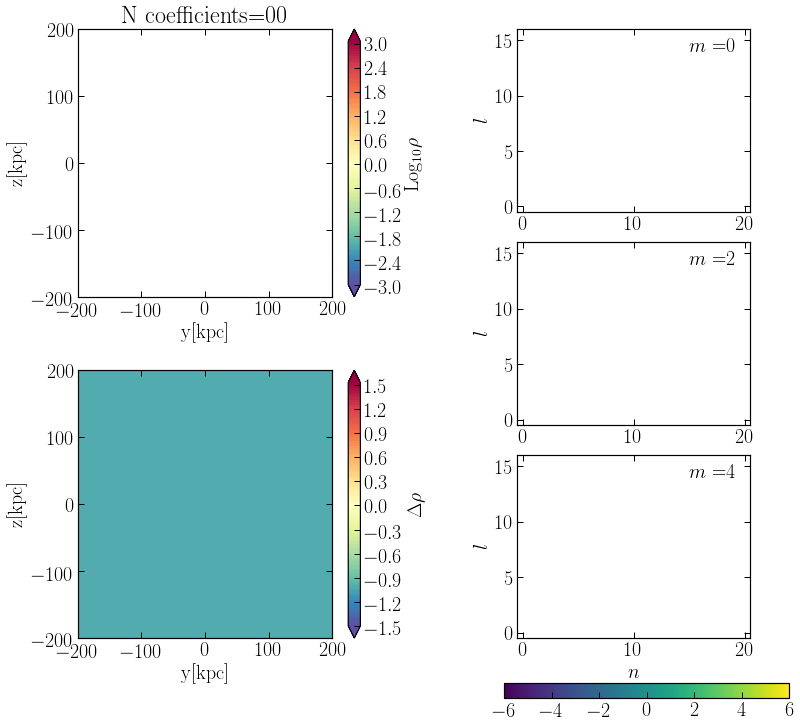

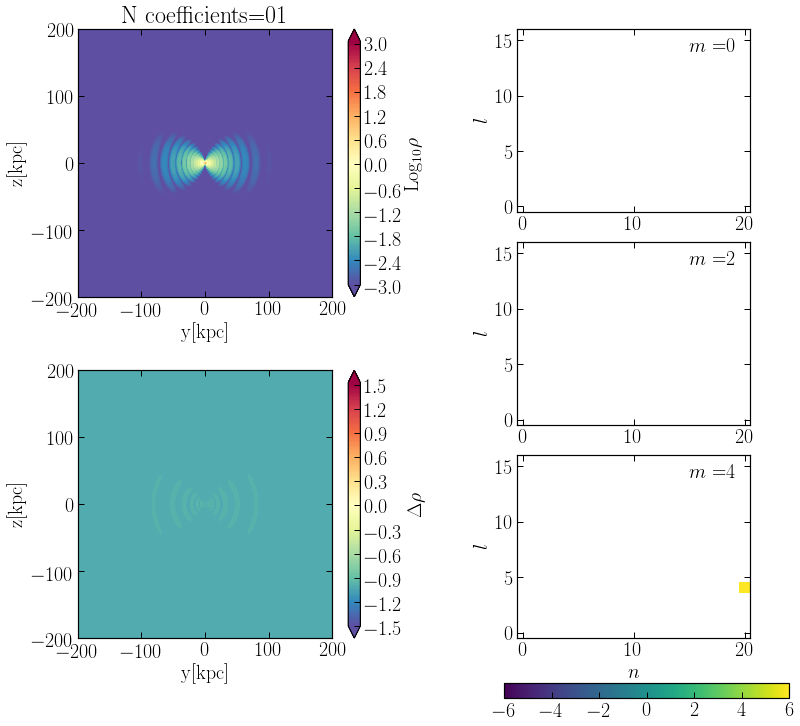

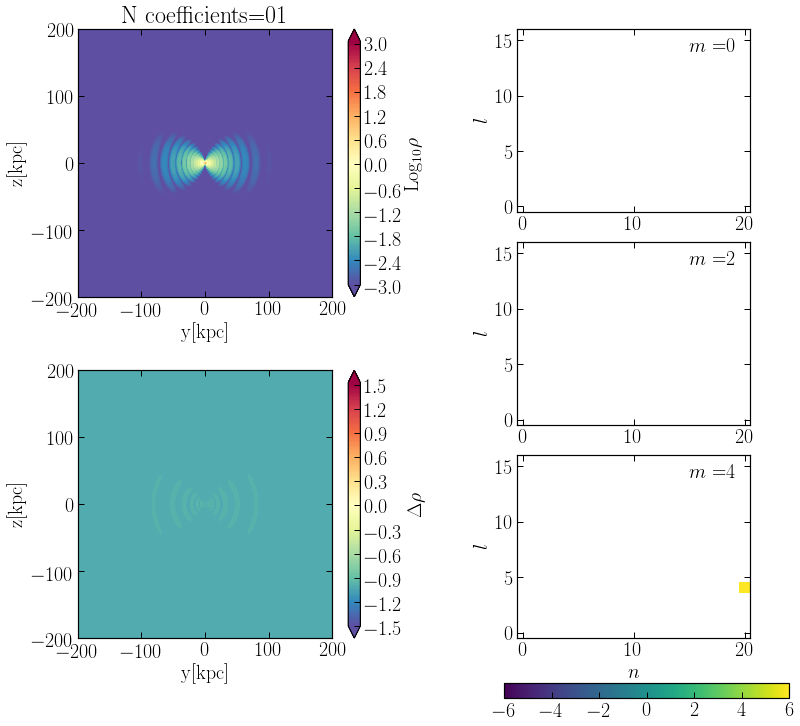

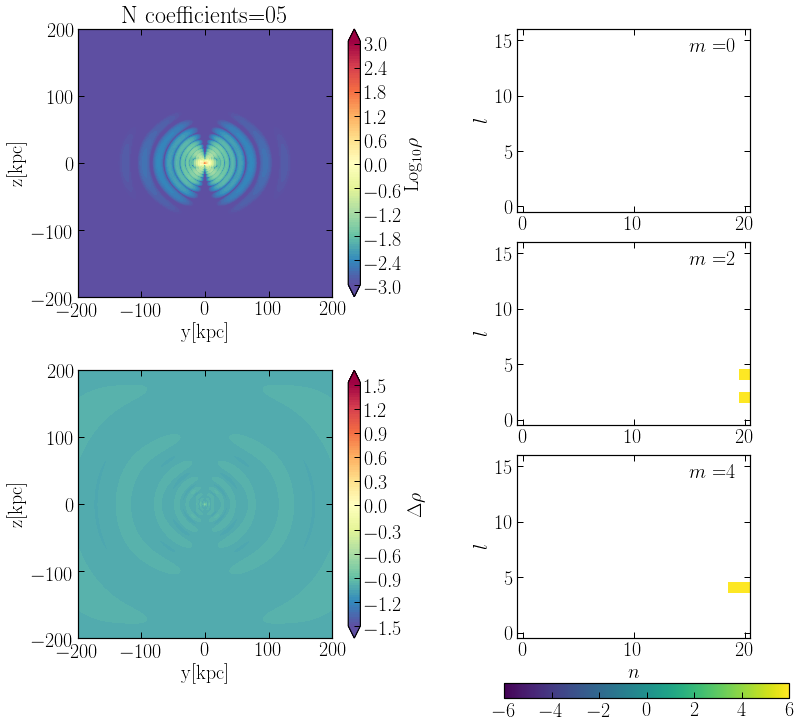

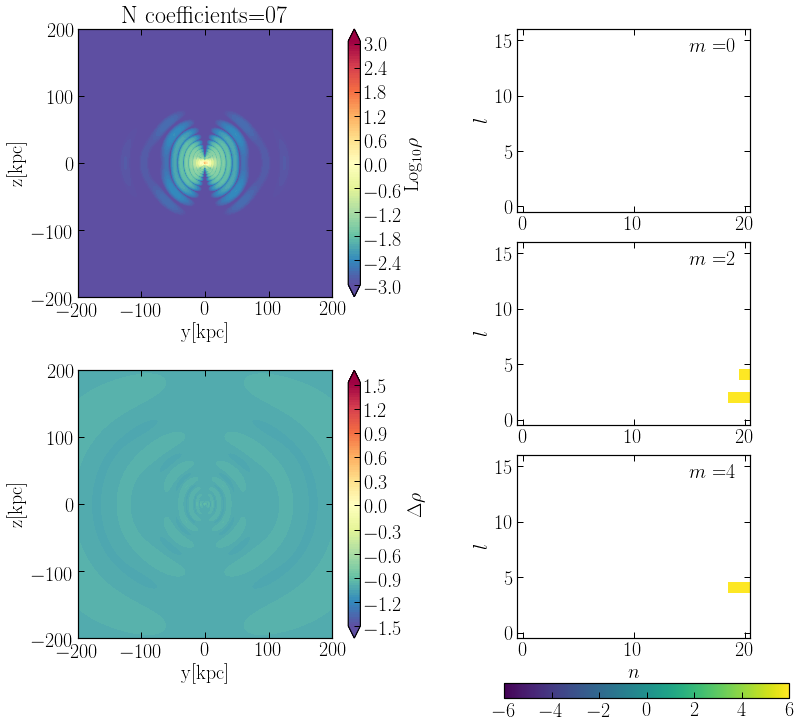

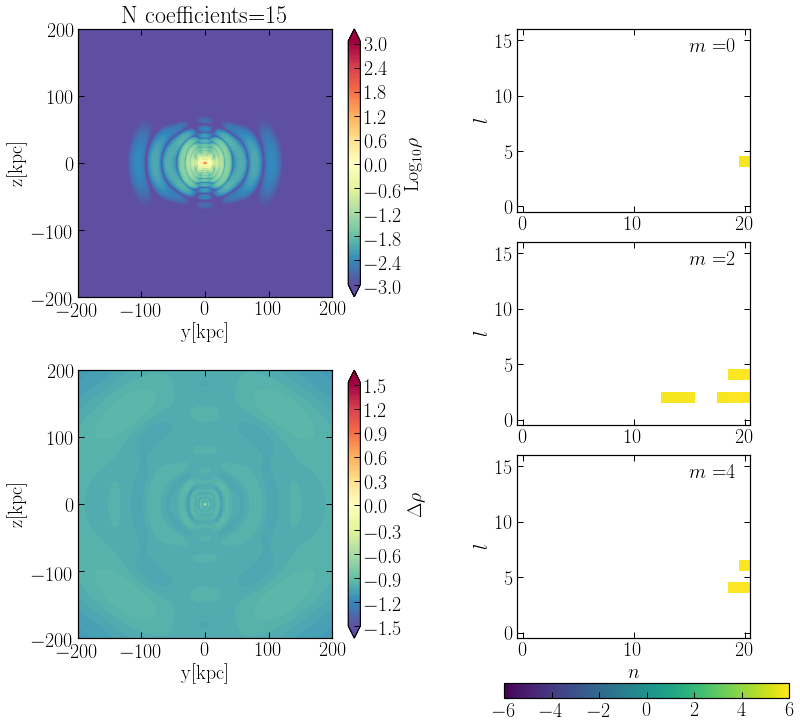

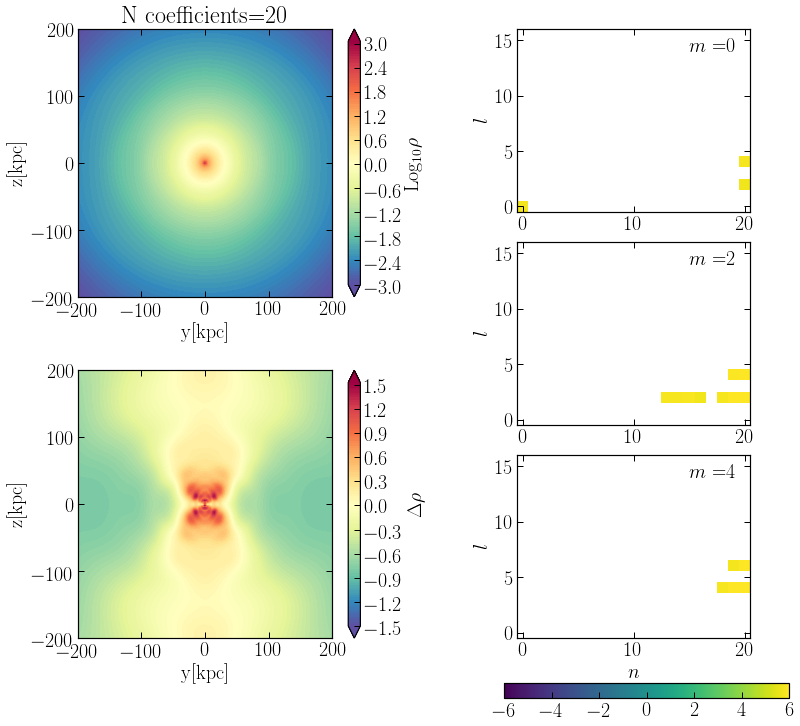

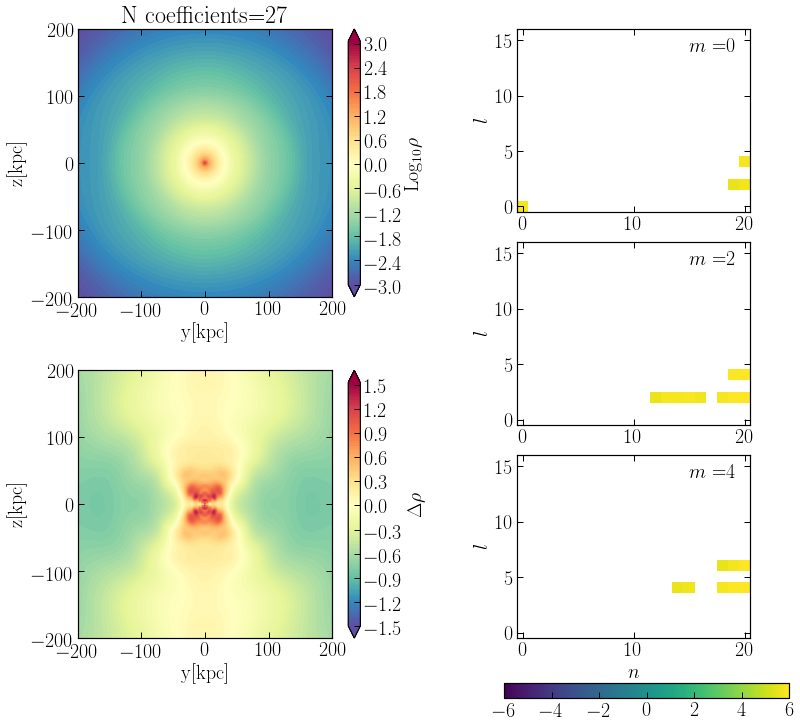

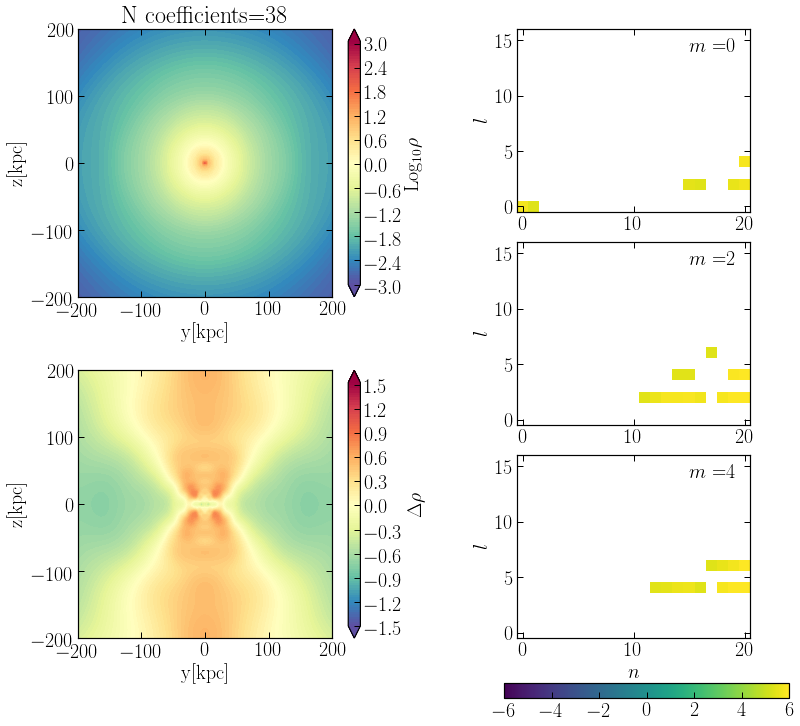

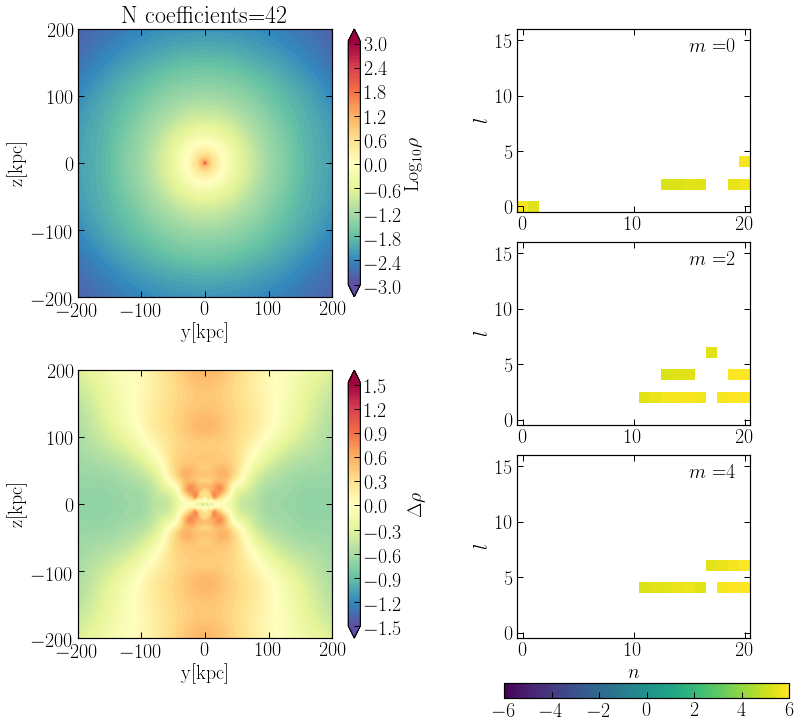

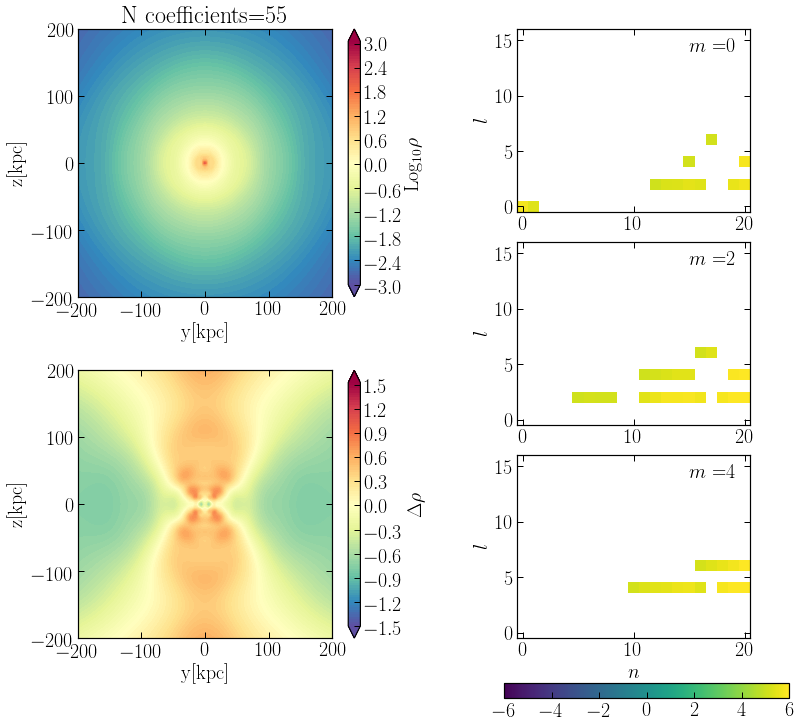

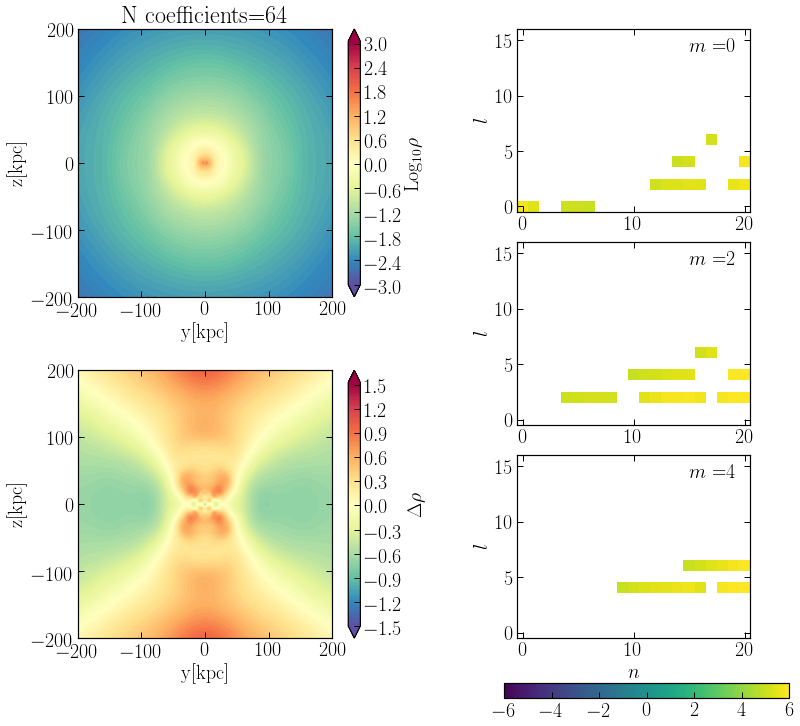

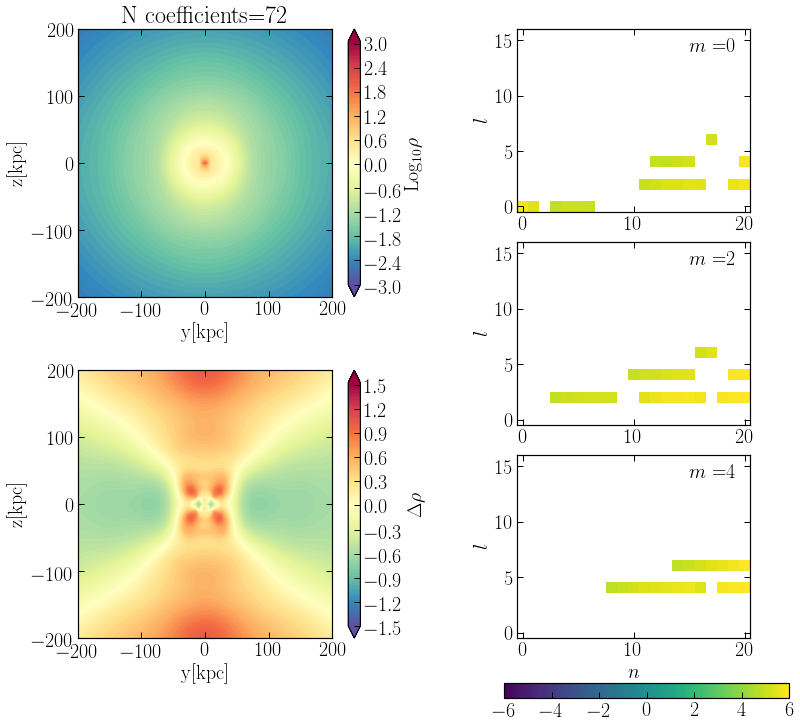

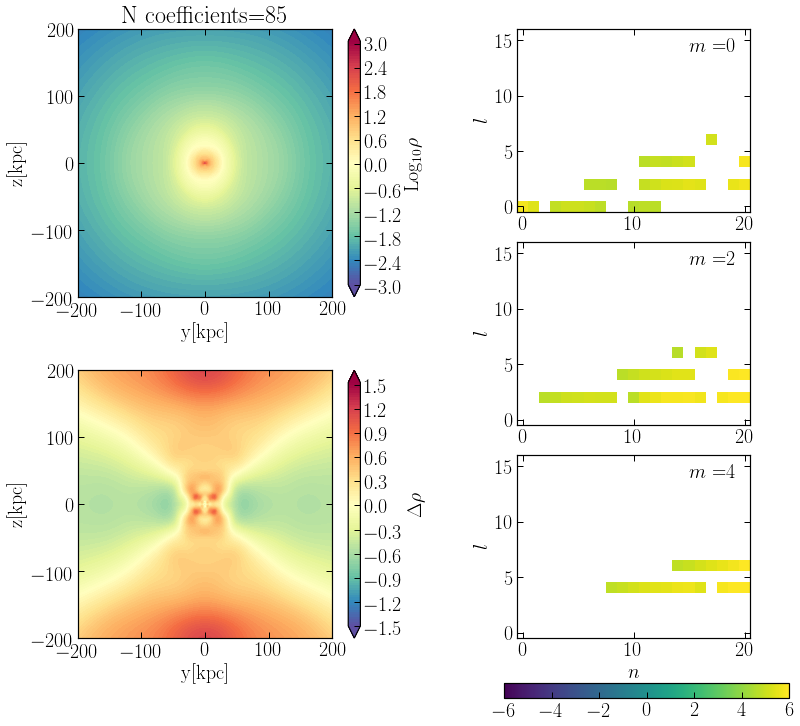

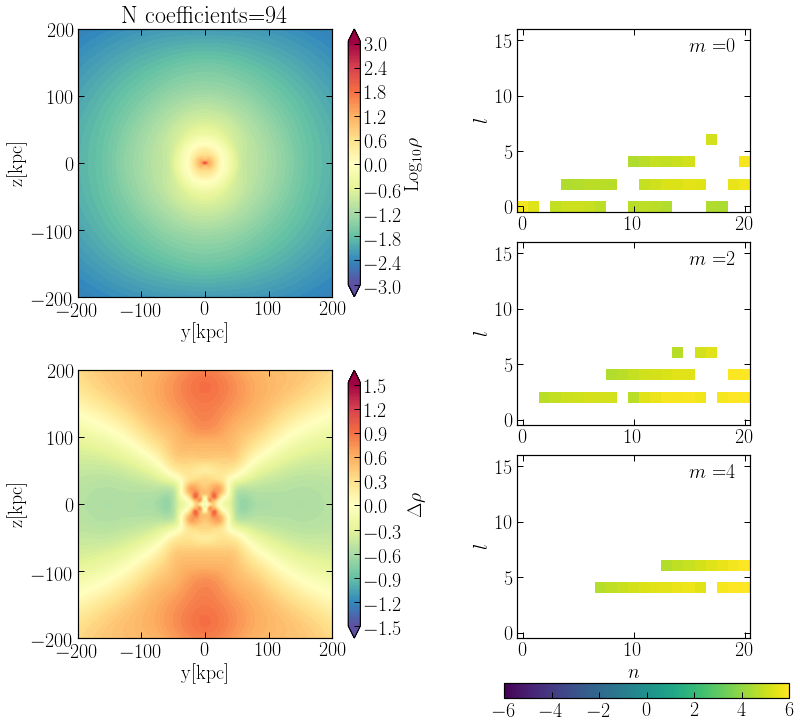

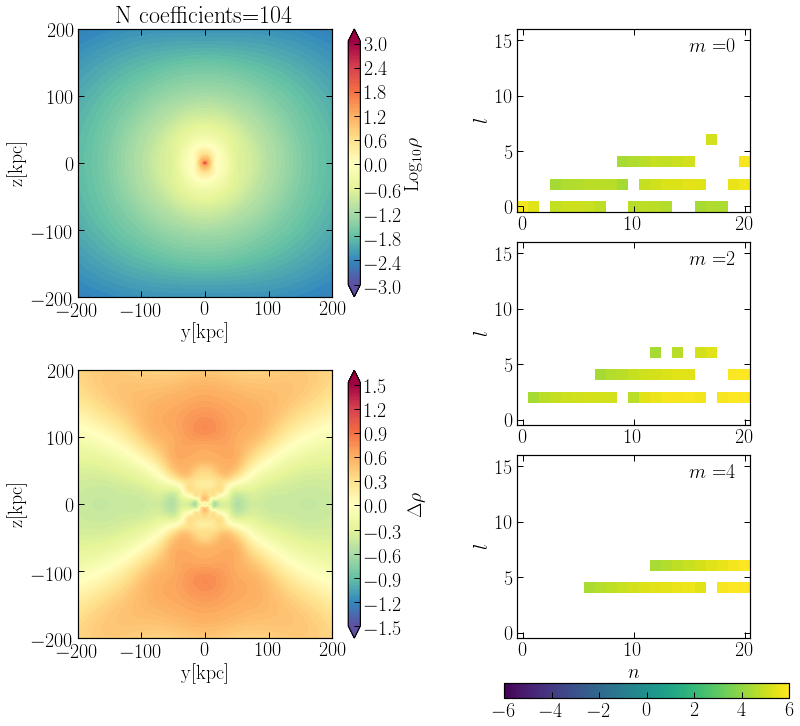

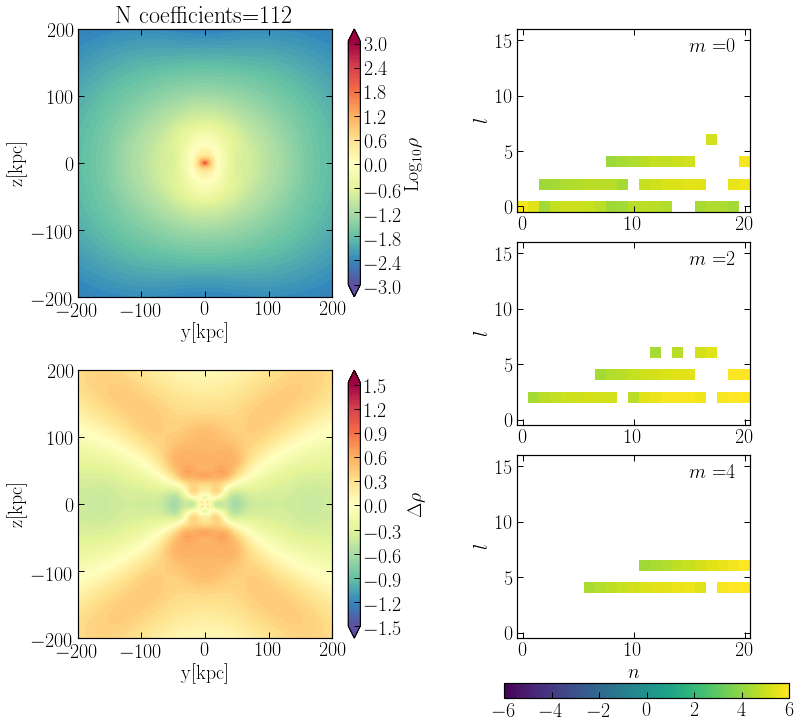

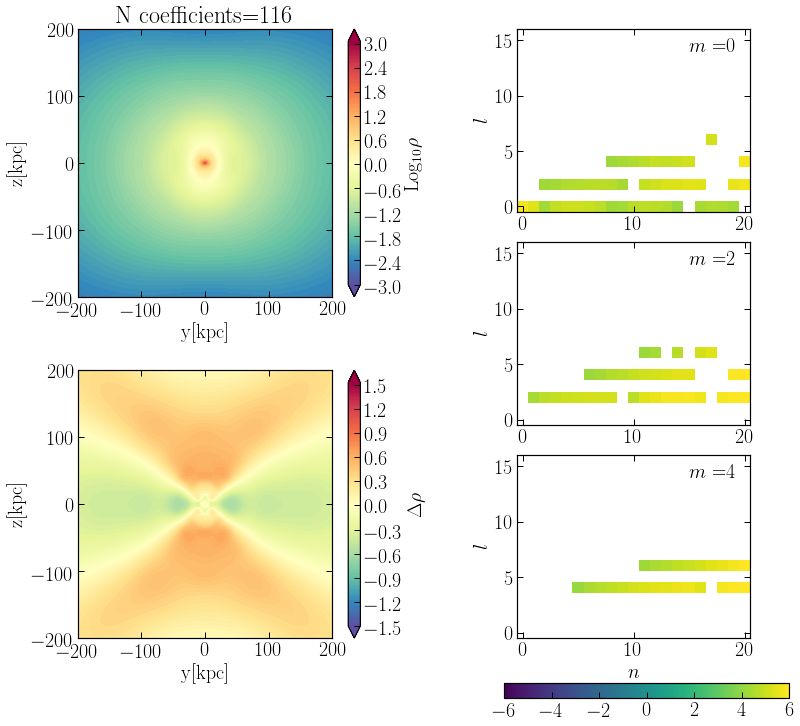

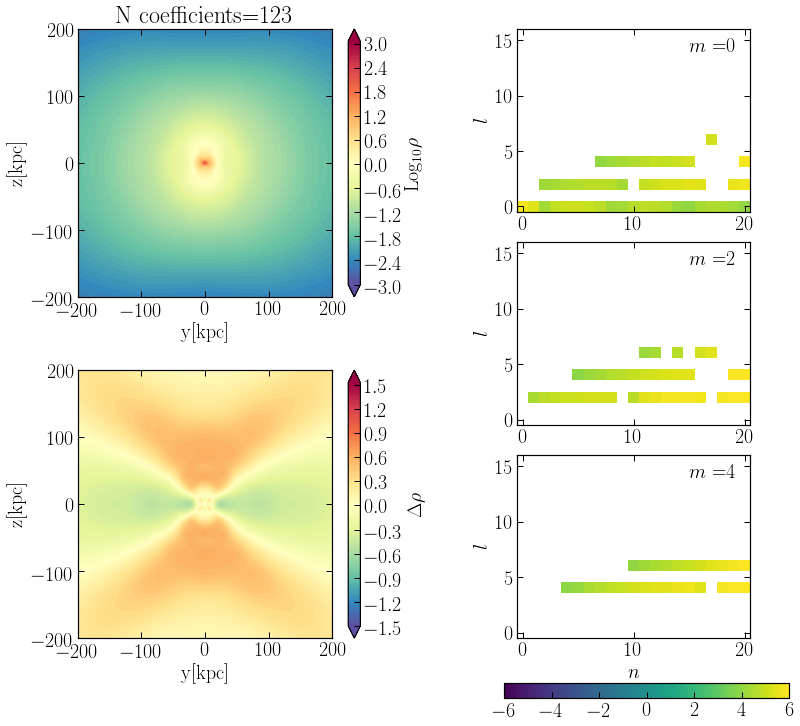

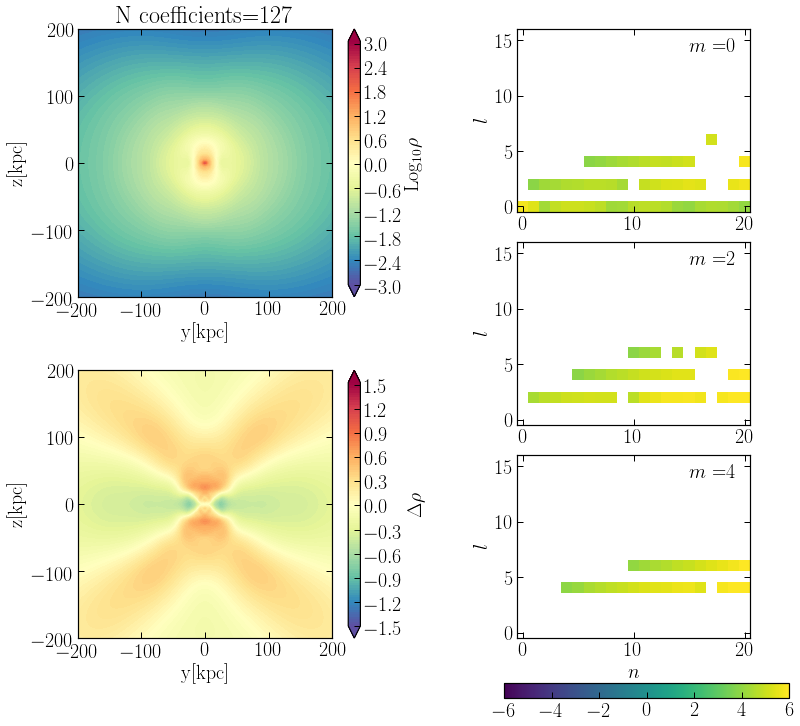

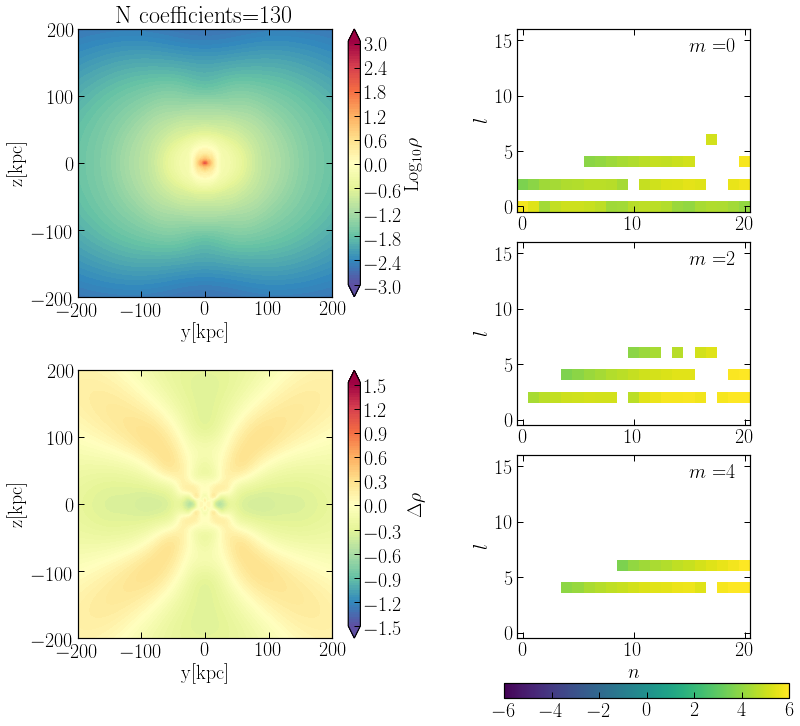

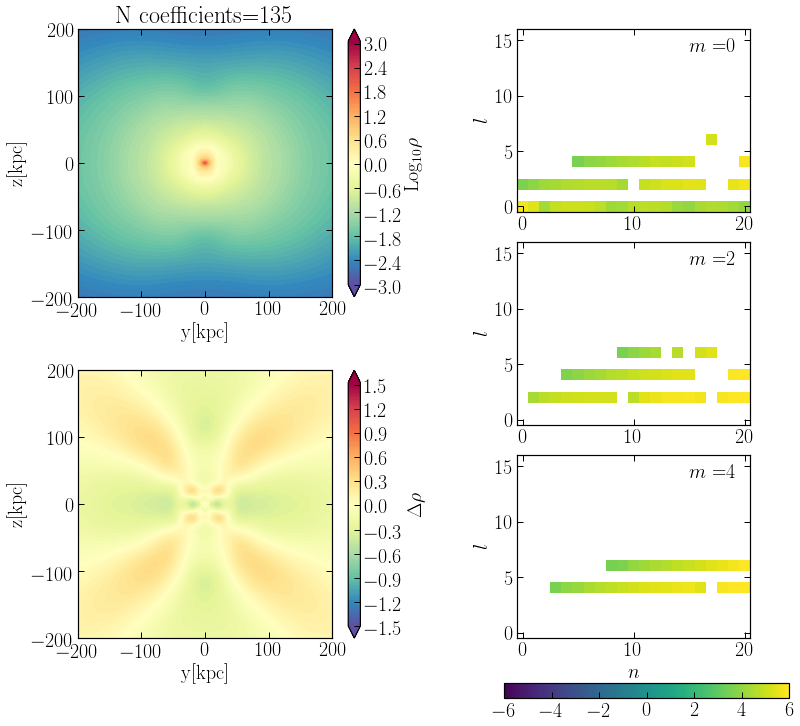

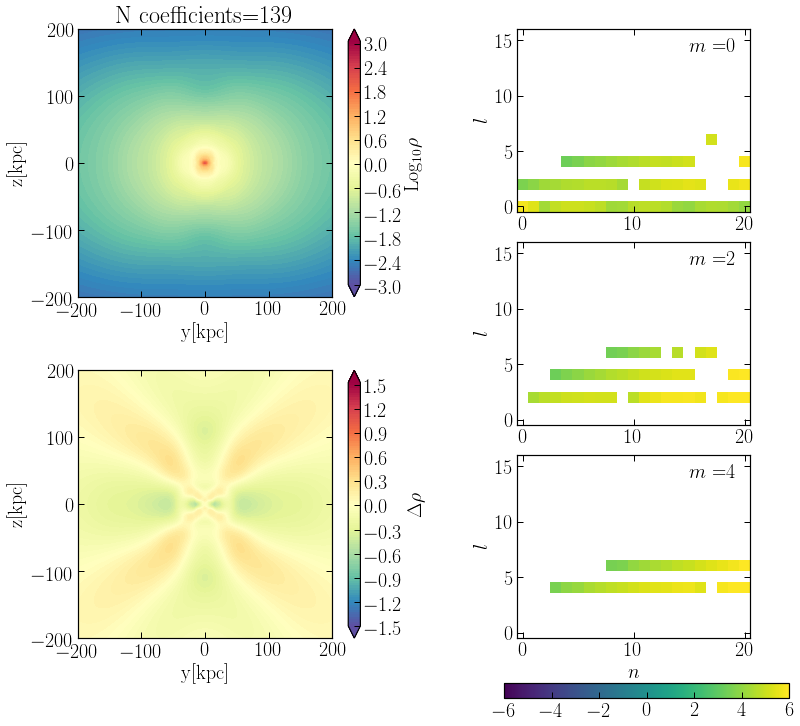

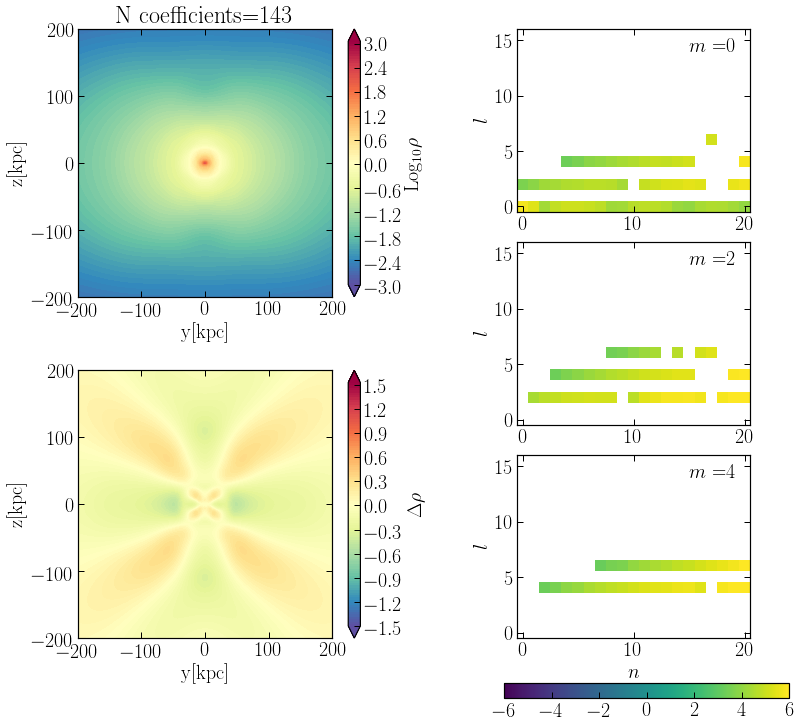

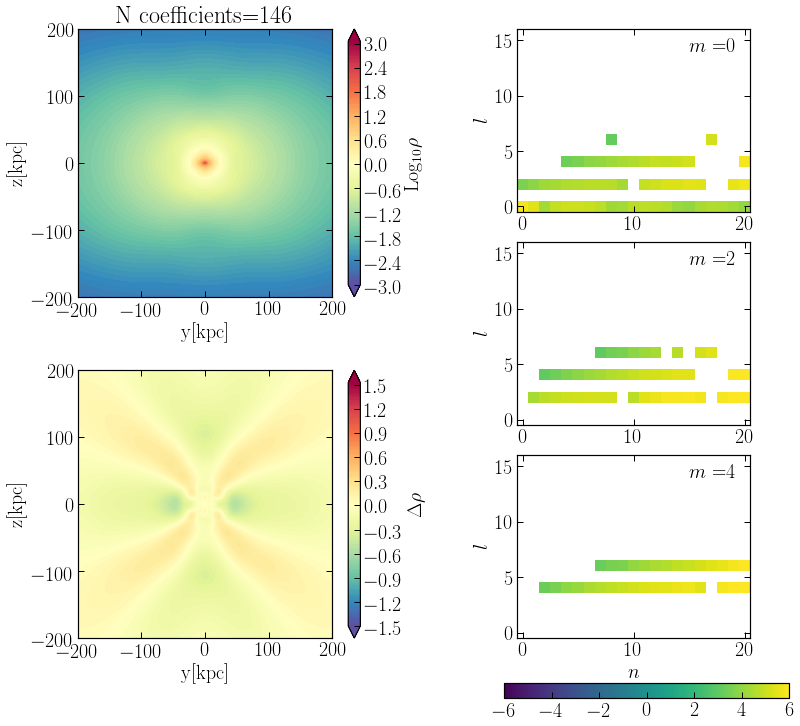

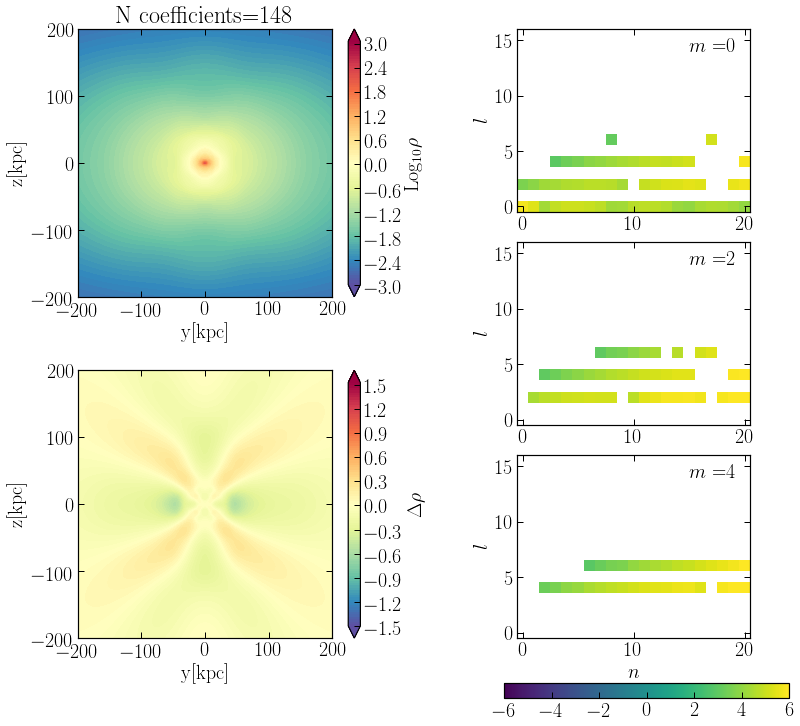

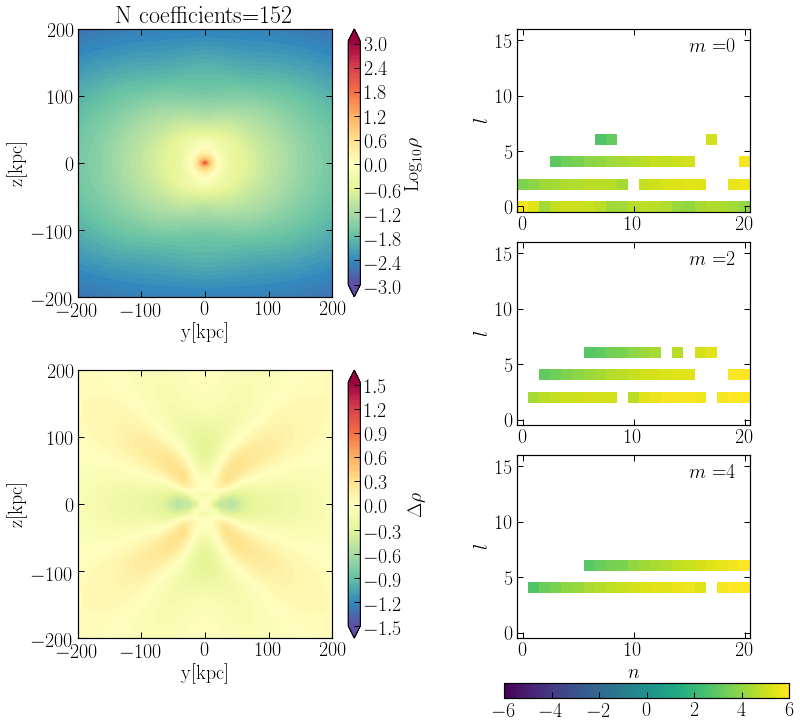

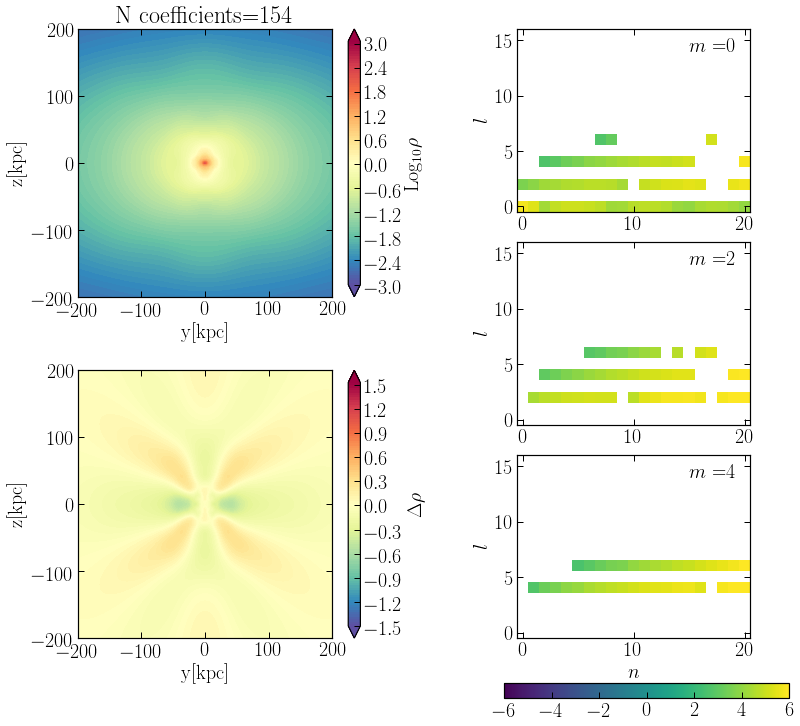

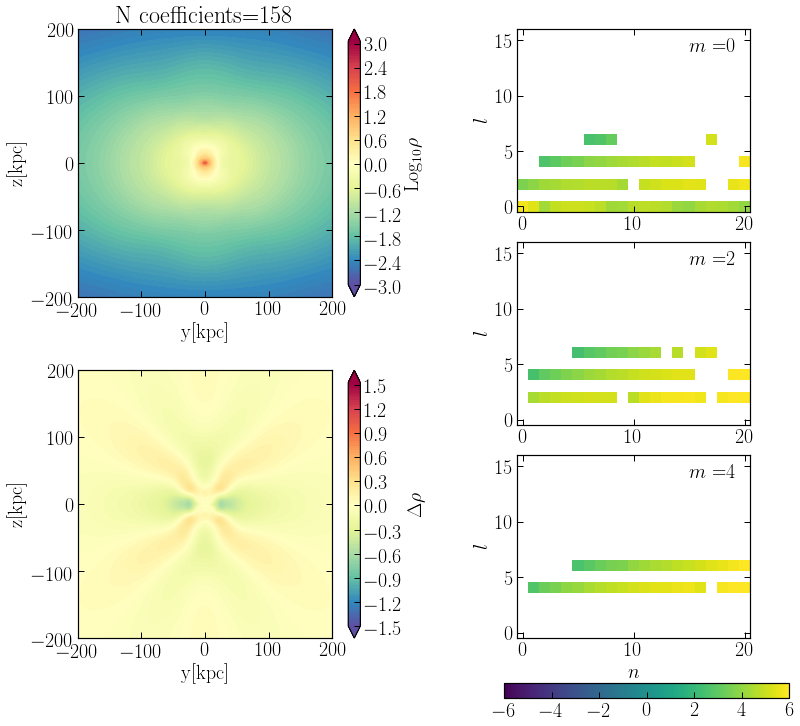

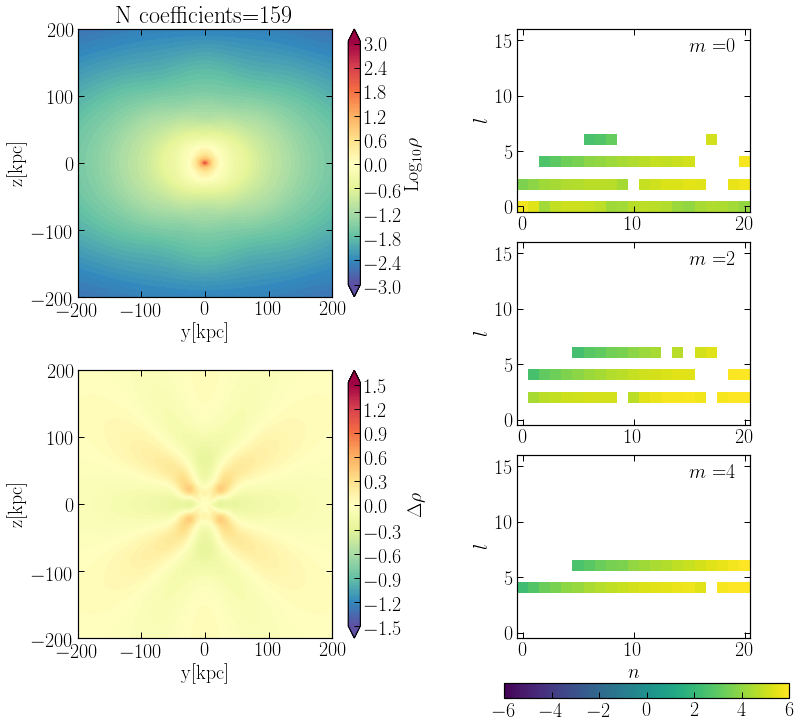

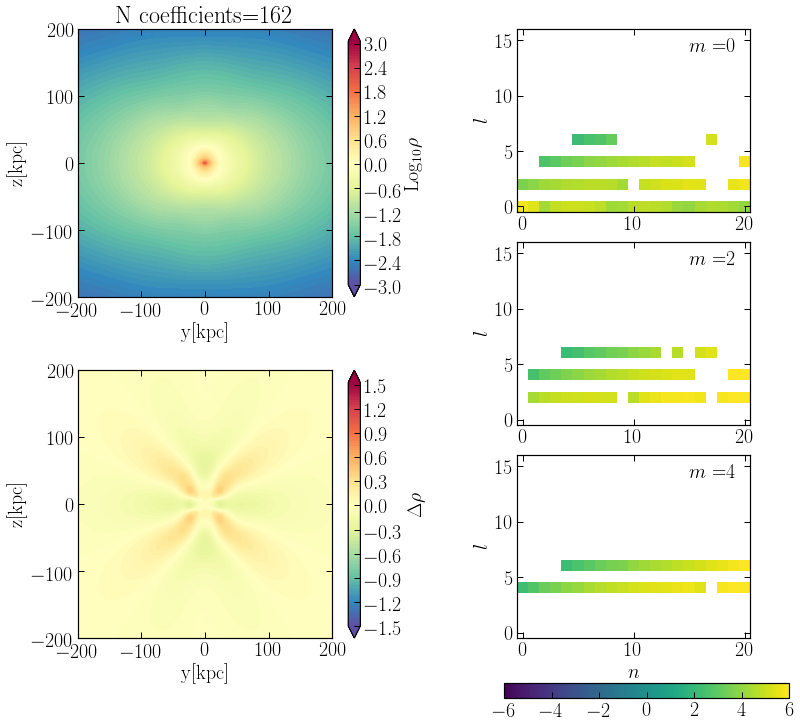

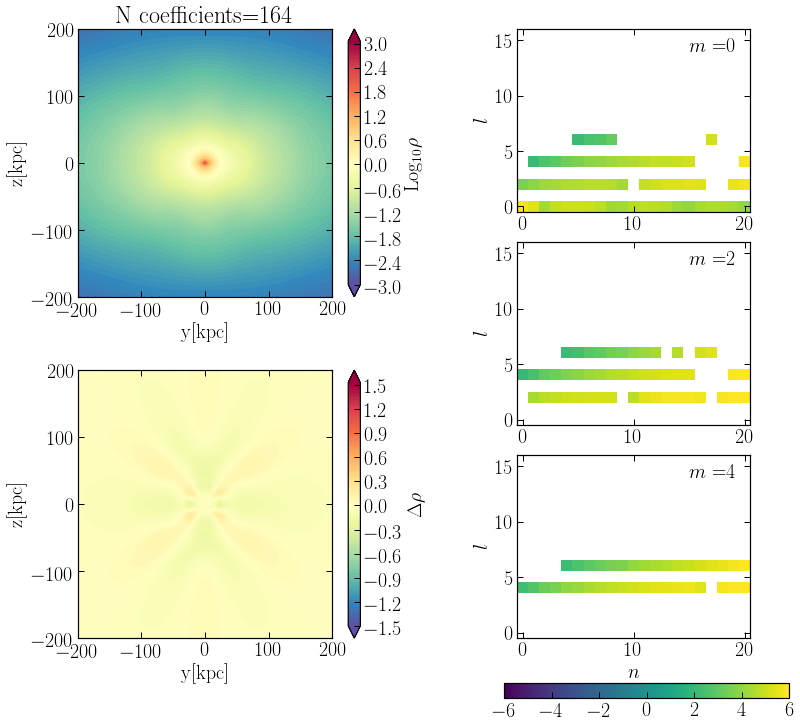

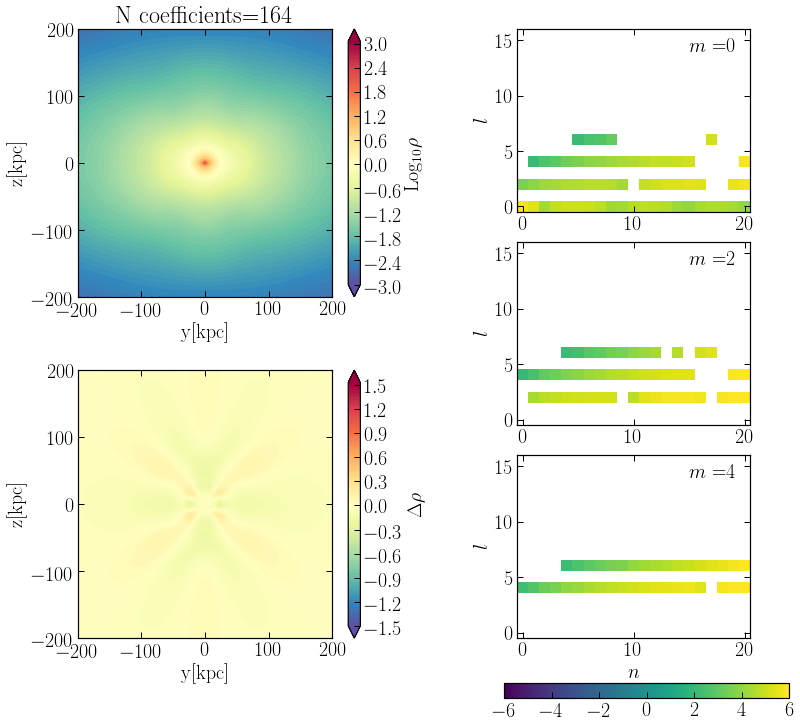

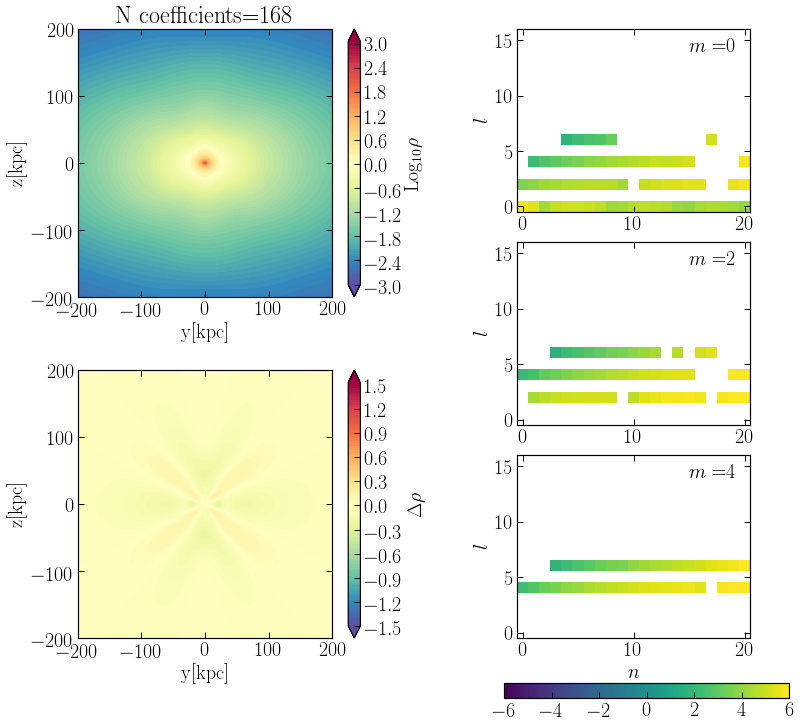

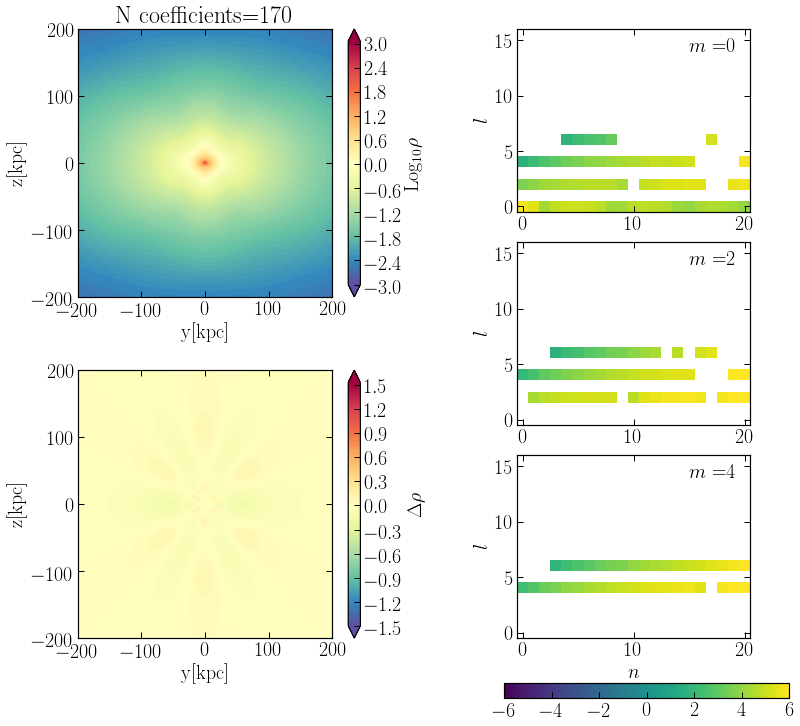

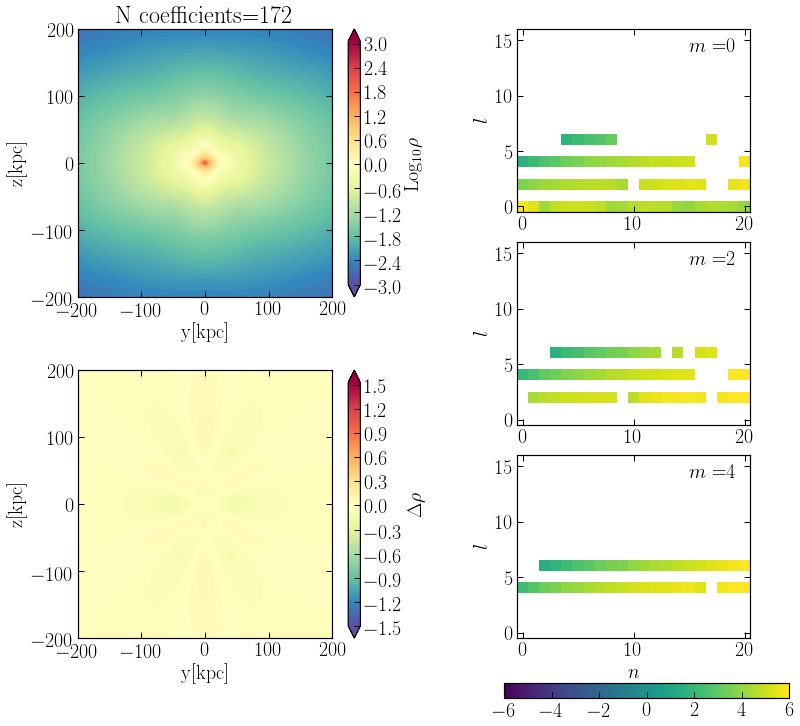

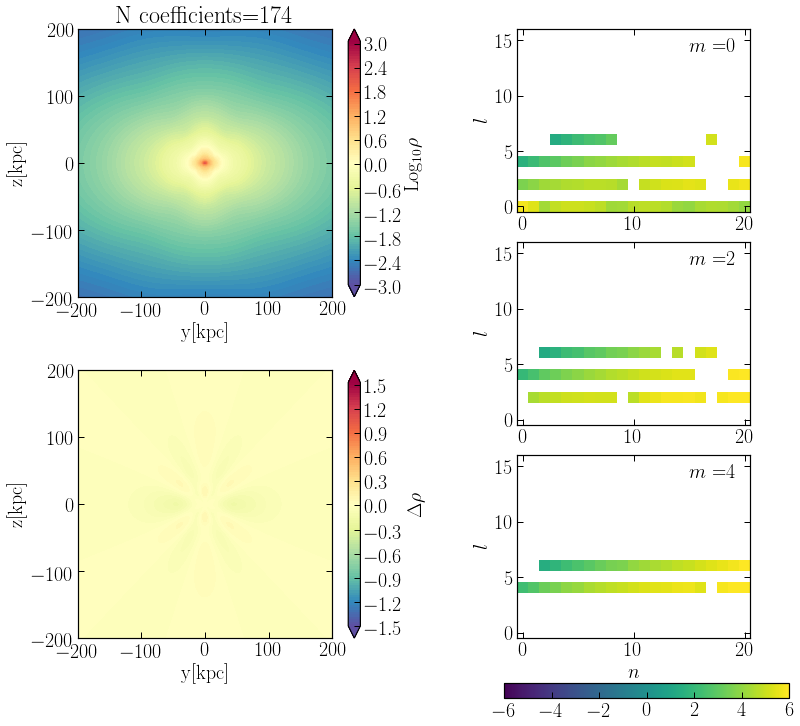

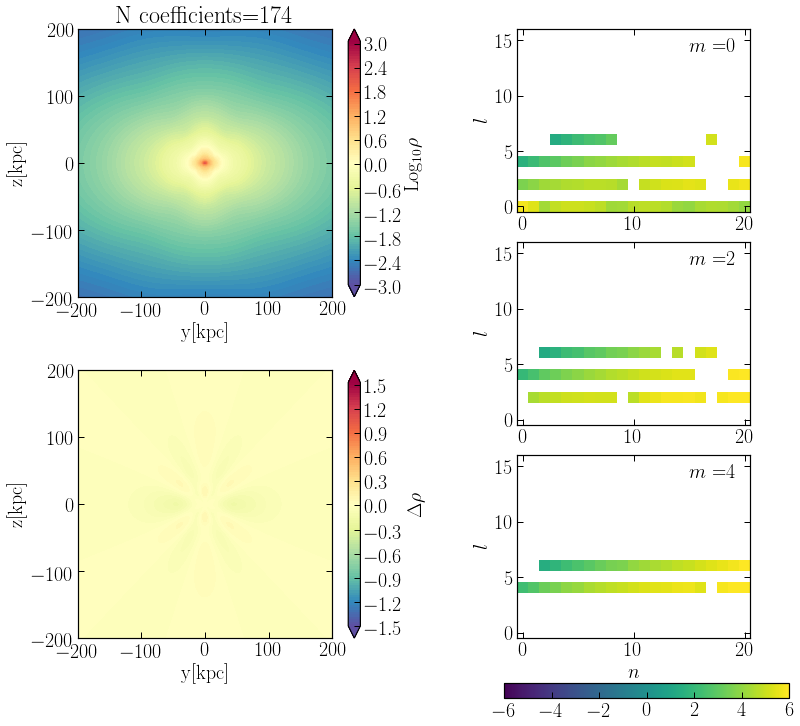

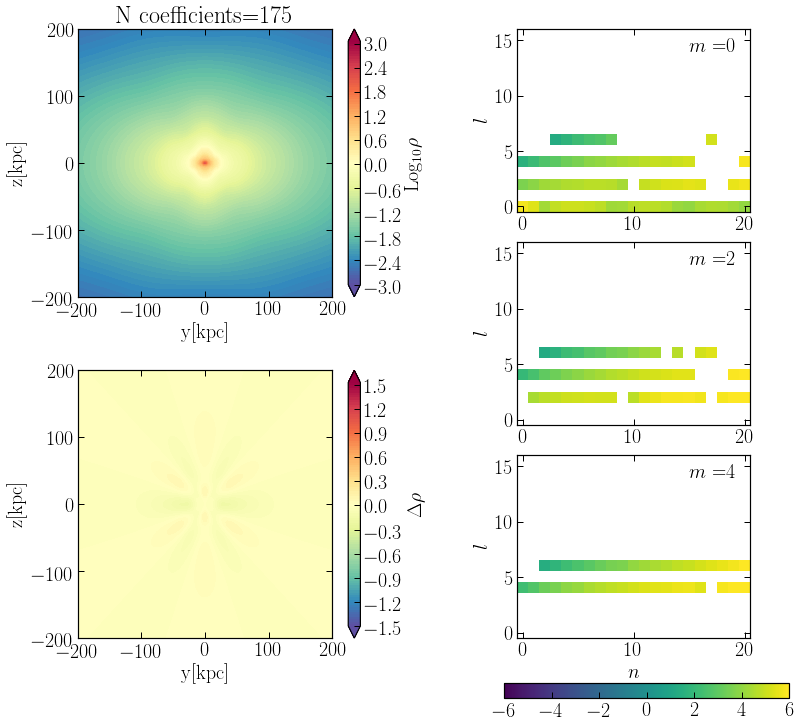

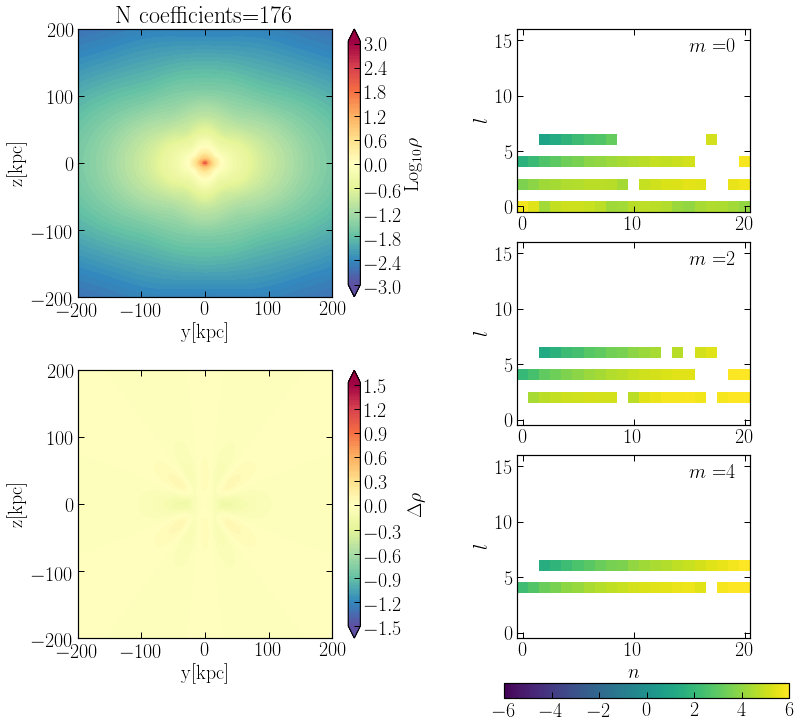

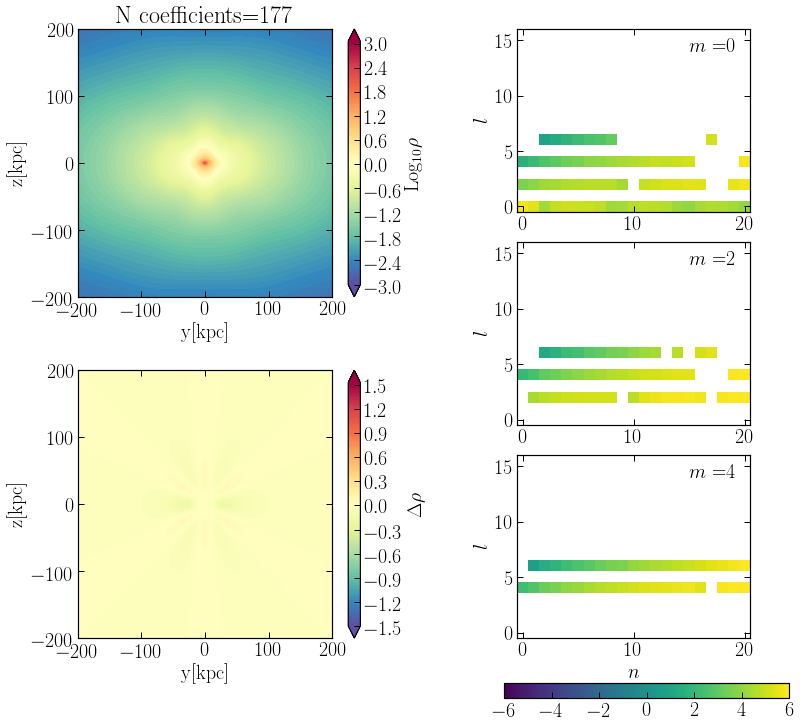

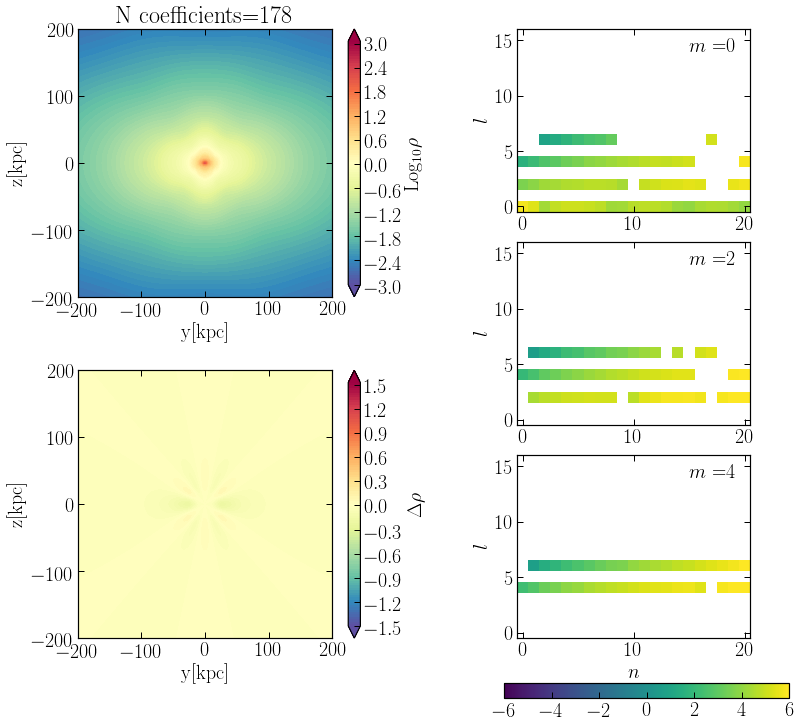

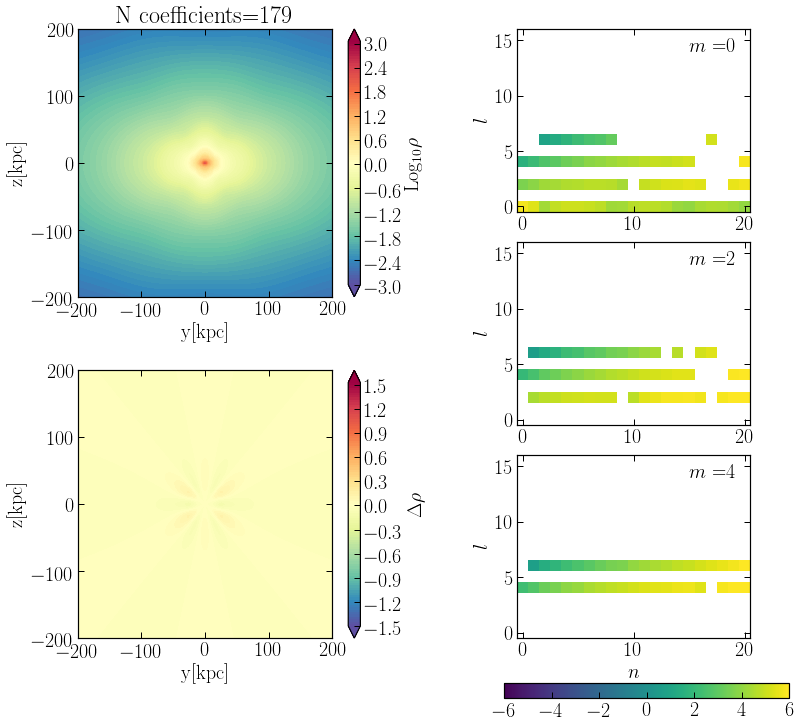

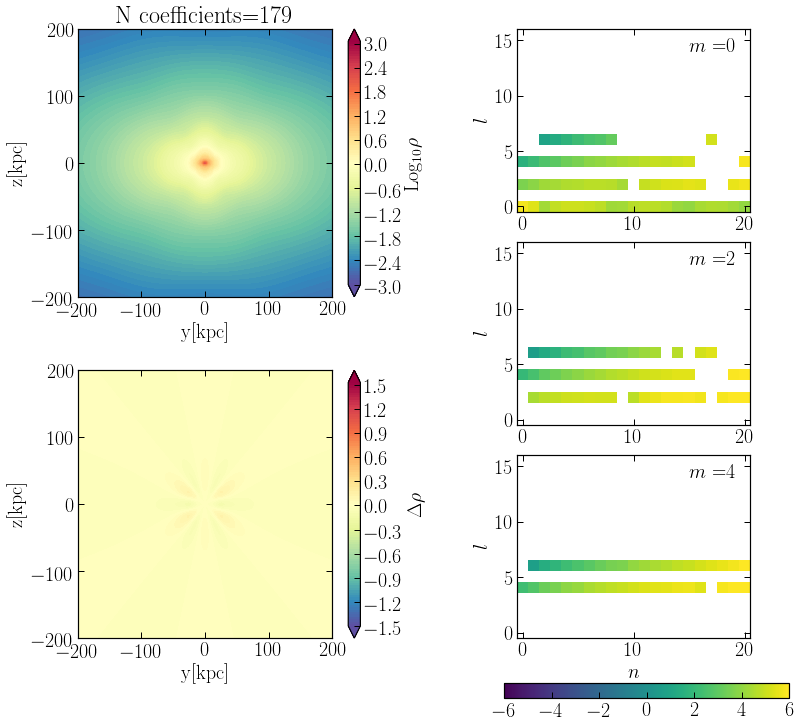

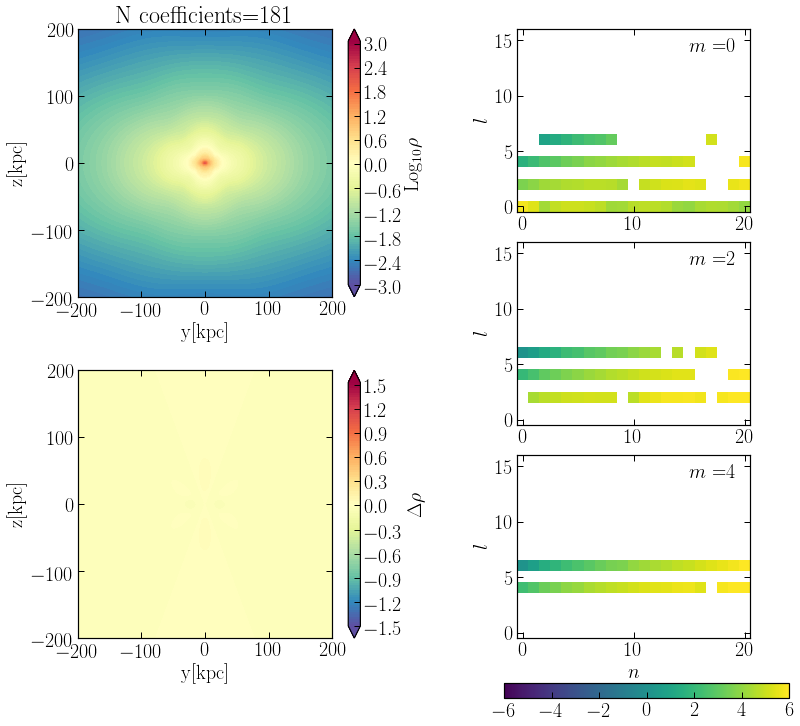

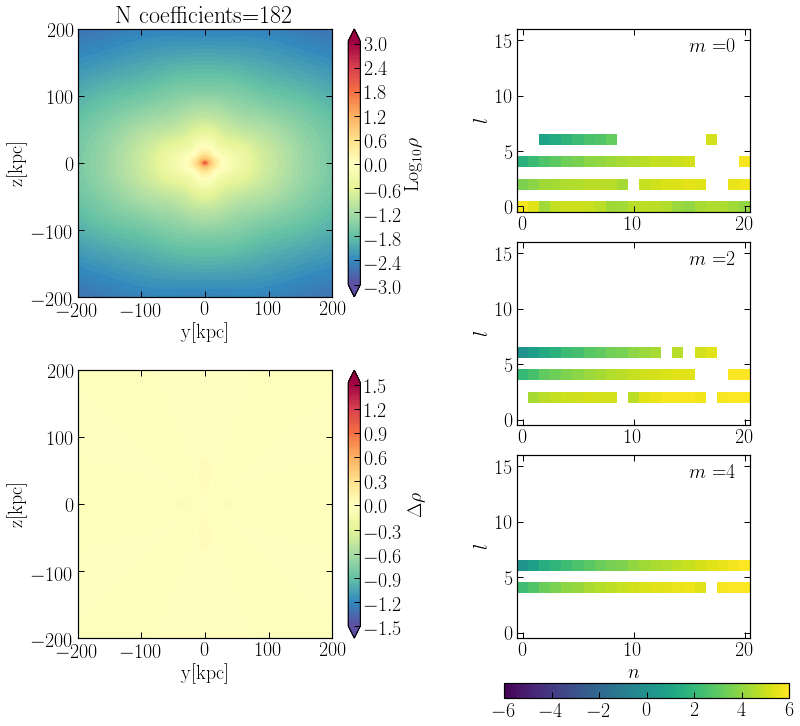

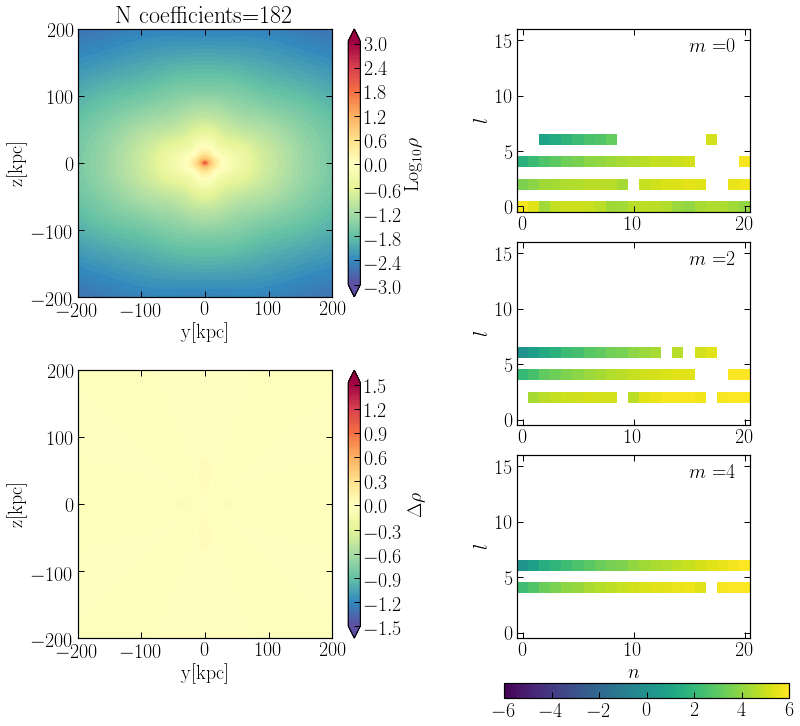

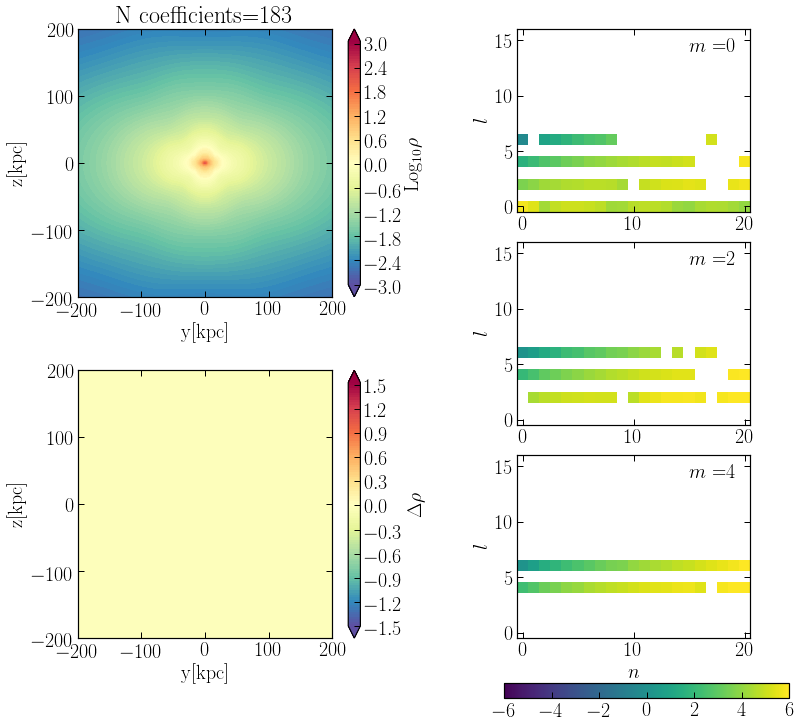

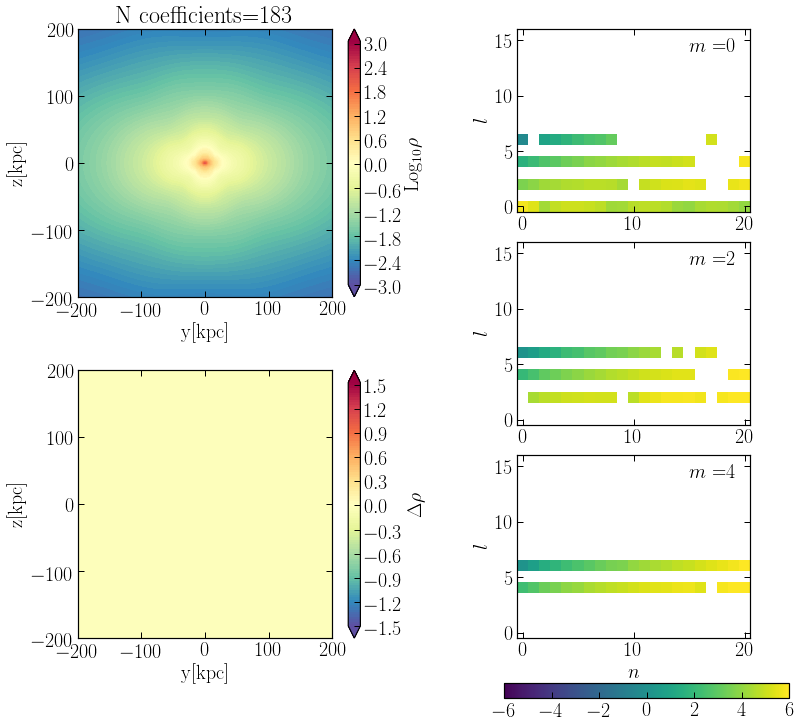

In [31]:
movie(np.abs(U_q1_all), S_q1, T_q1)


this is Energy slice  -12.0
8915
346
monopole 1277898.5719621277
346


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


this is Energy slice  -12.222222222222221
8913
348
monopole 1277898.5719621277
348


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


this is Energy slice  -12.444444444444445
8912
349
monopole 1277898.5719621277
349


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


this is Energy slice  -12.666666666666666
8912
349
monopole 1277898.5719621277
349


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


this is Energy slice  -12.88888888888889
8911
350
monopole 1277898.5719621277
350


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


this is Energy slice  -13.11111111111111
8910
351
monopole 1277898.5719621277
351


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


this is Energy slice  -13.333333333333334
8910
351
monopole 1277898.5719621277
351


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


this is Energy slice  -13.555555555555555
8910
351
monopole 1277898.5719621277
351
this is Energy slice  -13.777777777777779
8909
352
monopole 1277898.5719621277
352


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


this is Energy slice  -14.0
8909
352
monopole 1277898.5719621277
352


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/gridspec.py:285: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


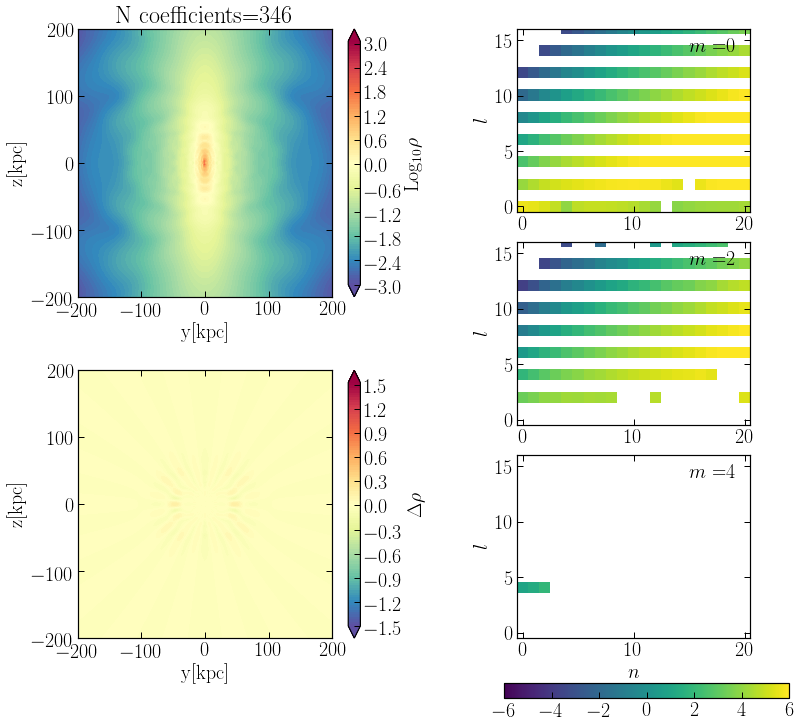

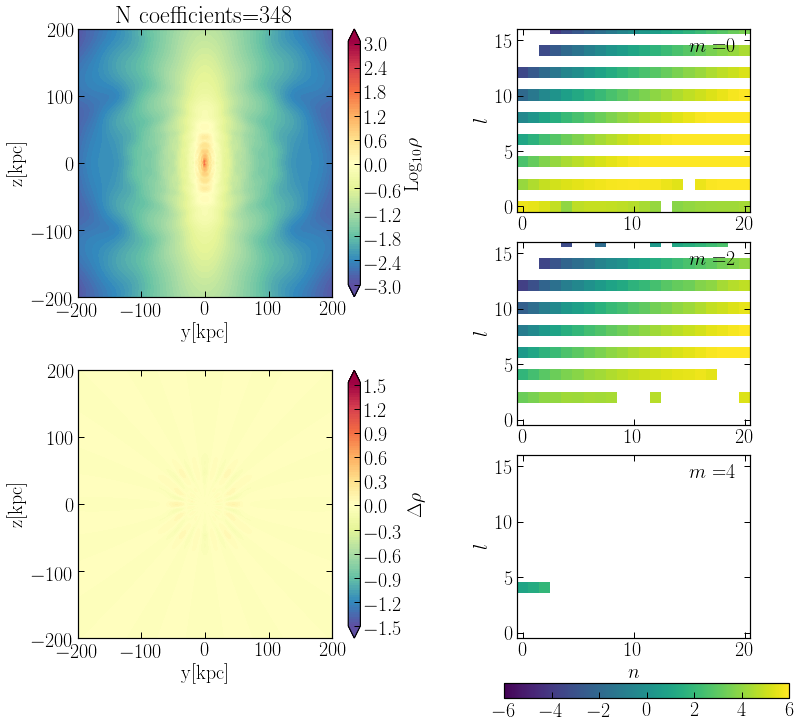

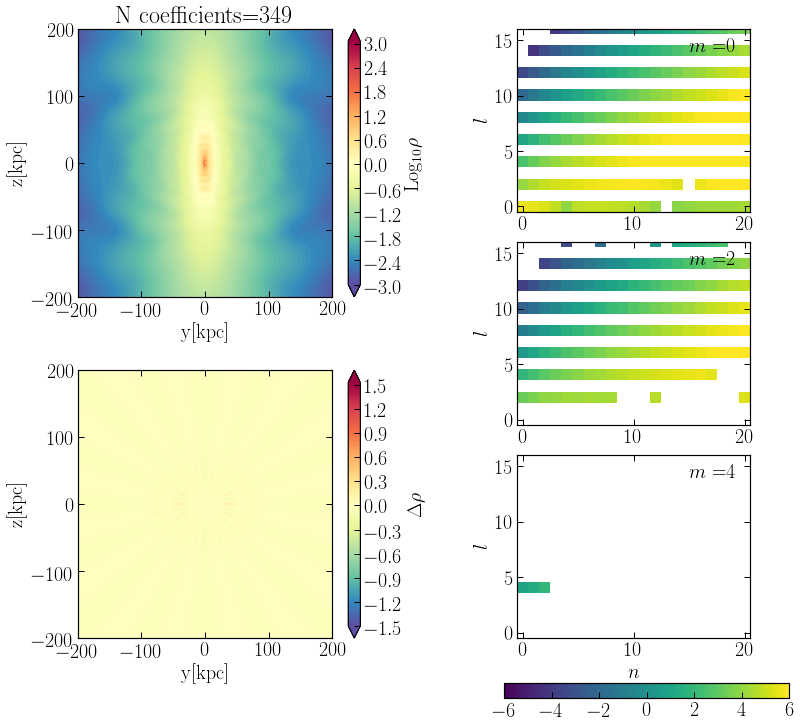

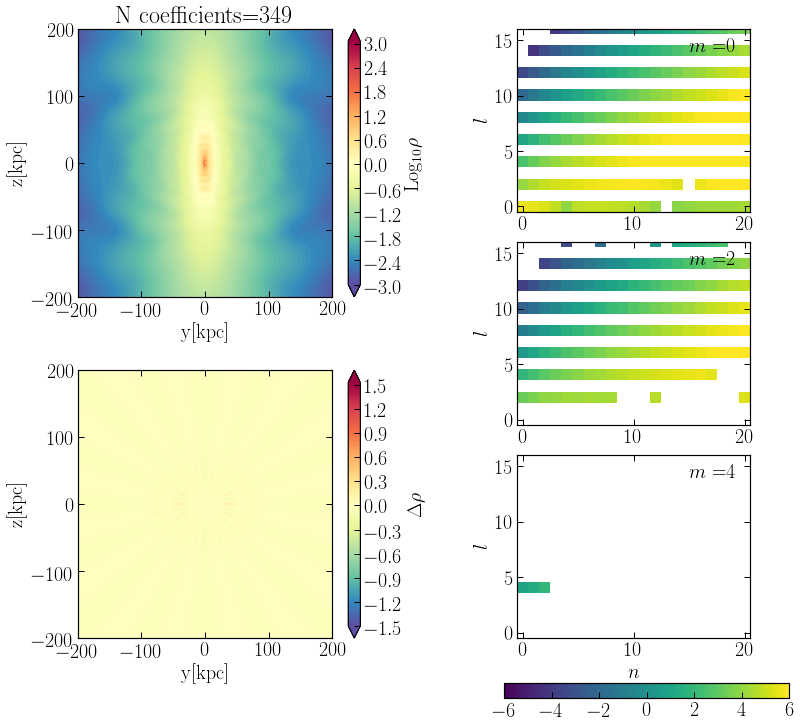

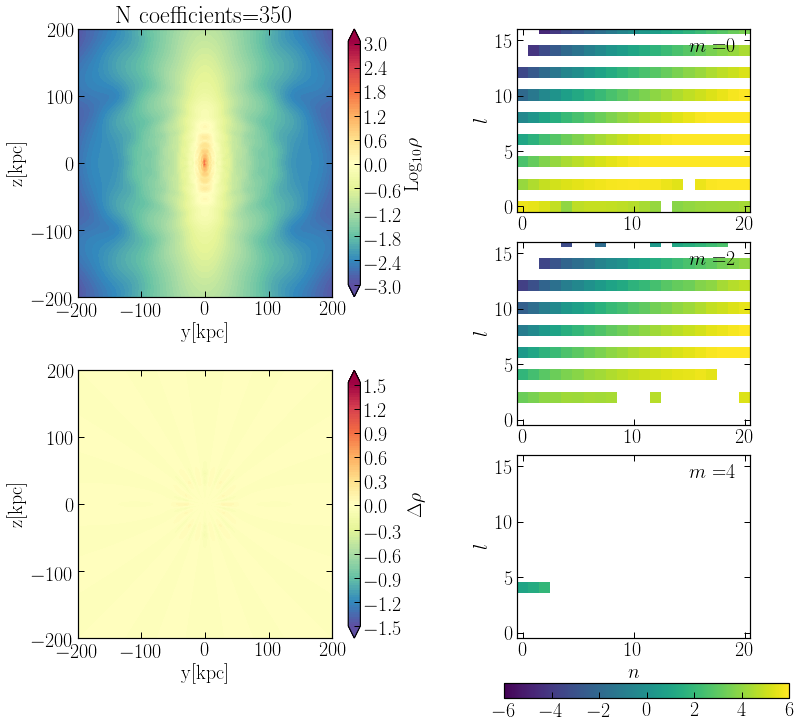

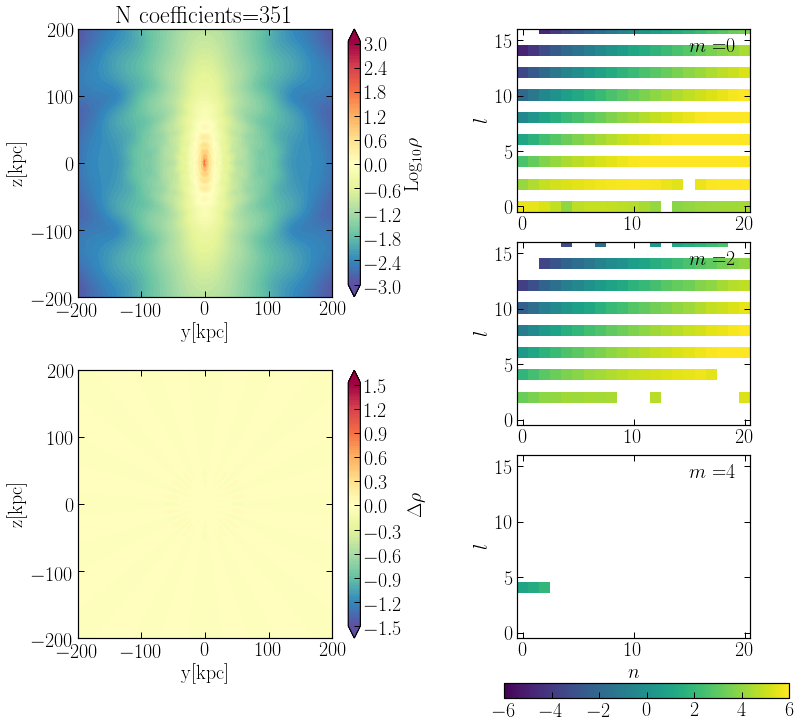

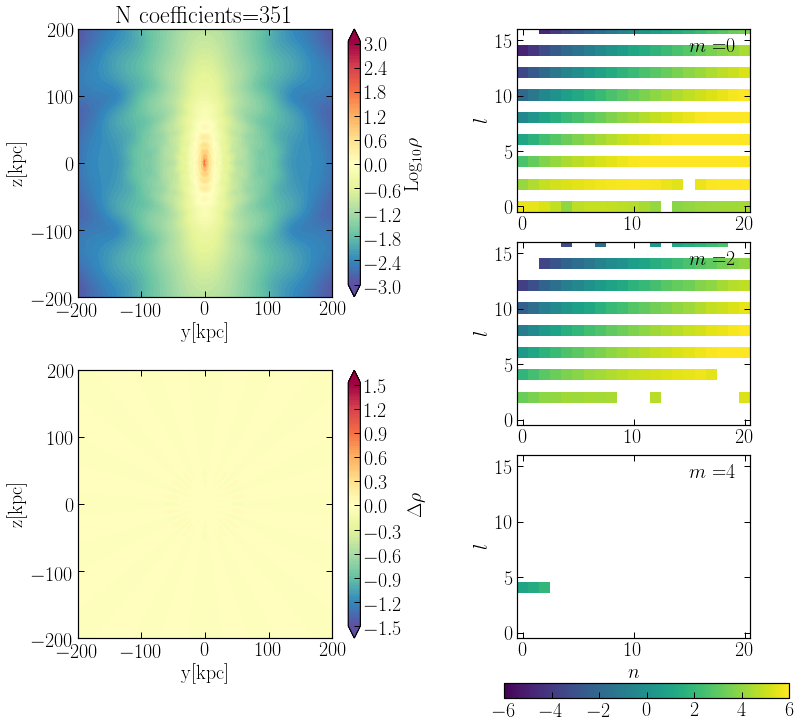

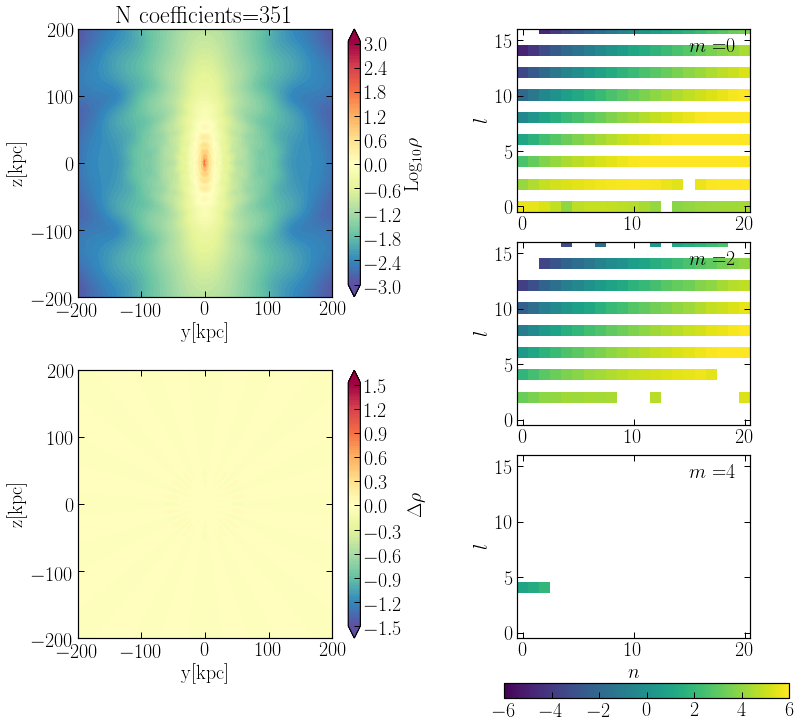

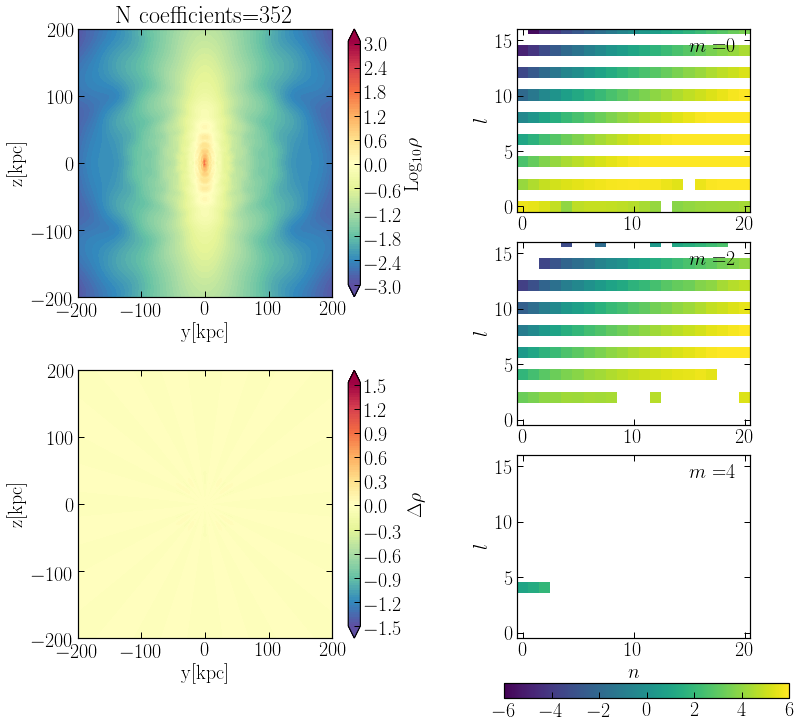

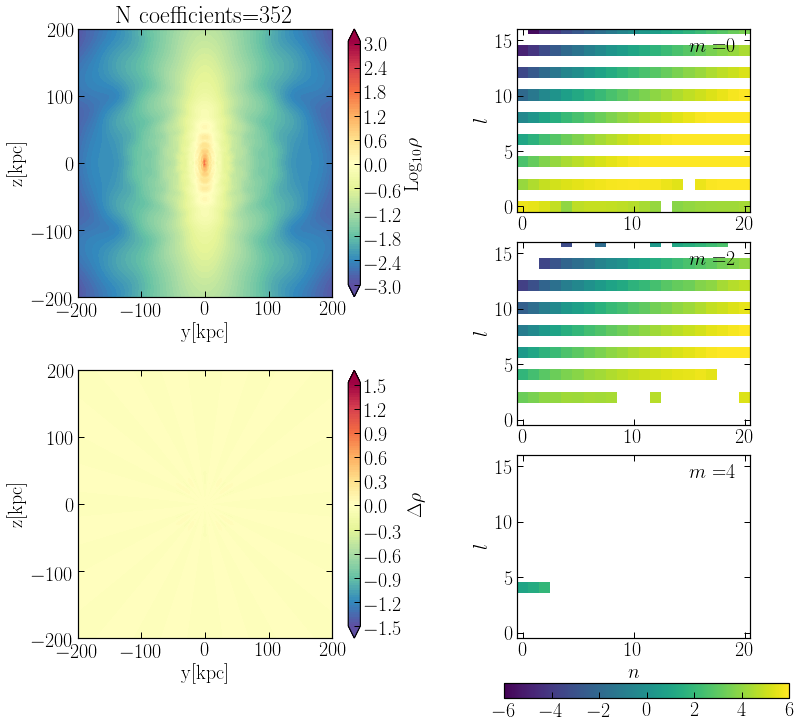

In [39]:
movie(np.abs(U_t1_all), S_t1, T_t1)


In [48]:
(np.linspace(-8, -0.8))


array([-8.        , -7.85306122, -7.70612245, -7.55918367, -7.4122449 ,
       -7.26530612, -7.11836735, -6.97142857, -6.8244898 , -6.67755102,
       -6.53061224, -6.38367347, -6.23673469, -6.08979592, -5.94285714,
       -5.79591837, -5.64897959, -5.50204082, -5.35510204, -5.20816327,
       -5.06122449, -4.91428571, -4.76734694, -4.62040816, -4.47346939,
       -4.32653061, -4.17959184, -4.03265306, -3.88571429, -3.73877551,
       -3.59183673, -3.44489796, -3.29795918, -3.15102041, -3.00408163,
       -2.85714286, -2.71020408, -2.56326531, -2.41632653, -2.26938776,
       -2.12244898, -1.9755102 , -1.82857143, -1.68163265, -1.53469388,
       -1.3877551 , -1.24081633, -1.09387755, -0.94693878, -0.8       ])

In [167]:
len(S_s1[:,:,0].flatten())

441

(array([ 2.,  1.,  1.,  3.,  3.,  7.,  9., 17., 35., 19.]),
 array([-10.01822816,  -9.11386774,  -8.20950731,  -7.30514688,
         -6.40078645,  -5.49642602,  -4.59206559,  -3.68770516,
         -2.78334474,  -1.87898431,  -0.97462388]),
 <a list of 10 Patch objects>)

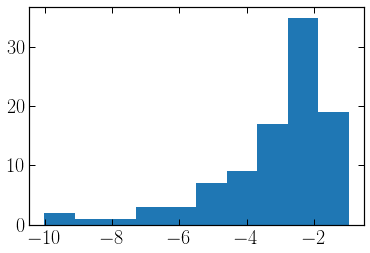

In [65]:
hist(np.log10(U_s1_all.flatten()[np.nonzero(U_s1_all.flatten())]/np.sum(U_s1_all)))

IndexError: index 2 is out of bounds for axis 0 with size 2

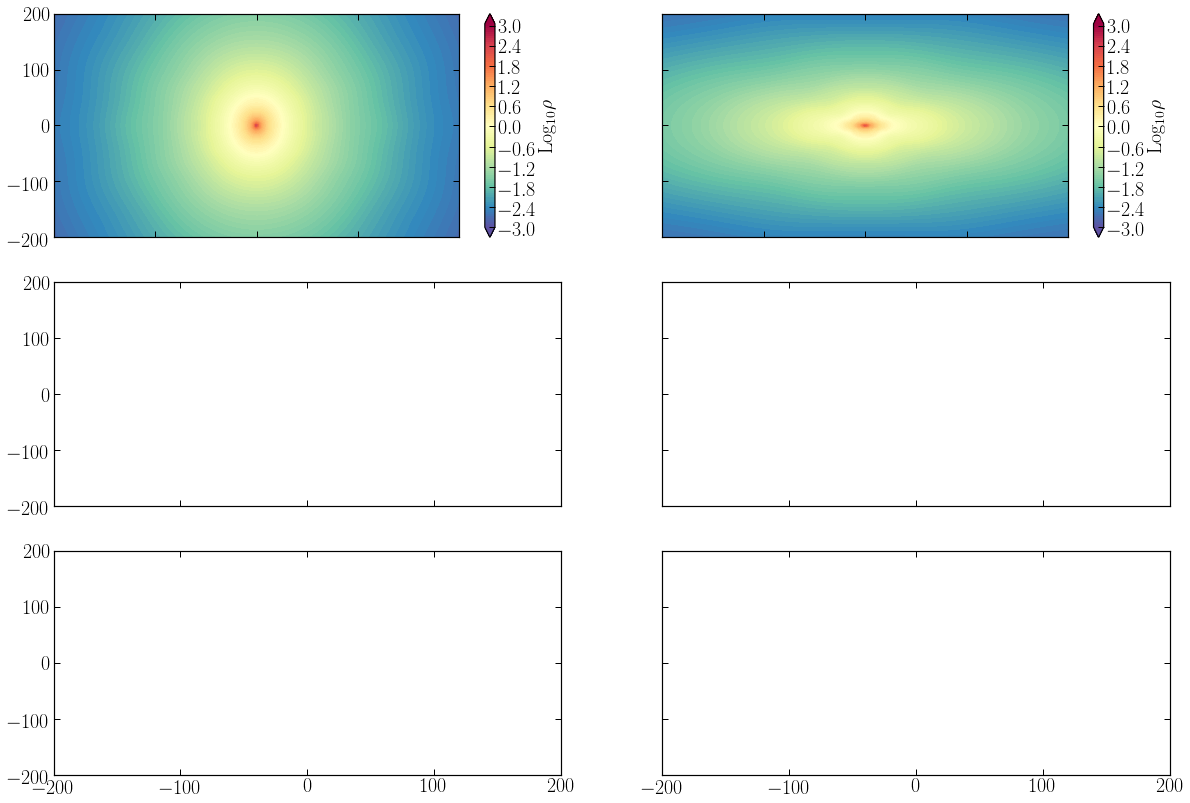

In [100]:
fig, ax = plt.subplots(3, 2, figsize=(20, 14), sharex=True, sharey=True)

density_slab(fig, ax[0][0], S_s1, T_s1, delta=0, vmin=-3, vmax=3)

density_slab(fig, ax[0][1], S_q1, T_q1, delta=0, vmin=-3, vmax=3)

density_slab(fig, ax[0][2], S_t1, T_t1, delta=0, vmin=-3, vmax=3)

density_slab(fig, ax[1][0], S_s1, T_s1, delta=0, vmin=-3, vmax=3, plane='xy')

density_slab(fig, ax[1][1], S_q1, T_q1, delta=0, vmin=-3, vmax=3, plane='xy')

density_slab(fig, ax[1][2], S_t1, T_t1, delta=0, vmin=-3, vmax=3, plane='xy')


ax[0][0].set_ylabel('$z[kpc]$')
ax[1][0].set_ylabel('$y[kpc]$')

ax[0][0].set_xlabel('$y[kpc]$')
ax[0][1].set_xlabel('$y[kpc]$')


ax[1][0].set_xlabel('$x[kpc]$')
ax[1][1].set_xlabel('$x[kpc]$')
ax[1][2].set_xlabel('$x[kpc]$')

ax[0][0].set_title('Prolate, Ncoeff=97')
ax[0][1].set_title('Oblate, Ncoeff=184')
ax[0][2].set_title('Triaxial, Ncoeff=356')

savefig('halos_density.pdf', bbox_inches='tight')

In [69]:
len((U_s1_all.flatten()))

9261

In [83]:
S_s1[10,2,0]

-37.33749993241881

In [84]:
S_s1[10][2][0]

-37.33749993241881

In [115]:
dt = int(1.5+1.5)*0.1
np.arange(-1.5, 1.5+dt, dt)


array([-1.50000000e+00, -1.20000000e+00, -9.00000000e-01, -6.00000000e-01,
       -3.00000000e-01,  2.22044605e-16,  3.00000000e-01,  6.00000000e-01,
        9.00000000e-01,  1.20000000e+00,  1.50000000e+00])

In [114]:
np.arange?

In [130]:
colorbar?